In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [2]:
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
participants = pd.read_json('data/participants.json')
answers_with_id = pd.read_json('data/answers.json')
fields = pd.read_json('data/fields.json')

# Answers

In [4]:
answers = fields.join(answers_with_id.set_index('field_id'), on='id')

answers.head()

,id,question,options,respondent_id,option
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",1,0
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",2,2
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",3,0
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",4,0
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",5,1


In [5]:
_participants = participants[['id', 'gender', 'subscriber_count', 'views']]

answers = answers.join(_participants.set_index('id'), on='respondent_id')

answers.head()

,id,question,options,respondent_id,option,gender,subscriber_count,views
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",1,0,male,30,175
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",2,2,male,20,116
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",3,0,female,15,54
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",4,0,female,7,36
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",5,1,male,2,9


In [6]:
answers['question'].unique()

array(['Order is important to you?',
       "Most of the time I'd like to spend...", "I'd like a roommate...",
       'Do you drink alcohol?', 'Nutritional habits', 'Native language',
       'How do you feel about sharing things and food?', 'Sociability',
       'Lark or owl?', 'Do you smoke?', 'How do you feel about noise?',
       "I'd like to have a roommate...", 'Comfortable temperature'],
      dtype=object)

In [7]:
print(f'Number of students: {len(participants.id)}')
print(f'Number of participated students in Randorm: {len(answers.respondent_id.unique())}')
print(f'Number of male students: {len(answers.respondent_id[answers.gender == "male"].unique())}')
print(f'Number of female students: {len(answers.respondent_id[answers.gender == "female"].unique())}')

Number of students: 220
Number of participated students in Randorm: 209
Number of male students: 155
Number of female students: 54


Всего имеем 13 вопросов. Кроме того, не все студенты участвовали в анкетировании.

In [8]:
answers_q2 = answers[answers['id'] == 2]

ids_check = answers.respondent_id.unique()
lst = []
for i in ids_check:
    if answers_q2[answers_q2.respondent_id == i].empty:
        lst.append(i)

lst

[17, 45, 60, 86, 127, 146, 172, 212]

Я обнаружила, что, хотя все вопросы и были обязательными, некоторые ребята по какой-то причине на них не отвечали. Таких человек всего 8. Для удобства работы, я не буду их учитывать в дальнейшем анализе.

## 1. Order is important to you?

In [9]:
answers_q1 = answers[answers['id'] == 1]
answers_q1 = answers_q1[~answers_q1.respondent_id.isin(lst)]

answers_q1

,id,question,options,respondent_id,option,gender,subscriber_count,views
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",1,0,male,30,175
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",2,2,male,20,116
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",3,0,female,15,54
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",4,0,female,7,36
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",5,1,male,2,9
...,...,...,...,...,...,...,...,...
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",216,0,male,6,56
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",217,1,male,5,39
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",218,2,male,12,33
0,1,Order is important to you?,"['Order is a saint thing', ""Order isn't the mo...",219,2,female,26,77


In [10]:
options = literal_eval(answers_q1['options'].iloc[0])

options

['Order is a saint thing',
 "Order isn't the most important thing in life",
 'I can adapt to any conditions']

In [11]:
len(answers_q1.respondent_id.unique())

201

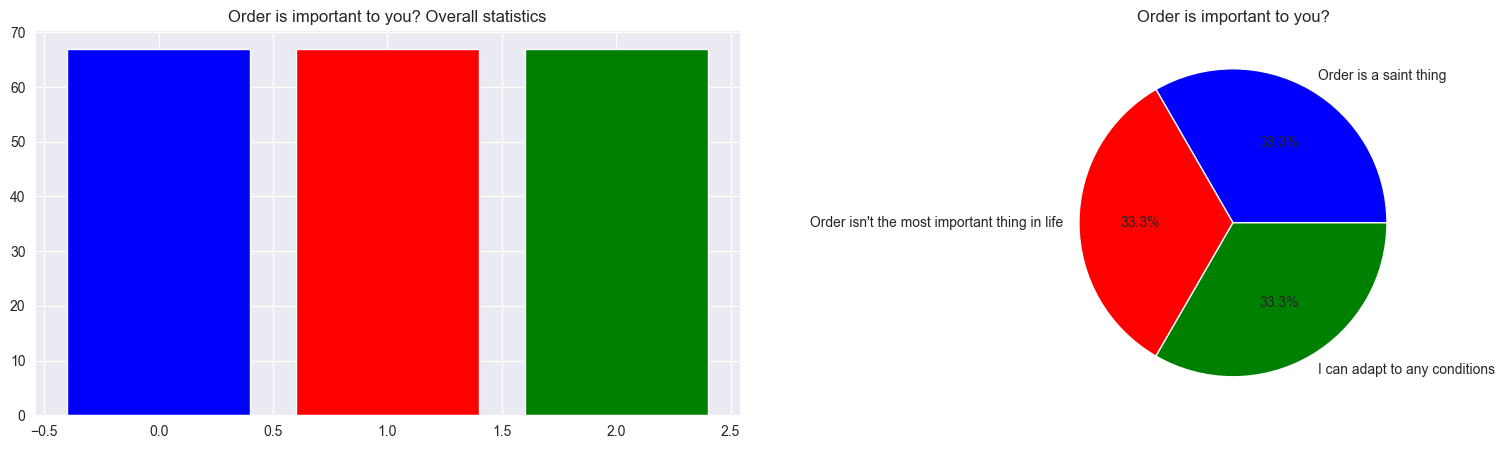

In [12]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.bar(answers_q1['option'].value_counts().sort_index().index, answers_q1['option'].value_counts().sort_index(),
        color=['blue', 'red', 'green'])
plt.title('Order is important to you? Overall statistics')

plt.subplot(122)
plt.pie(answers_q1['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'red', 'green'])
plt.title('Order is important to you?')

plt.show()

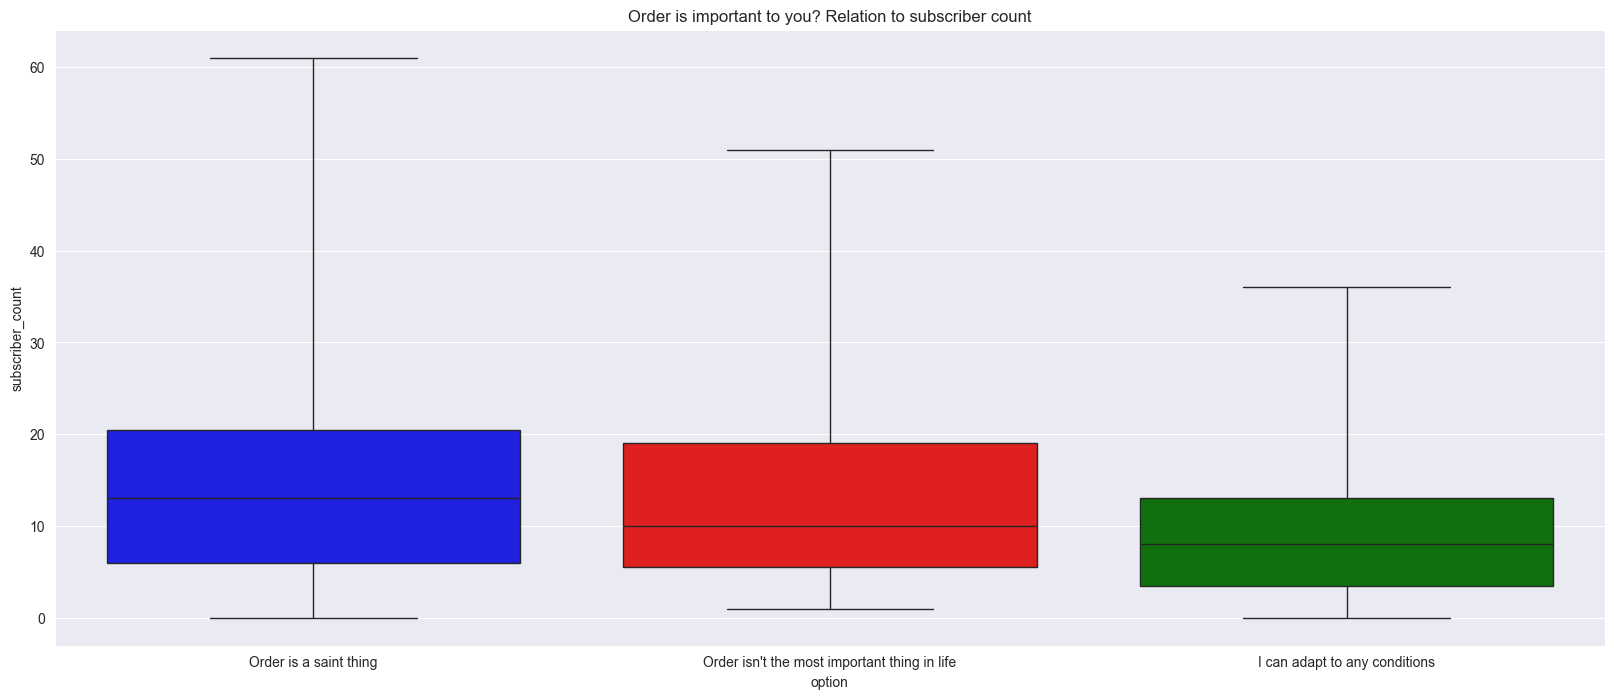

In [13]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='option', y='subscriber_count', data=answers_q1, whis=np.inf,
            palette={'0': 'blue', '1': 'red', '2': 'green'})
plt.gca().set_xticklabels(options)
plt.title('Order is important to you? Relation to subscriber count')

plt.show()

Исходя из графиков, распределение среди студентов практически одинаковое. Однако по количеству подписок медианное значение подписчиков больше у ребят, которые выбрали опцию 0 (Order is a saint thing).

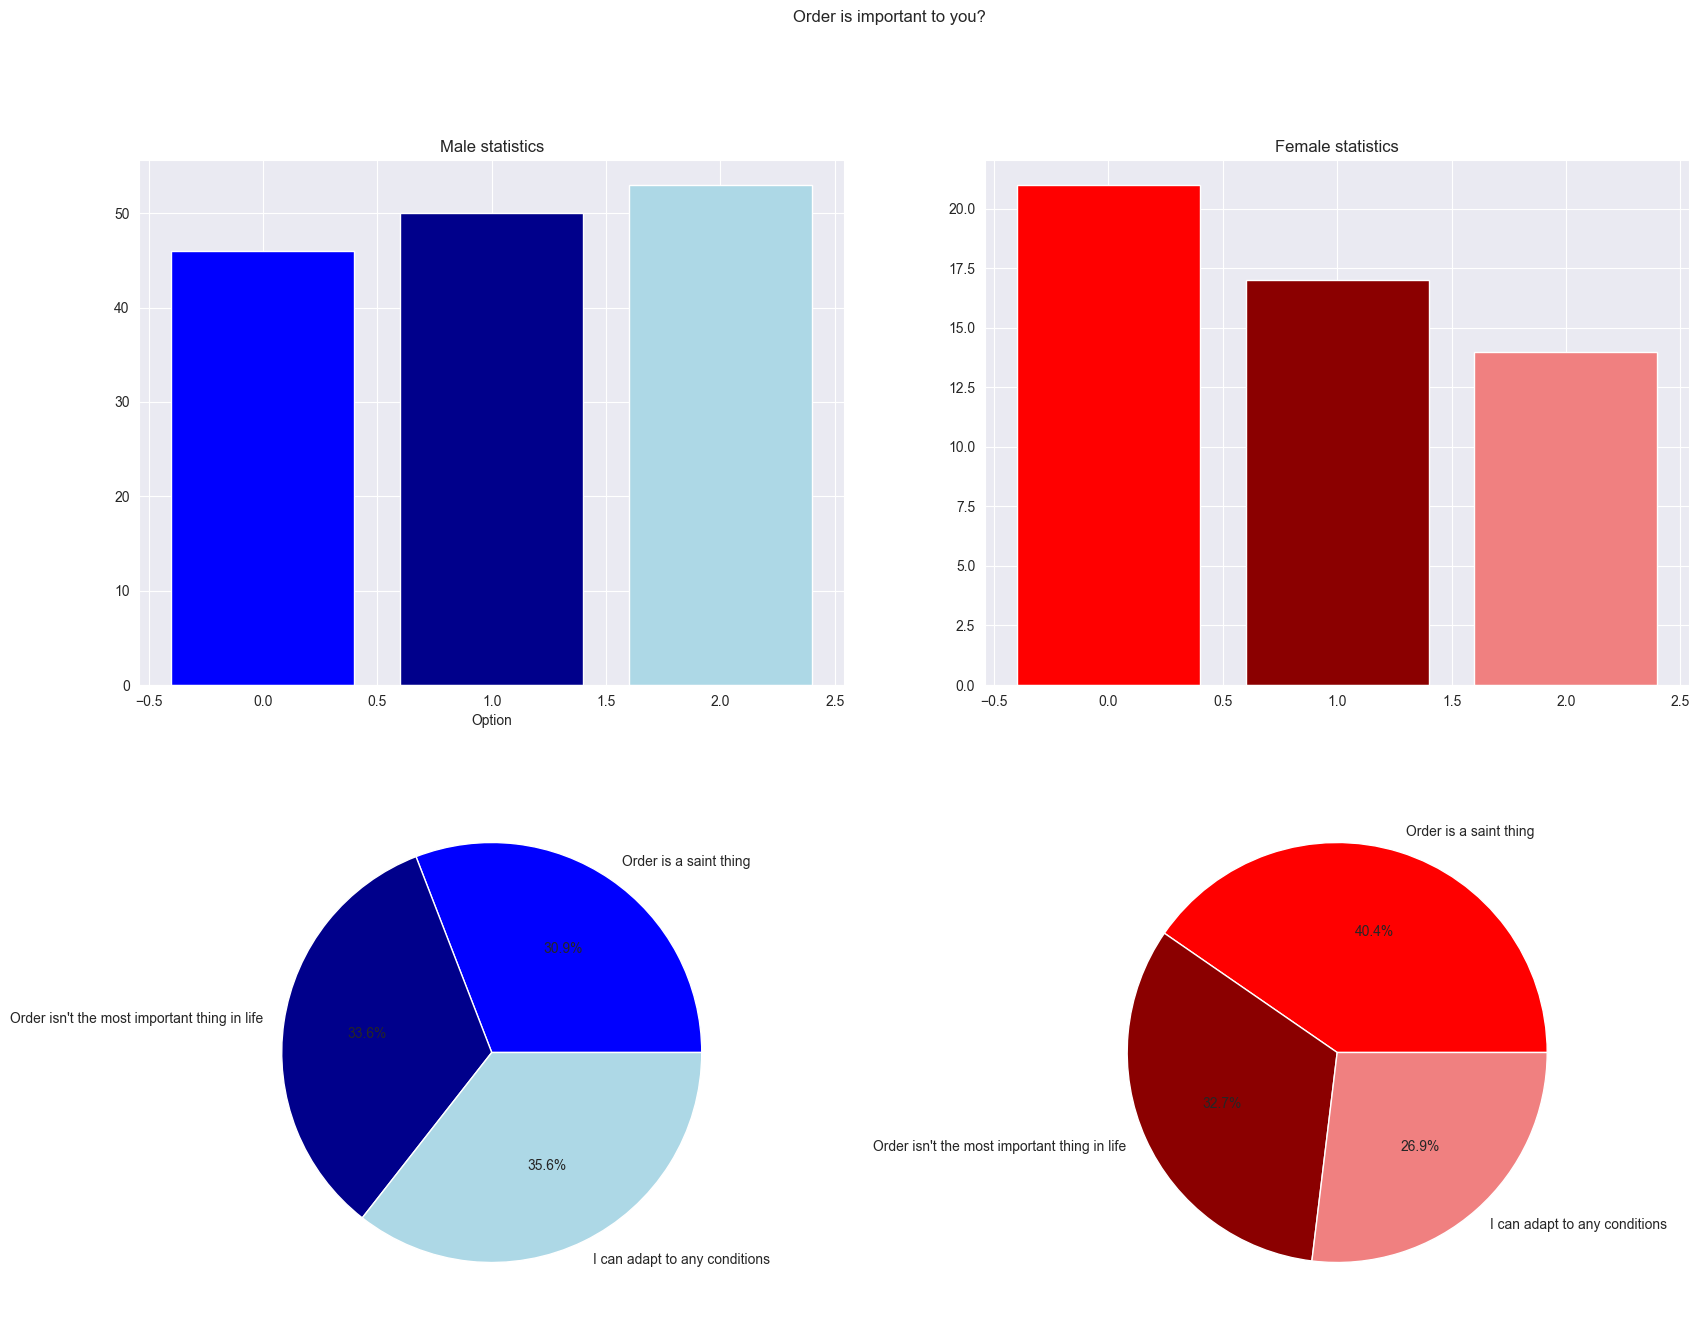

In [14]:
plt.figure(figsize=(20, 15))
plt.suptitle('Order is important to you?')
plt.subplot(221)
plt.bar(answers_q1['option'][answers_q1.gender == 'male'].value_counts().sort_index().index,
        answers_q1['option'][answers_q1.gender == 'male'].value_counts().sort_index(),
        color=['blue', 'darkblue', 'lightblue'])
plt.title('Male statistics')
plt.xlabel('Option')

plt.subplot(222)
plt.bar(answers_q1['option'][answers_q1.gender == 'male'].value_counts().sort_index().index,
        answers_q1['option'][answers_q1.gender == 'female'].value_counts().sort_index(),
        color=['red', 'darkred', 'lightcoral'])
plt.title('Female statistics')

plt.subplot(223)
plt.pie(answers_q1['option'][answers_q1.gender == 'male'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['blue', 'darkblue', 'lightblue'])

plt.subplot(224)
plt.pie(answers_q1['option'][answers_q1.gender == 'female'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['red', 'darkred', 'lightcoral'])

plt.show()

В основном, парни выбирают вариант 2 про адаптацию к любым условиям, но в целом ответы не сильно разнятся по количеству. 
Девушки выбирают вариант, что уборка важна, что довольно-таки логично. 

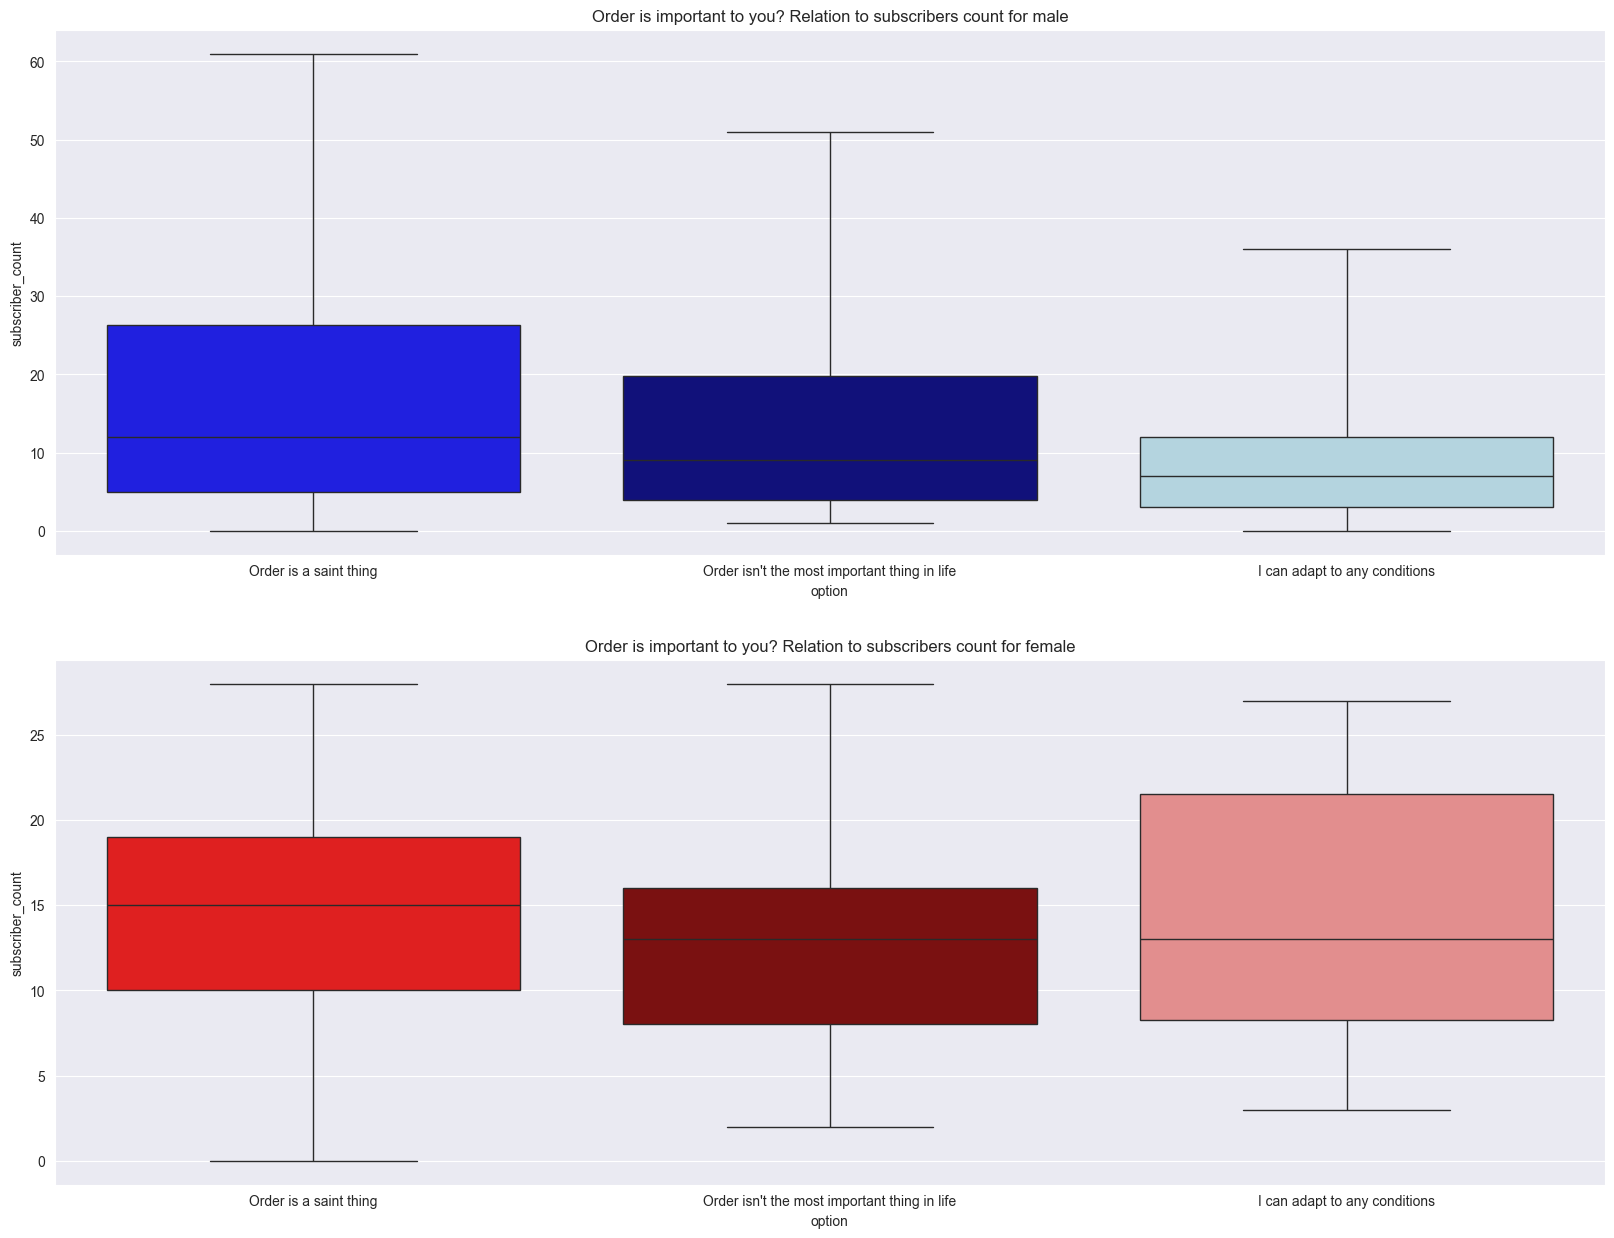

In [15]:
plt.figure(figsize=(20, 15))
plt.subplot(211)
sns.boxplot(x='option', y='subscriber_count', whis=np.inf,
            data=answers_q1[answers_q1.gender == 'male'],
            palette={'0': 'blue', '1': 'darkblue', '2': 'lightblue'})
plt.gca().set_xticklabels(options)
plt.title('Order is important to you? Relation to subscribers count for male')

plt.subplot(212)
sns.boxplot(x='option', y='subscriber_count',
            data=answers_q1[answers_q1.gender == 'female'], whis=np.inf,
            palette={'0': 'red', '1': 'darkred', '2': 'lightcoral'})
plt.gca().set_xticklabels(options)
plt.title('Order is important to you? Relation to subscribers count for female')

plt.show()

Коробочные диаграммы выше помогают оценить связь ответов и количества подписчиков по полу среди всех участвующих в опросе студентов. Из интересного стоит выделить, например, что у более 25% девушек, которые могут адаптироваться под любые условия (опция 2) больше 20 подписчиков. Учитывая, что всего в выборке 54 человека, это довольно много.

## 2. Most of the time I'd like to spend...

In [16]:
answers_q2 = answers[answers['id'] == 2]

answers_q2

,id,question,options,respondent_id,option,gender,subscriber_count,views
1,2,Most of the time I'd like to spend...,"['In privacy, I value personal space where no ...",1,1,male,30,175
1,2,Most of the time I'd like to spend...,"['In privacy, I value personal space where no ...",2,2,male,20,116
1,2,Most of the time I'd like to spend...,"['In privacy, I value personal space where no ...",3,2,female,15,54
1,2,Most of the time I'd like to spend...,"['In privacy, I value personal space where no ...",4,2,female,7,36
1,2,Most of the time I'd like to spend...,"['In privacy, I value personal space where no ...",5,2,male,2,9
...,...,...,...,...,...,...,...,...
1,2,Most of the time I'd like to spend...,"['In privacy, I value personal space where no ...",216,1,male,6,56
1,2,Most of the time I'd like to spend...,"['In privacy, I value personal space where no ...",217,2,male,5,39
1,2,Most of the time I'd like to spend...,"['In privacy, I value personal space where no ...",218,2,male,12,33
1,2,Most of the time I'd like to spend...,"['In privacy, I value personal space where no ...",219,2,female,26,77


In [17]:
options = literal_eval(answers_q2['options'].iloc[0])

options

['In privacy, I value personal space where no one is disturbing me',
 'With friends, I like to be in the company',
 'Depends on mood, I like to be alone and in company']

In [18]:
len(answers_q2.respondent_id.unique())

201

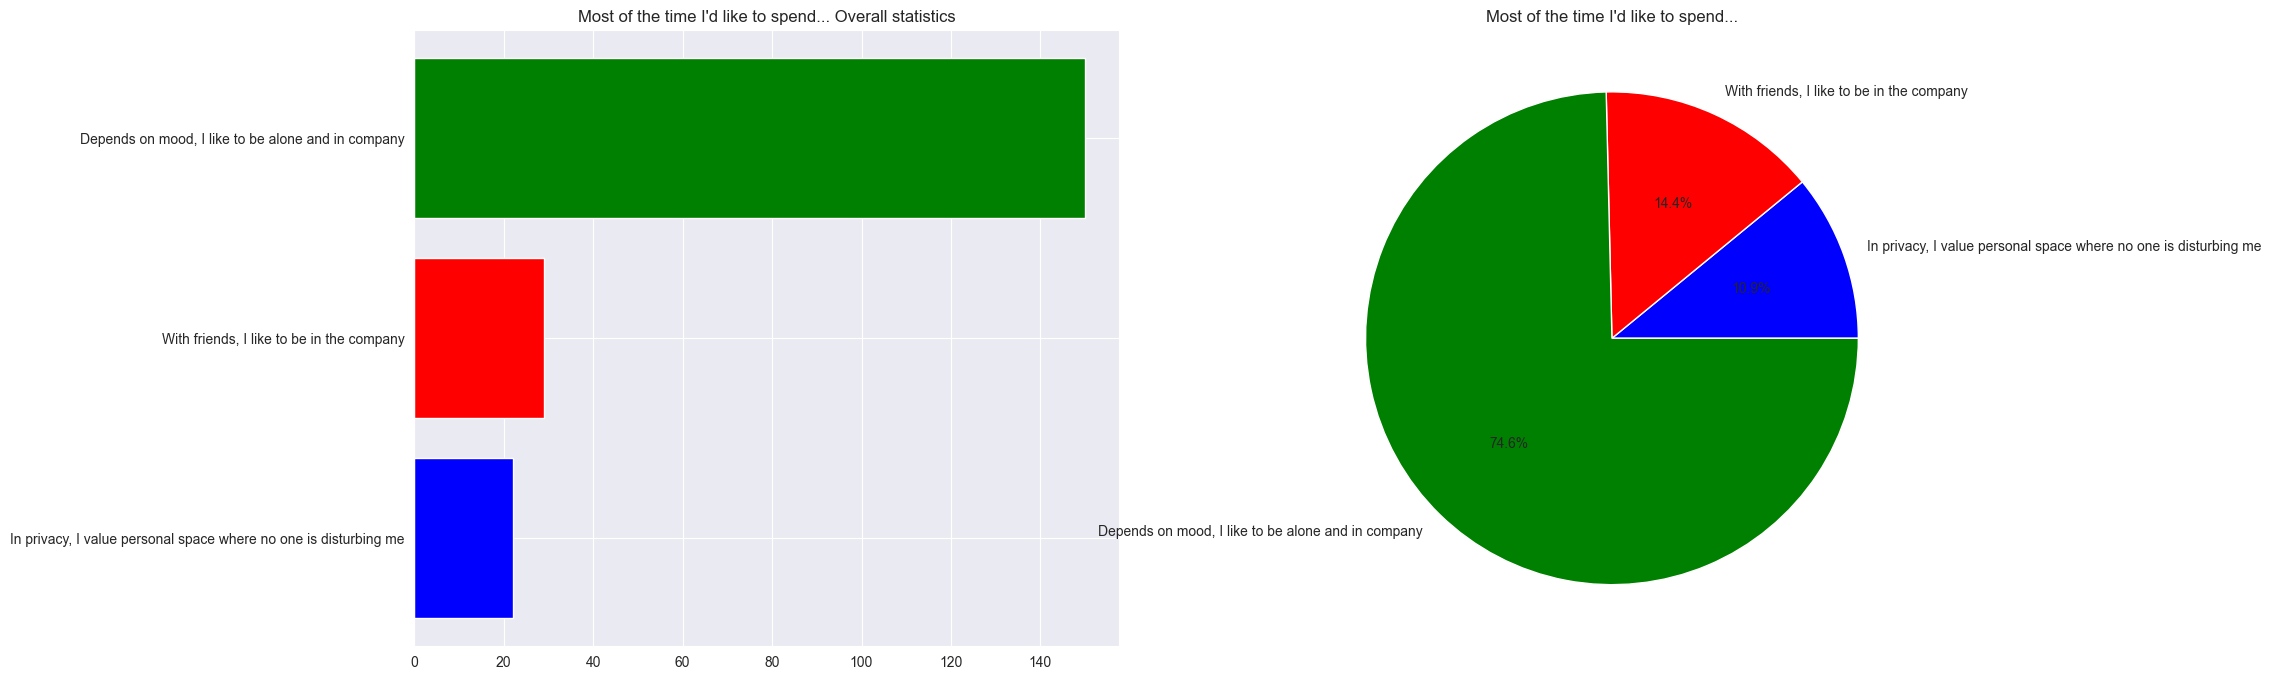

In [19]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.barh(options, answers_q2['option'].value_counts().sort_index(), color=['blue', 'red', 'green'])
plt.title("Most of the time I'd like to spend... Overall statistics")

plt.subplot(122)
plt.pie(answers_q2['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'red', 'green'])
plt.title("Most of the time I'd like to spend...")

plt.show()

Оба графика дают отчётливое представление, что студенты в основном "амбиверты": любят и шумные компании, и тишину.

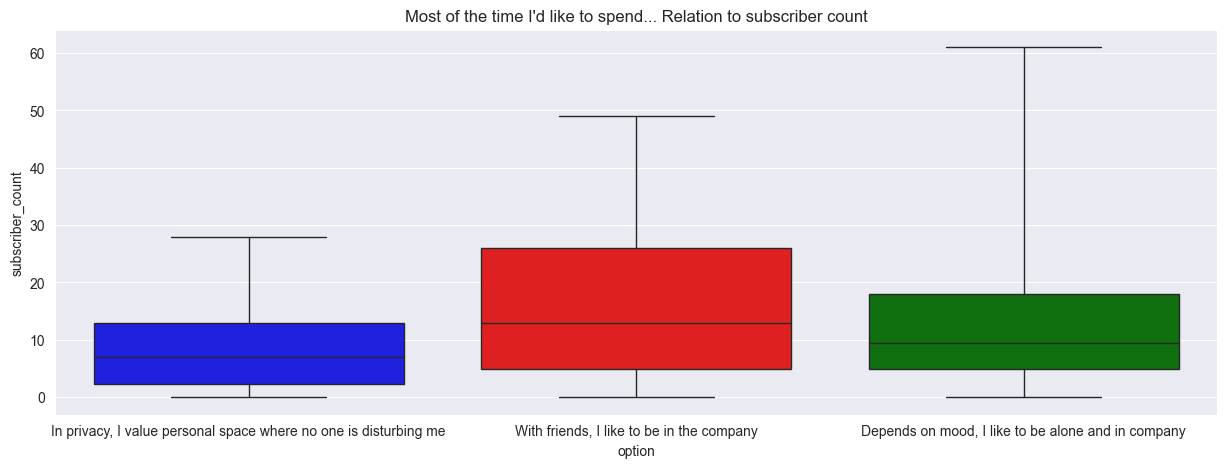

In [20]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='option', y='subscriber_count', data=answers_q2, whis=np.inf,
            palette={'0': 'blue', '1': 'red', '2': 'green'})
plt.gca().set_xticklabels(options)
plt.title("Most of the time I'd like to spend... Relation to subscriber count")

plt.show()

Стоит заметить, на удивление, у студентов, которые предпочитают шумные компании, медианное значение подписчиков больше, чем у других. У "тихонь" же наоборот самые маленькие показатели подписчиков.

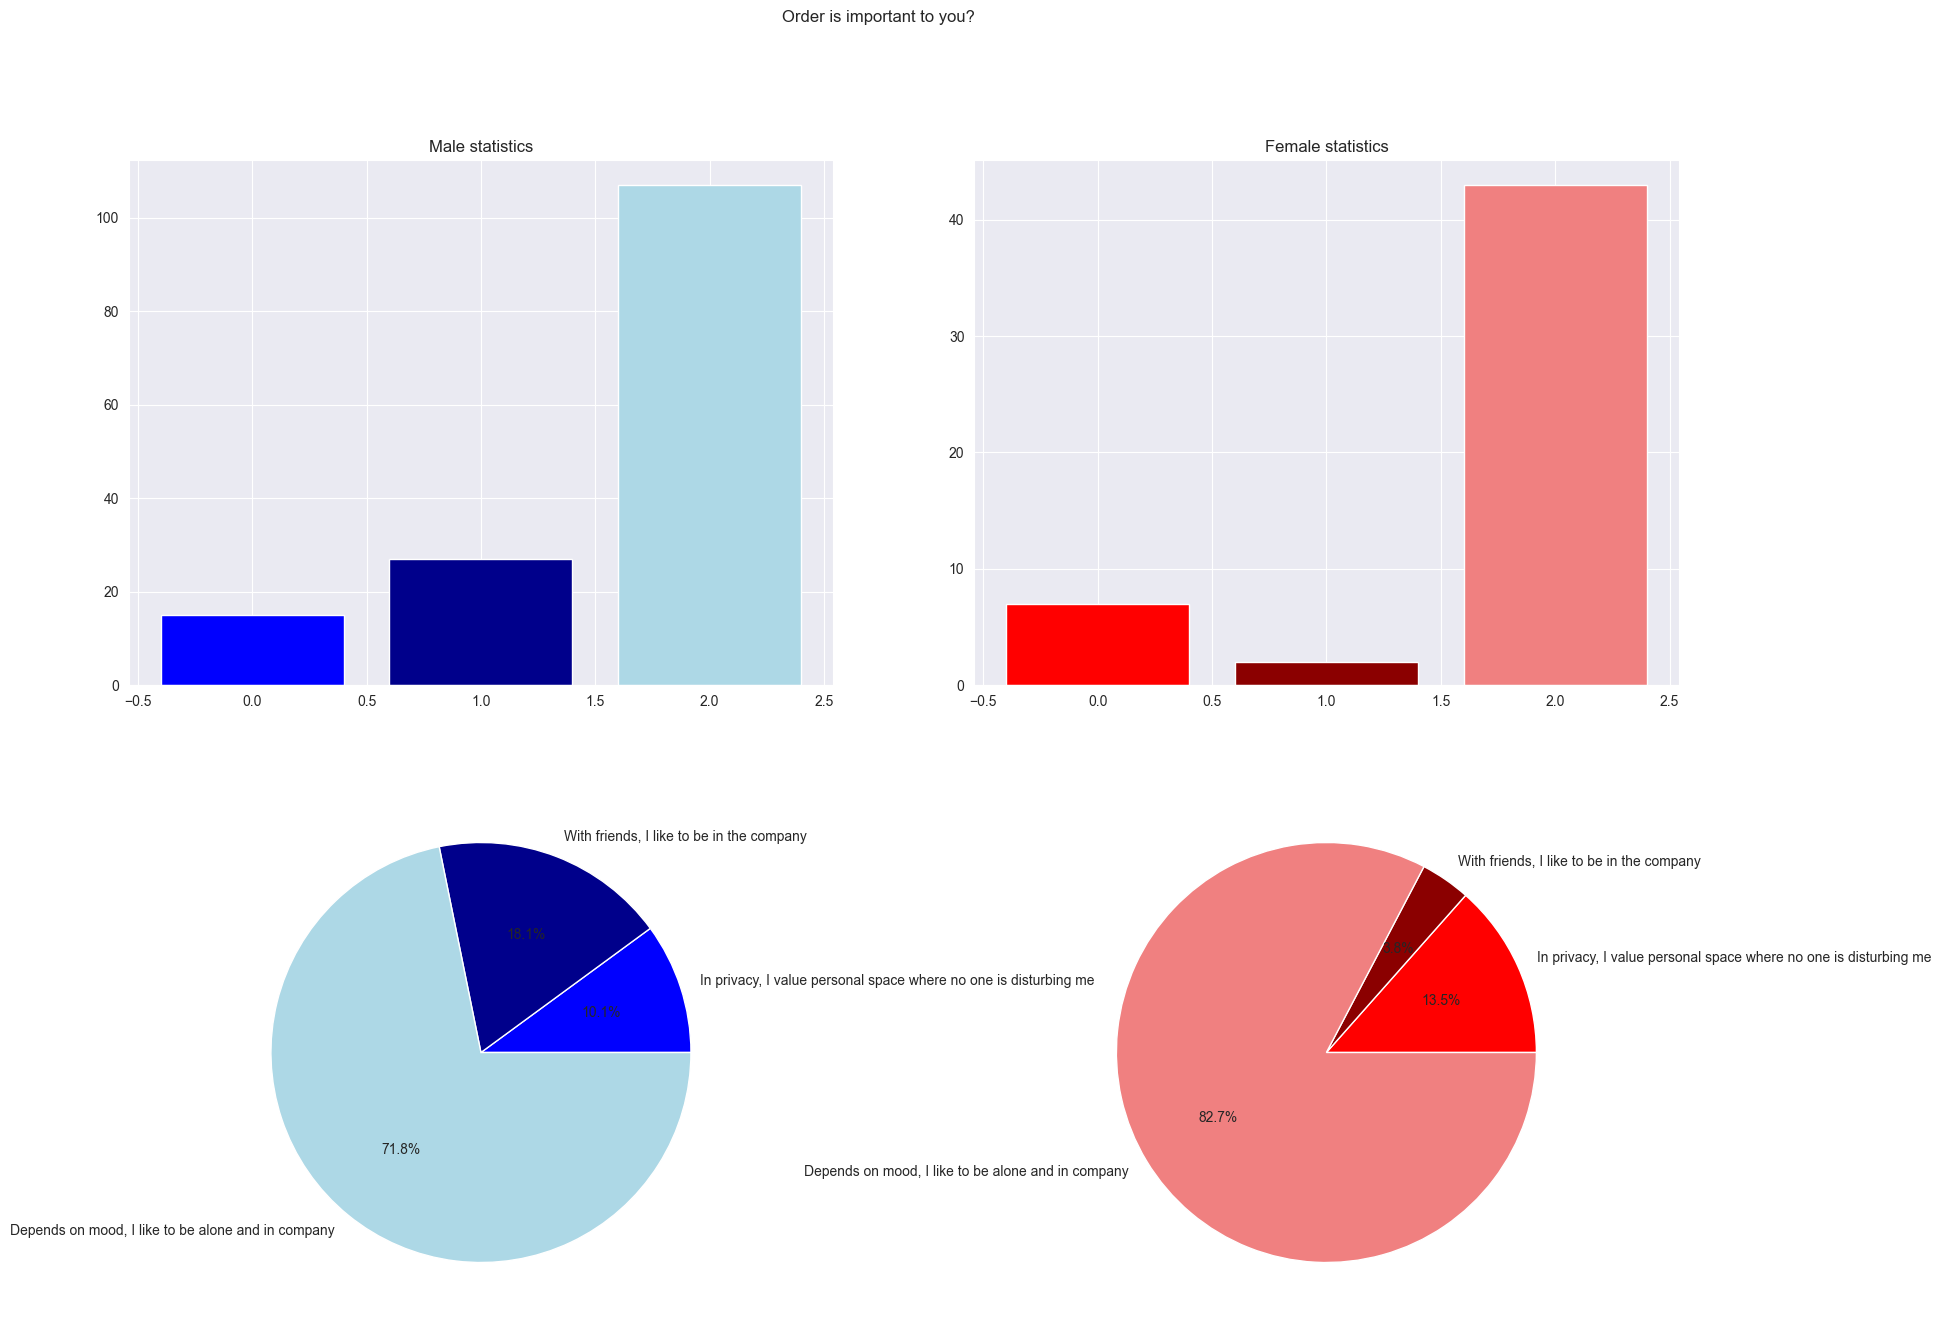

In [21]:
plt.figure(figsize=(20, 15))
plt.suptitle('Order is important to you?')
plt.subplot(221)
plt.bar(answers_q2['option'][answers_q2.gender == 'male'].value_counts().sort_index().index,
        answers_q2['option'][answers_q2.gender == 'male'].value_counts().sort_index(),
        color=['blue', 'darkblue', 'lightblue'])
plt.title('Male statistics')

plt.subplot(222)
plt.bar(answers_q2['option'][answers_q2.gender == 'female'].value_counts().sort_index().index,
        answers_q2['option'][answers_q2.gender == 'female'].value_counts().sort_index(),
        color=['red', 'darkred', 'lightcoral'])
plt.title('Female statistics')

plt.subplot(223)
plt.pie(answers_q2['option'][answers_q2.gender == 'male'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['blue', 'darkblue', 'lightblue'])

plt.subplot(224)
plt.pie(answers_q2['option'][answers_q2.gender == 'female'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['red', 'darkred', 'lightcoral'])

plt.show()

Здесь, как и на общих графиках, преобладают "амбиверты". 
Говоря лишь о девушках, в отличие от парней, они больше любят тишину, а не шумные компании.

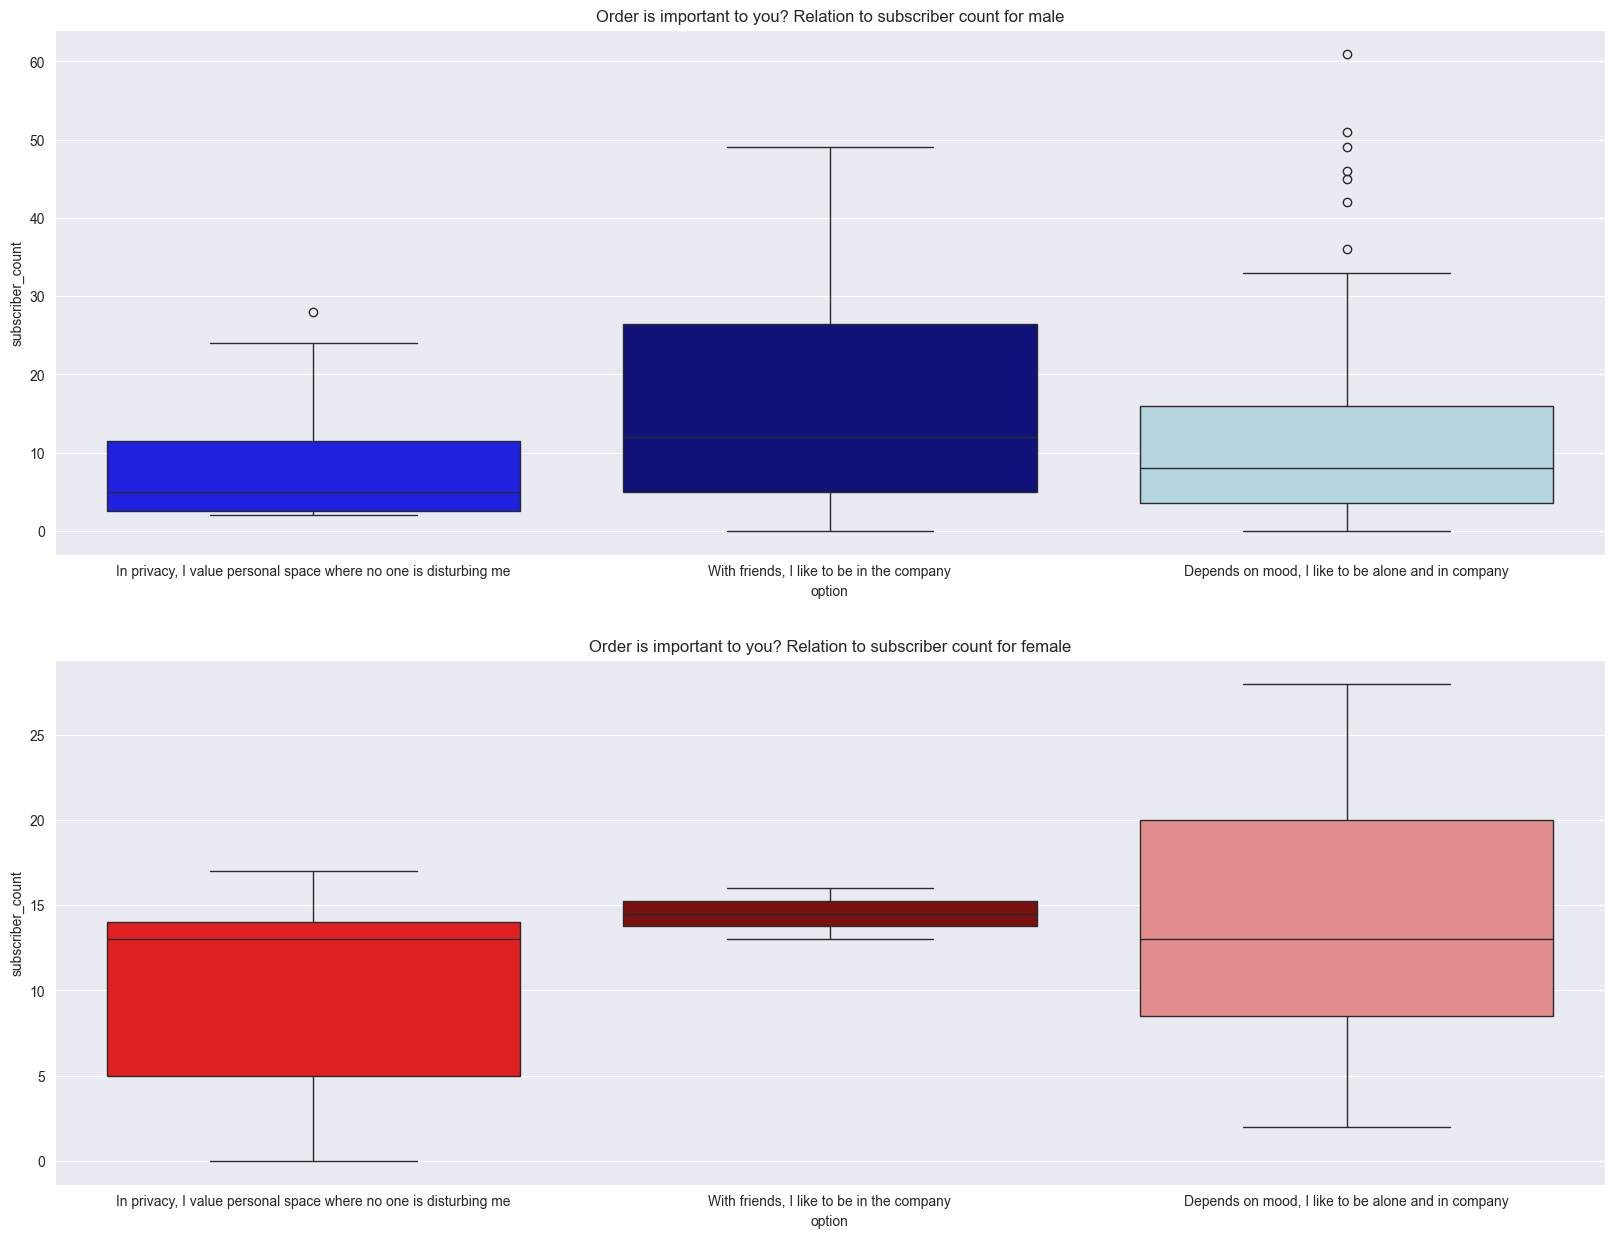

In [22]:
plt.figure(figsize=(20, 15))
plt.subplot(211)
sns.boxplot(x='option', y='subscriber_count',
            data=answers_q2[answers_q2.gender == 'male'],
            palette={'0': 'blue', '1': 'darkblue', '2': 'lightblue'})
plt.gca().set_xticklabels(options)
plt.title('Order is important to you? Relation to subscriber count for male')

plt.subplot(212)
sns.boxplot(x='option', y='subscriber_count',
            data=answers_q2[answers_q2.gender == 'female'],
            palette={'0': 'red', '1': 'darkred', '2': 'lightcoral'})
plt.gca().set_xticklabels(options)
plt.title('Order is important to you? Relation to subscriber count for female')

plt.show()

Среди парней, хотя они и выбирают опцию 2, судя по графикам, более популярными студентами являются ребята, которые выбирают активную позицию (опция 1). 
Обратим внимание на графики у девушек. Коробчатая диаграмма опции 1 продемонстрирована с самым маленьким размахом. Это чётко заметно. Из общей статистики мы подчеркнули, что процент девушек, выбравших эту опцию, невероятно мал. Возможно, девушки являются даже соседками.

In [23]:
ids = answers_q2[(answers_q2.option == 1) & (answers_q2.gender == 'female')].respondent_id.tolist()

participants[participants.id.isin(ids)]

,id,created_at,gender,subscriber_count,subscriber_ids,subscription_count,subscription_ids,viewed_count,viewed_ids,views,roommate_ids
47,48,12,female,16,"[219, 82, 11, 67, 74, 215, 197, 211, 29, 166, ...",24,"[215, 35, 85, 67, 219, 32, 15, 108, 16, 164, 2...",53,"[215, 35, 85, 67, 62, 219, 102, 32, 155, 158, ...",65,"[67, 164, 29]"
210,211,12,female,13,"[67, 11, 55, 85, 48, 177, 82, 90, 29, 166, 98]",30,"[215, 32, 158, 102, 219, 31, 82, 123, 22, 108,...",53,"[215, 35, 85, 67, 62, 32, 155, 158, 102, 219, ...",43,"[177, 55, 123]"


Гипотеза неверна. Всего девушек, выбравших опцию 1, ровно двое. Они подписаны друг на друга, однако не являются соседками. 

## 3. I'd like a roommate...

In [24]:
answers_q3 = answers[answers.id == 3]

answers_q3

,id,question,options,respondent_id,option,gender,subscriber_count,views
2,3,I'd like a roommate...,"['Similar to my preferences', 'Opposite to my ...",1,0,male,30,175
2,3,I'd like a roommate...,"['Similar to my preferences', 'Opposite to my ...",2,0,male,20,116
2,3,I'd like a roommate...,"['Similar to my preferences', 'Opposite to my ...",3,0,female,15,54
2,3,I'd like a roommate...,"['Similar to my preferences', 'Opposite to my ...",4,0,female,7,36
2,3,I'd like a roommate...,"['Similar to my preferences', 'Opposite to my ...",5,0,male,2,9
...,...,...,...,...,...,...,...,...
2,3,I'd like a roommate...,"['Similar to my preferences', 'Opposite to my ...",216,0,male,6,56
2,3,I'd like a roommate...,"['Similar to my preferences', 'Opposite to my ...",217,0,male,5,39
2,3,I'd like a roommate...,"['Similar to my preferences', 'Opposite to my ...",218,0,male,12,33
2,3,I'd like a roommate...,"['Similar to my preferences', 'Opposite to my ...",219,0,female,26,77


In [25]:
options = literal_eval(answers_q3['options'].iloc[0])

options

['Similar to my preferences', 'Opposite to my preferences']

In [26]:
answers_q3['option'].value_counts().sort_index()

option
0    198
1      3
Name: count, dtype: int64

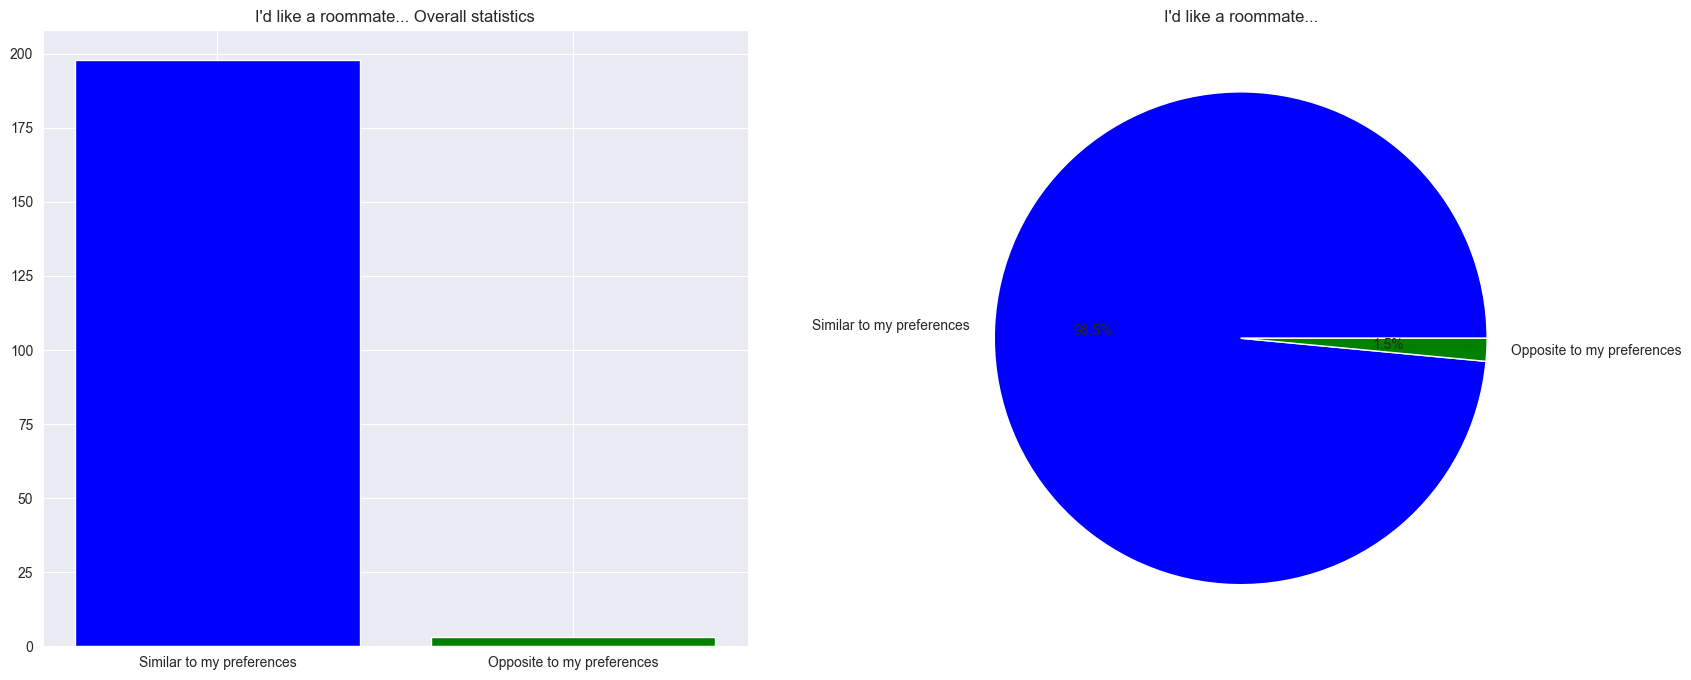

In [27]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.bar(options, answers_q3['option'].value_counts().sort_index(), color=['blue', 'green'])
plt.title("I'd like a roommate... Overall statistics")

plt.subplot(122)
plt.pie(answers_q3['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'green'])
plt.title("I'd like a roommate...")

plt.show()

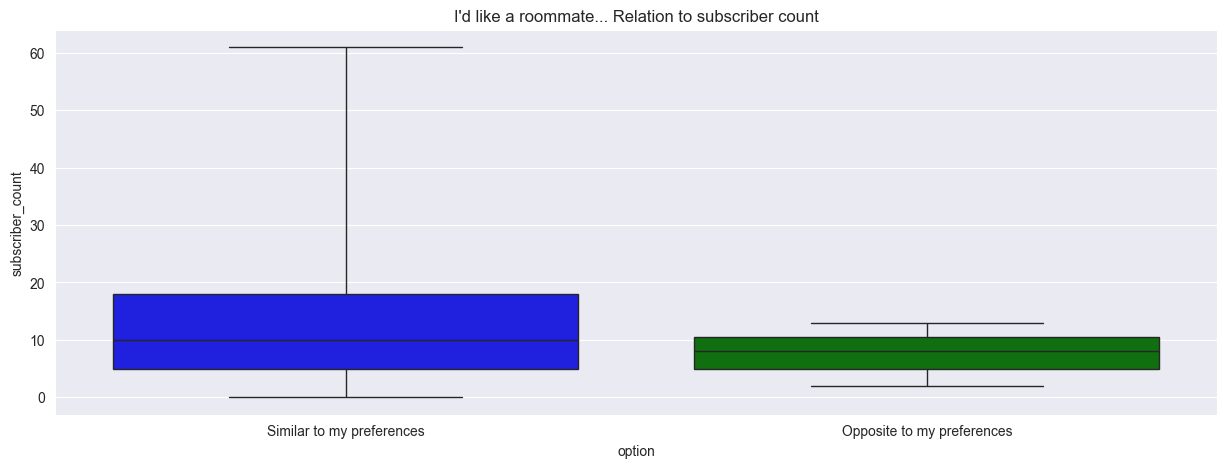

In [28]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='option', y='subscriber_count', data=answers_q3, whis=np.inf,
            palette={'0': 'blue', '1': 'green'})
plt.gca().set_xticklabels(options)
plt.title("I'd like a roommate... Relation to subscriber count")

plt.show()

Было вполне логичным предположить, что соседей будут выбирать на основе одинаковых предпочтений.

In [29]:
ids = answers_q3[answers_q3.option == 1].respondent_id.tolist()

participants[participants.id.isin(ids)]

,id,created_at,gender,subscriber_count,subscriber_ids,subscription_count,subscription_ids,viewed_count,viewed_ids,views,roommate_ids
115,116,12,male,2,"[65, 109]",0,[],0,[],29,"[212, 93, 205]"
141,142,11,female,8,"[22, 67, 29, 166, 21, 48]",14,"[215, 35, 85, 62, 32, 158, 102, 219, 82, 15, 7...",27,"[215, 35, 85, 67, 62, 32, 155, 158, 102, 219, ...",50,"[209, 90, 21]"
155,156,12,male,13,"[169, 65, 51, 66, 27, 150, 179, 94, 145, 151, ...",2,[169],10,"[203, 169, 65, 120, 204, 25, 207]",51,"[30, 6, 119]"


Всего таких индивидуумов трое. К счастью или к сожалению, они ни подписаны друг на друга, ни не являются соседями.

## 4. Do you drink alcohol?

In [30]:
answers_q4 = answers[answers.id == 4]

answers_q4

,id,question,options,respondent_id,option,gender,subscriber_count,views
3,4,Do you drink alcohol?,"['Yes', 'Rarely', 'No']",1,2,male,30,175
3,4,Do you drink alcohol?,"['Yes', 'Rarely', 'No']",2,2,male,20,116
3,4,Do you drink alcohol?,"['Yes', 'Rarely', 'No']",3,1,female,15,54
3,4,Do you drink alcohol?,"['Yes', 'Rarely', 'No']",4,2,female,7,36
3,4,Do you drink alcohol?,"['Yes', 'Rarely', 'No']",5,1,male,2,9
...,...,...,...,...,...,...,...,...
3,4,Do you drink alcohol?,"['Yes', 'Rarely', 'No']",216,0,male,6,56
3,4,Do you drink alcohol?,"['Yes', 'Rarely', 'No']",217,0,male,5,39
3,4,Do you drink alcohol?,"['Yes', 'Rarely', 'No']",218,2,male,12,33
3,4,Do you drink alcohol?,"['Yes', 'Rarely', 'No']",219,2,female,26,77


In [31]:
options = literal_eval(answers_q4['options'].iloc[0])

options

['Yes', 'Rarely', 'No']

In [32]:
answers_q4['option'].value_counts().sort_index()

option
0     21
1     70
2    110
Name: count, dtype: int64

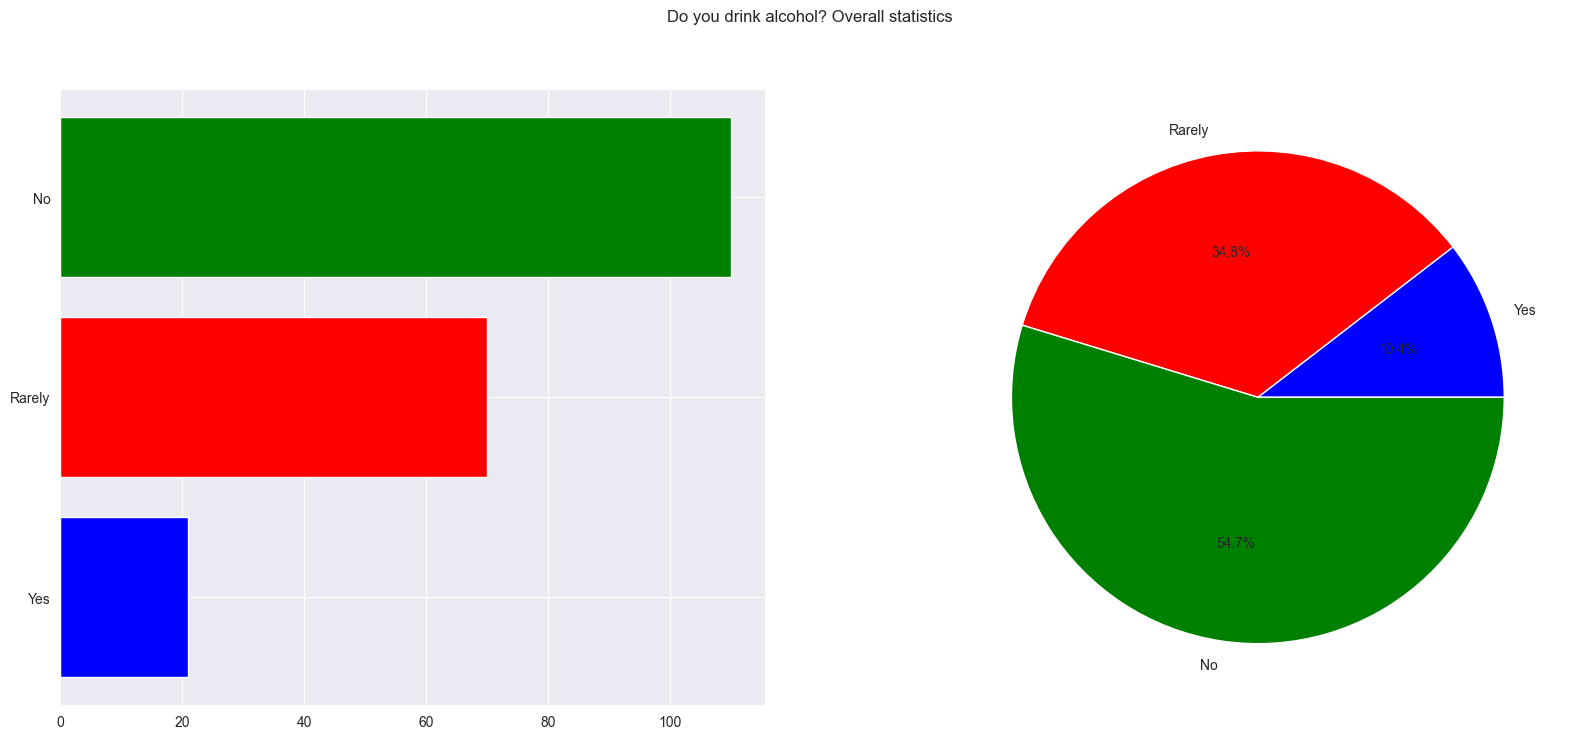

In [33]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.barh(options, answers_q4['option'].value_counts().sort_index(), color=['blue', 'red', 'green'])
plt.suptitle("Do you drink alcohol? Overall statistics")

plt.subplot(122)
plt.pie(answers_q4['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'red', 'green'])

plt.show()

Более 54% первокурсников не употребляет алкоголь. Превосходно!

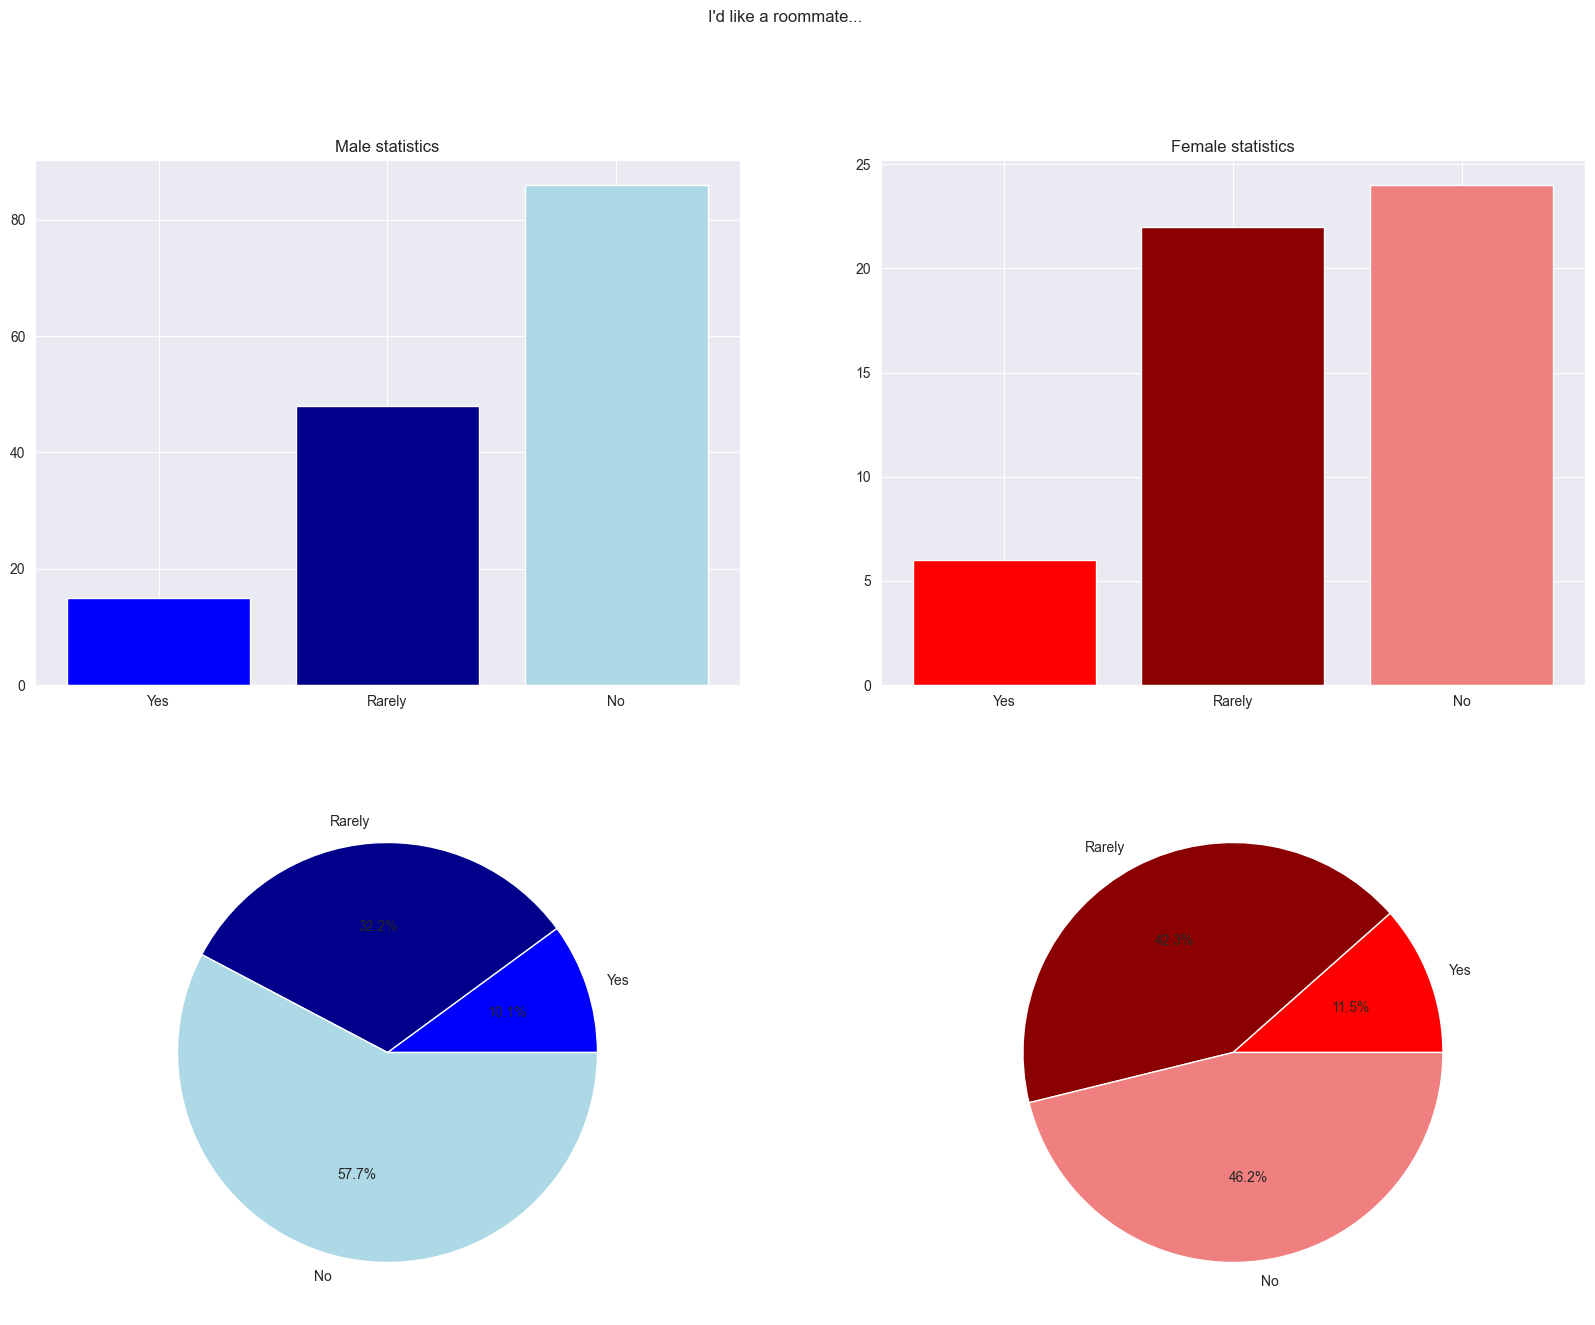

In [34]:
plt.figure(figsize=(20, 15))
plt.suptitle("I'd like a roommate...")
plt.subplot(221)
plt.bar(options,
        answers_q4['option'][answers_q4.gender == 'male'].value_counts().sort_index(),
        color=['blue', 'darkblue', 'lightblue'])
plt.title('Male statistics')

plt.subplot(222)
plt.bar(options,
        answers_q4['option'][answers_q4.gender == 'female'].value_counts().sort_index(),
        color=['red', 'darkred', 'lightcoral'])
plt.title('Female statistics')

plt.subplot(223)
plt.pie(answers_q4['option'][answers_q4.gender == 'male'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['blue', 'darkblue', 'lightblue'])

plt.subplot(224)
plt.pie(answers_q4['option'][answers_q4.gender == 'female'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['red', 'darkred', 'lightcoral'])

plt.show()

Глядя на графики сверху, сразу видно, что больше половины парней алкоголем не злоупотребляют. У девушек статистка интересней. Почти равное количество девушек либо не употребляет алкоголь (46%), либо делает это редко (42%).

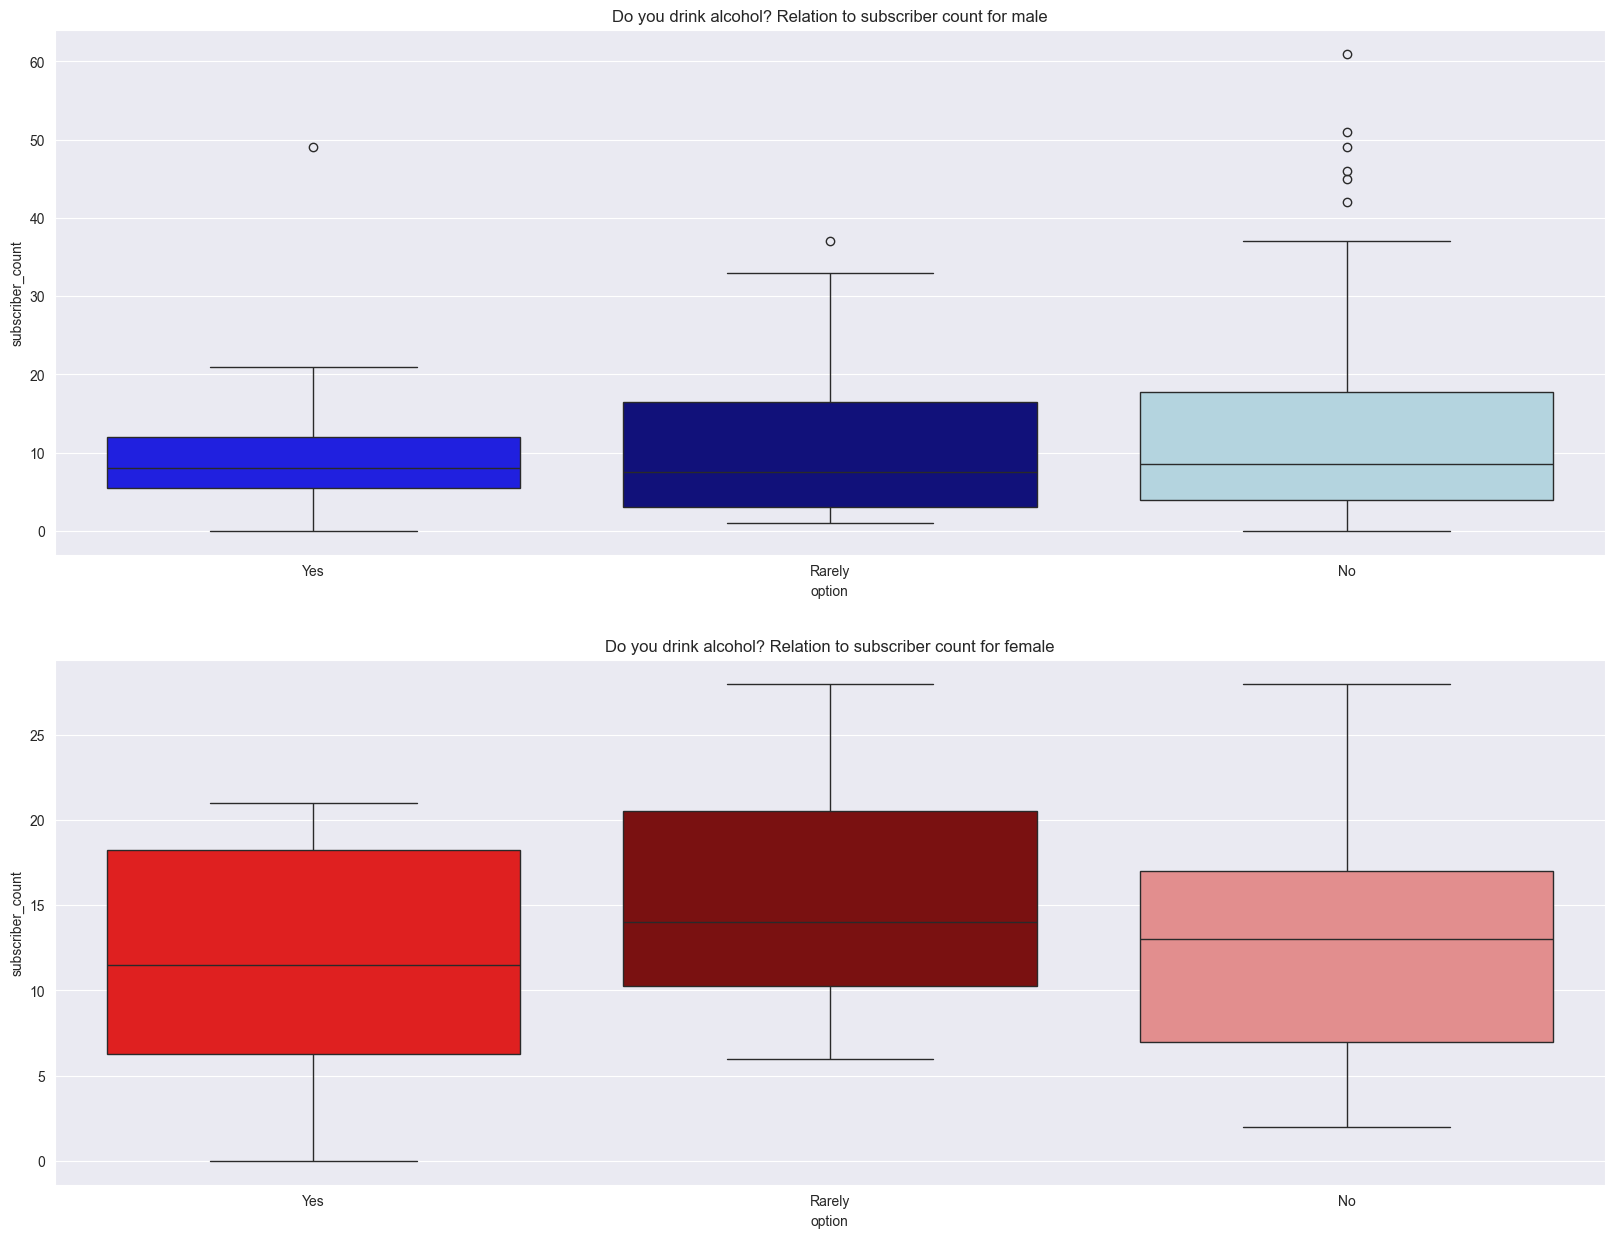

In [35]:
plt.figure(figsize=(20, 15))
plt.subplot(211)
sns.boxplot(x='option', y='subscriber_count',
            data=answers_q4[answers_q4.gender == 'male'],
            palette={'0': 'blue', '1': 'darkblue', '2': 'lightblue'})
plt.gca().set_xticklabels(options)
plt.title('Do you drink alcohol? Relation to subscriber count for male')

plt.subplot(212)
sns.boxplot(x='option', y='subscriber_count',
            data=answers_q4[answers_q4.gender == 'female'],
            palette={'0': 'red', '1': 'darkred', '2': 'lightcoral'})
plt.gca().set_xticklabels(options)
plt.title('Do you drink alcohol? Relation to subscriber count for female')

plt.show()

Графики сверху дают следующую интерпретацию. 
Среди мальчиков медианное значение почти равно для каждого ответа.  
У девушек ситуация опять немного другая. Медианные значения примерно одинаковы, однако девушки, которые выбрали ответы "Rarely", имеют большую популярность.

## 5. Nutritional habits

In [36]:
answers_q5 = answers[answers.id == 5]

answers_q5 = answers_q5[~answers_q5.respondent_id.isin(lst)]
answers_q5

,id,question,options,respondent_id,option,gender,subscriber_count,views
4,5,Nutritional habits,"['I cook by myself', ""I'll be ordering take-ou...",1,2,male,30,175
4,5,Nutritional habits,"['I cook by myself', ""I'll be ordering take-ou...",2,0,male,20,116
4,5,Nutritional habits,"['I cook by myself', ""I'll be ordering take-ou...",3,0,female,15,54
4,5,Nutritional habits,"['I cook by myself', ""I'll be ordering take-ou...",4,0,female,7,36
4,5,Nutritional habits,"['I cook by myself', ""I'll be ordering take-ou...",5,0,male,2,9
...,...,...,...,...,...,...,...,...
4,5,Nutritional habits,"['I cook by myself', ""I'll be ordering take-ou...",216,0,male,6,56
4,5,Nutritional habits,"['I cook by myself', ""I'll be ordering take-ou...",217,2,male,5,39
4,5,Nutritional habits,"['I cook by myself', ""I'll be ordering take-ou...",218,0,male,12,33
4,5,Nutritional habits,"['I cook by myself', ""I'll be ordering take-ou...",219,0,female,26,77


In [37]:
options = literal_eval(answers_q5['options'].iloc[0])

options

['I cook by myself', "I'll be ordering take-outs", "I'll go to the canteen"]

In [38]:
answers_q5['option'].value_counts().sort_index()


option
0    130
1      6
2     65
Name: count, dtype: int64

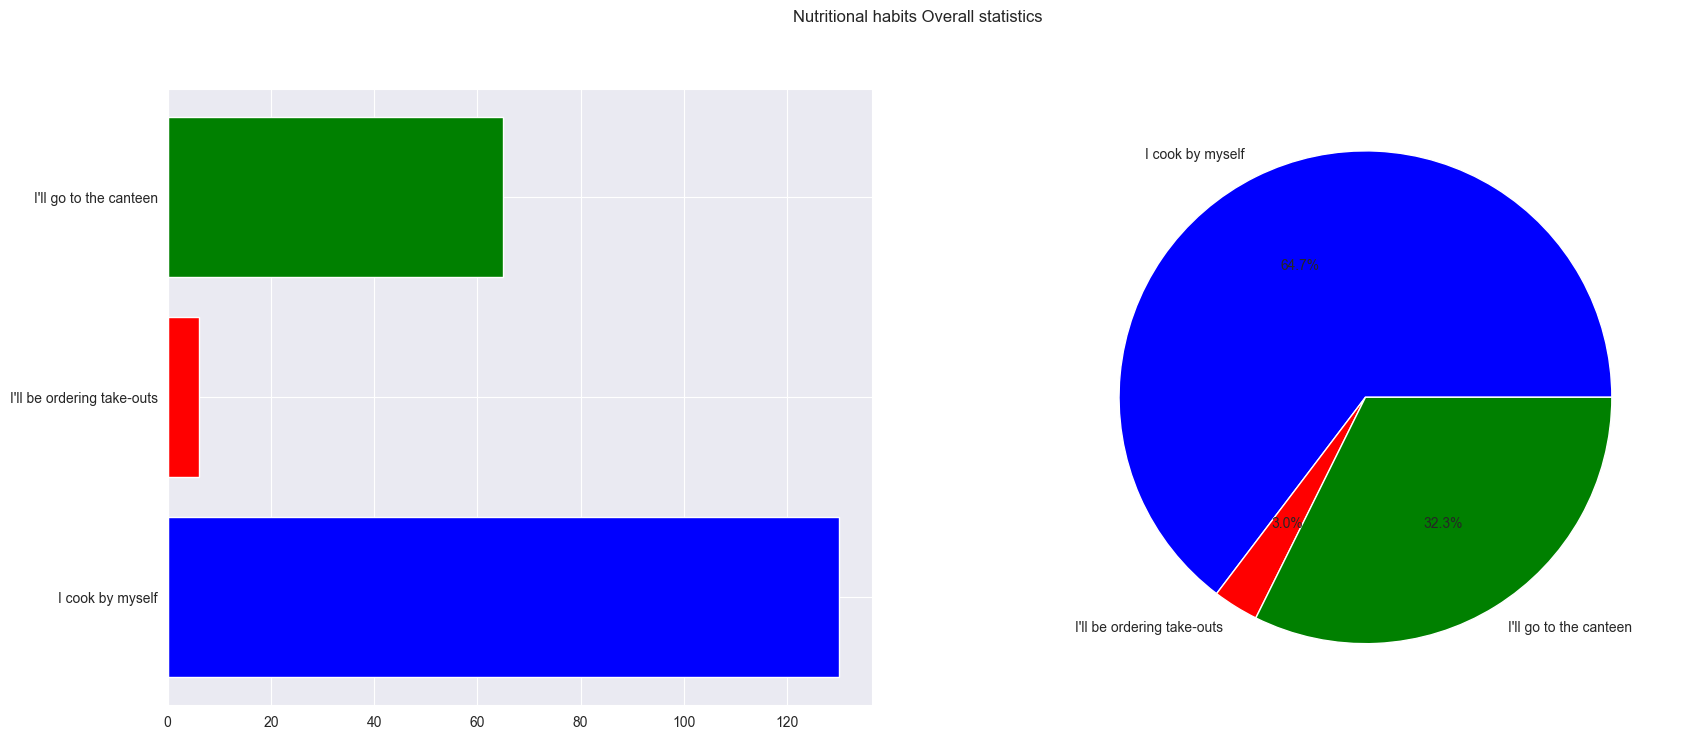

In [39]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.barh(options, answers_q5['option'].value_counts().sort_index(), color=['blue', 'red', 'green'])
plt.suptitle("Nutritional habits Overall statistics")

plt.subplot(122)
plt.pie(answers_q5['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'red', 'green'])

plt.show()

Данные графики полезны даже вне данного конкретного исследования. Обратим внимание, что большая часть первокурсников при заселении отметила, что планировала готовить самостоятельно. Некоторые выбрали опцию со столовой, но таких меньше, чем первых

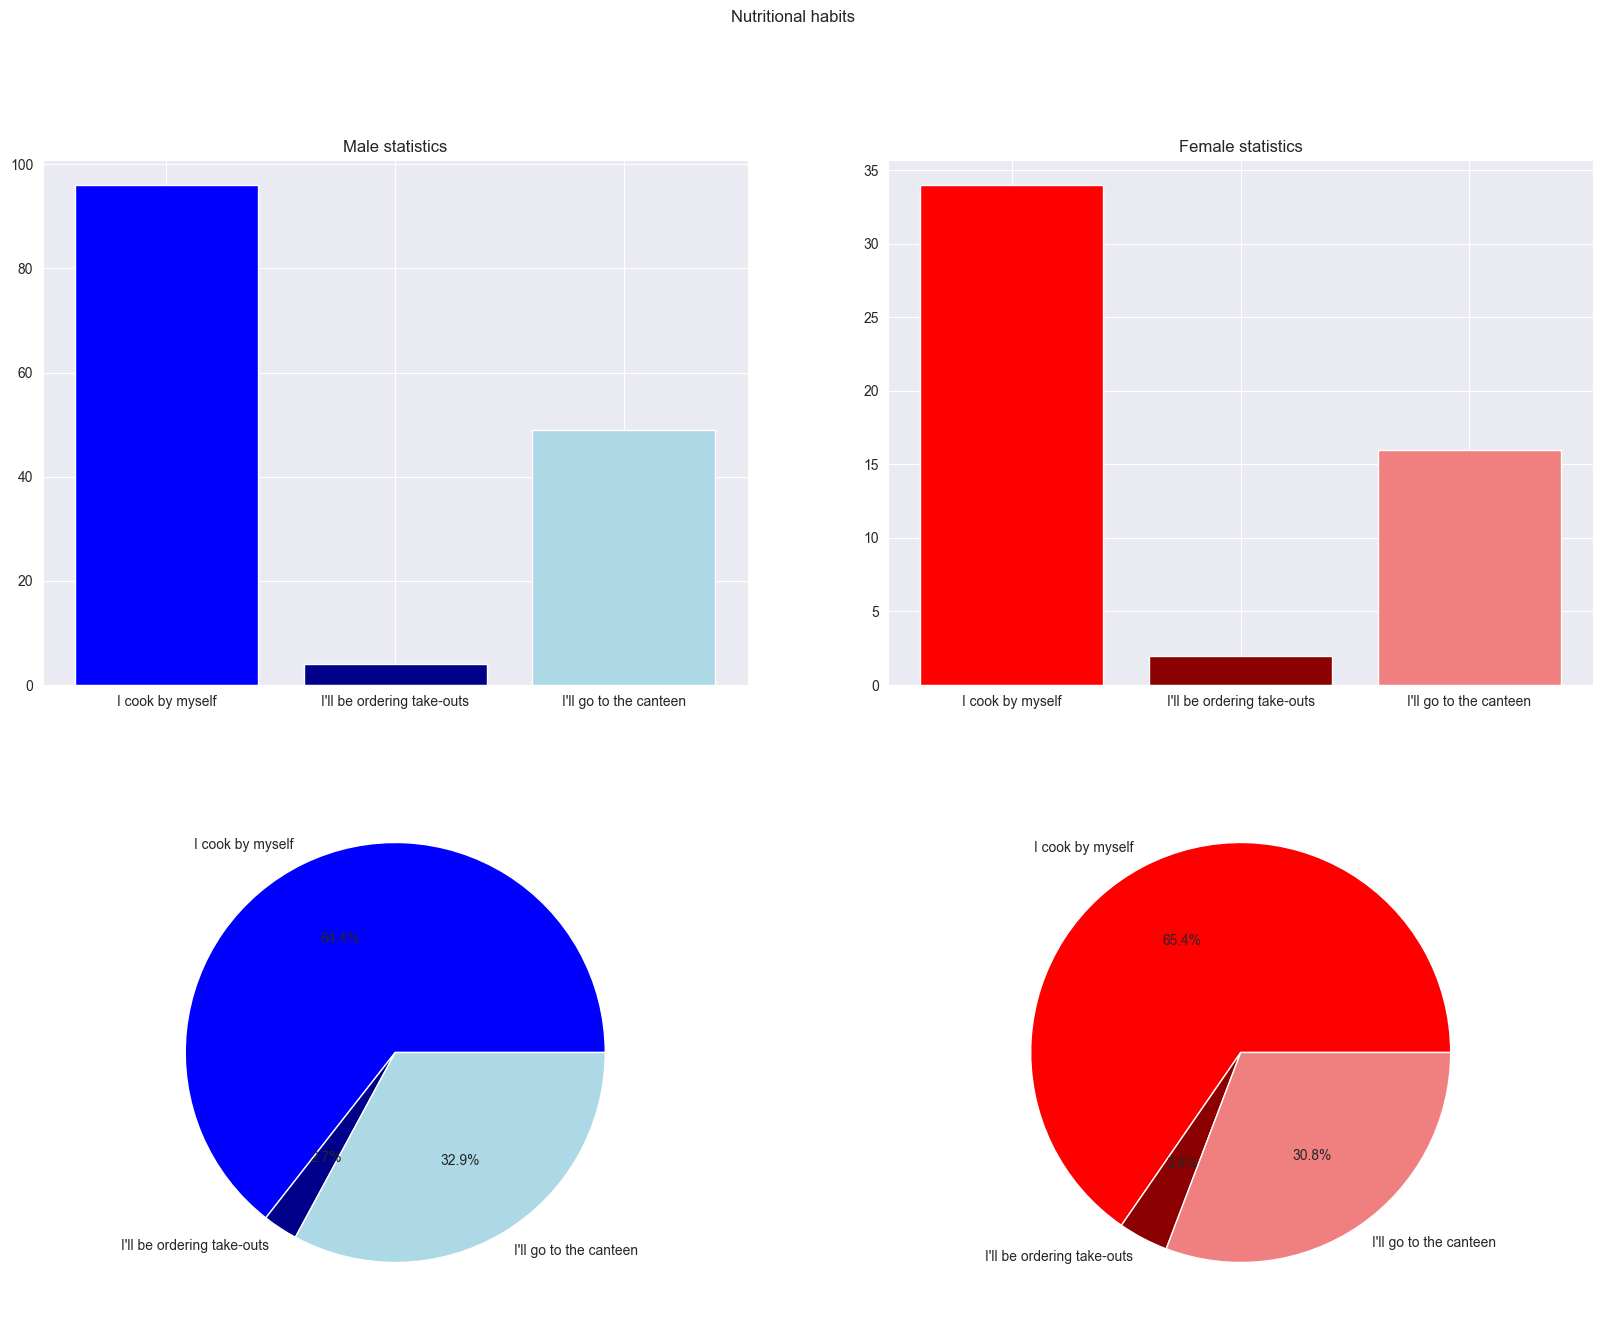

In [40]:
plt.figure(figsize=(20, 15))
plt.suptitle("Nutritional habits")
plt.subplot(221)
plt.bar(options,
        answers_q5['option'][answers_q5.gender == 'male'].value_counts().sort_index(),
        color=['blue', 'darkblue', 'lightblue'])
plt.title('Male statistics')

plt.subplot(222)
plt.bar(options,
        answers_q5['option'][answers_q5.gender == 'female'].value_counts().sort_index(),
        color=['red', 'darkred', 'lightcoral'])
plt.title('Female statistics')

plt.subplot(223)
plt.pie(answers_q5['option'][answers_q5.gender == 'male'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['blue', 'darkblue', 'lightblue'])

plt.subplot(224)
plt.pie(answers_q5['option'][answers_q5.gender == 'female'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['red', 'darkred', 'lightcoral'])

plt.show()

Распределение по статистике среди девушек и парней почти что одинаковое. Интересных закономерностей вычислить нельзя.

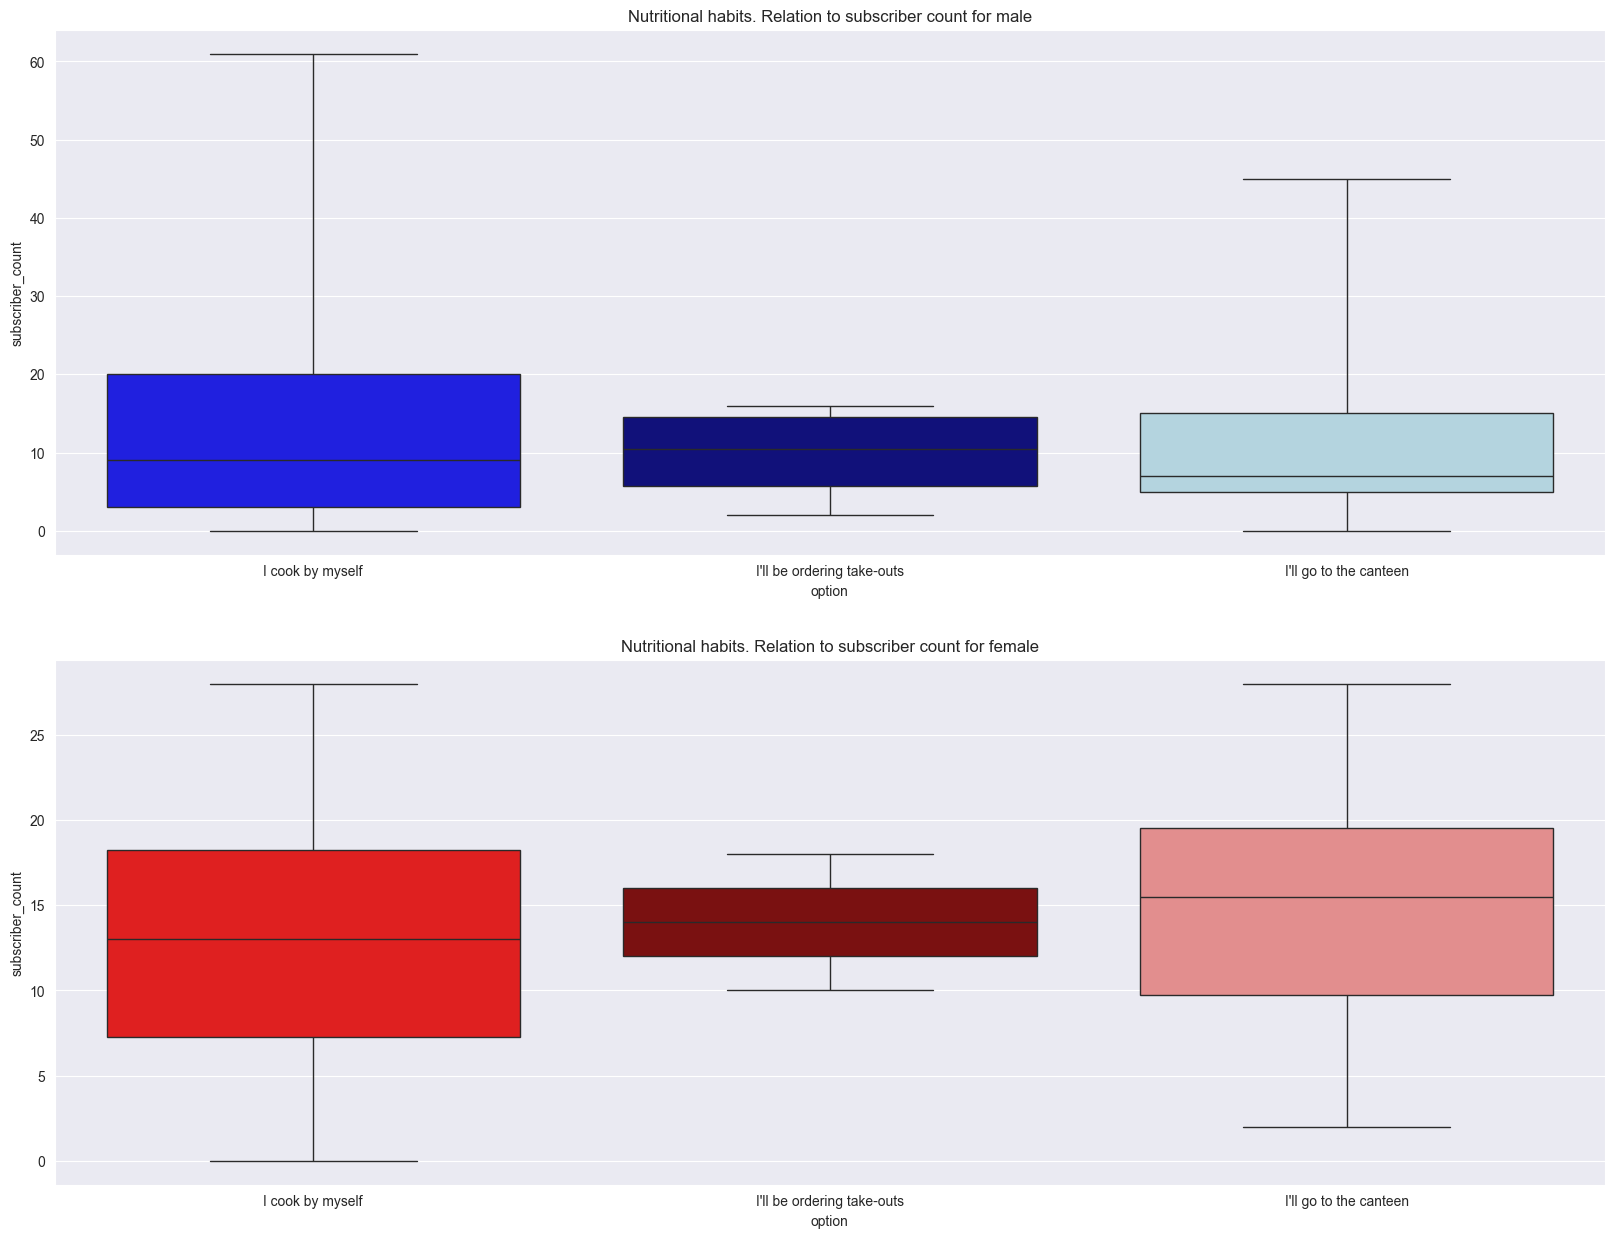

In [41]:
plt.figure(figsize=(20, 15))
plt.subplot(211)
sns.boxplot(x='option', y='subscriber_count', whis=np.inf,
            data=answers_q5[answers_q5.gender == 'male'],
            palette={'0': 'blue', '1': 'darkblue', '2': 'lightblue'})
plt.gca().set_xticklabels(options)
plt.title('Nutritional habits. Relation to subscriber count for male')

plt.subplot(212)
sns.boxplot(x='option', y='subscriber_count',
            data=answers_q5[answers_q5.gender == 'female'],
            palette={'0': 'red', '1': 'darkred', '2': 'lightcoral'})
plt.gca().set_xticklabels(options)
plt.title('Nutritional habits. Relation to subscriber count for female')

plt.show()

Основываясь на графиках, напрашиваются следующие выводы.
1. Среди парней медианное значение почти одинаково. Выделяется разве что опция 2. Там медианное значение меньше, но не настолько.
2. У девушек, которые выбрали третий вариант, медианное значение подписчиков наоборот больше, чем у выбравших другие опции. Кроме того, у 25% девушек, выбравших столовую, подписчиков больше, чем у девушек, выбравших другие опции. 


## 6. Native language

In [42]:
answers_q6 = answers[answers.id == 6]

answers_q6

,id,question,options,respondent_id,option,gender,subscriber_count,views
5,6,Native language,"['Russian', 'English', 'Other']",1,0,male,30,175
5,6,Native language,"['Russian', 'English', 'Other']",2,0,male,20,116
5,6,Native language,"['Russian', 'English', 'Other']",3,0,female,15,54
5,6,Native language,"['Russian', 'English', 'Other']",4,0,female,7,36
5,6,Native language,"['Russian', 'English', 'Other']",5,0,male,2,9
...,...,...,...,...,...,...,...,...
5,6,Native language,"['Russian', 'English', 'Other']",216,0,male,6,56
5,6,Native language,"['Russian', 'English', 'Other']",217,0,male,5,39
5,6,Native language,"['Russian', 'English', 'Other']",218,0,male,12,33
5,6,Native language,"['Russian', 'English', 'Other']",219,0,female,26,77


In [43]:
options = literal_eval(answers_q6['options'].iloc[0])

options

['Russian', 'English', 'Other']

In [44]:
option_0_ids = answers_q6[answers_q6.option == 0].respondent_id.tolist()
option_1_ids = answers_q6[answers_q6.option == 1].respondent_id.tolist()
option_2_ids = answers_q6[answers_q6.option == 2].respondent_id.tolist()

print(f'Number of Russian speaker students: {len(option_0_ids)}')
print(f'Number of English speaker students: {len(option_1_ids)}')
print(f'Number of other languages speaker students: {len(option_2_ids)}')

Number of Russian speaker students: 194
Number of English speaker students: 2
Number of other languages speaker students: 5


In [45]:
len(answers_q6.respondent_id.unique())

201

In [46]:
option_0_ids_male = answers_q6[(answers_q6.option == 0) & (answers_q6.gender == 'male')].respondent_id.tolist()
option_1_ids_male = answers_q6[(answers_q6.option == 1) & (answers_q6.gender == 'male')].respondent_id.tolist()
option_2_ids_male = answers_q6[(answers_q6.option == 2) & (answers_q6.gender == 'male')].respondent_id.tolist()

print(f'Number of male Russian speaker students: {len(option_0_ids_male)}')
print(f'Number of male English speaker students: {len(option_1_ids_male)}')
print(f'Number of male other languages speaker students: {len(option_2_ids_male)}')

Number of male Russian speaker students: 143
Number of male English speaker students: 2
Number of male other languages speaker students: 4


In [47]:
option_0_ids_female = answers_q6[(answers_q6.option == 0) & (answers_q6.gender == 'female')].respondent_id.tolist()
option_1_ids_female = answers_q6[(answers_q6.option == 1) & (answers_q6.gender == 'female')].respondent_id.tolist()
option_2_ids_female = answers_q6[(answers_q6.option == 2) & (answers_q6.gender == 'female')].respondent_id.tolist()

print(f'Number of female Russian speaker students: {len(option_0_ids_female)}')
print(f'Number of female English speaker students: {len(option_1_ids_female)}')
print(f'Number of female other languages speaker students: {len(option_2_ids_female)}')

Number of male Russian speaker students: 51
Number of male English speaker students: 0
Number of male other languages speaker students: 1


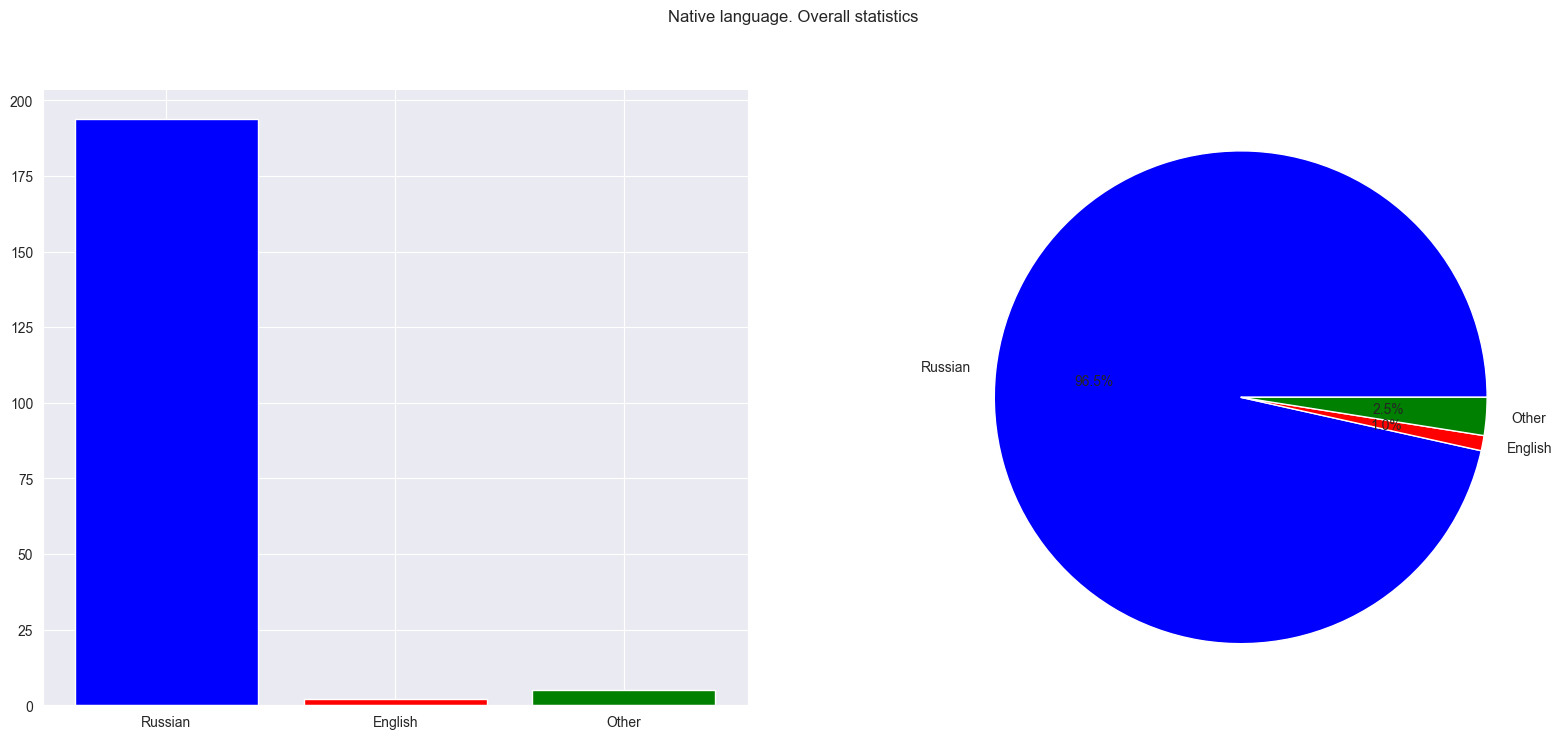

In [48]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.bar(options, answers_q6['option'].value_counts().sort_index(), color=['blue', 'red', 'green'])
plt.suptitle("Native language. Overall statistics")

plt.subplot(122)
plt.pie(answers_q6['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'red', 'green'])

plt.show()

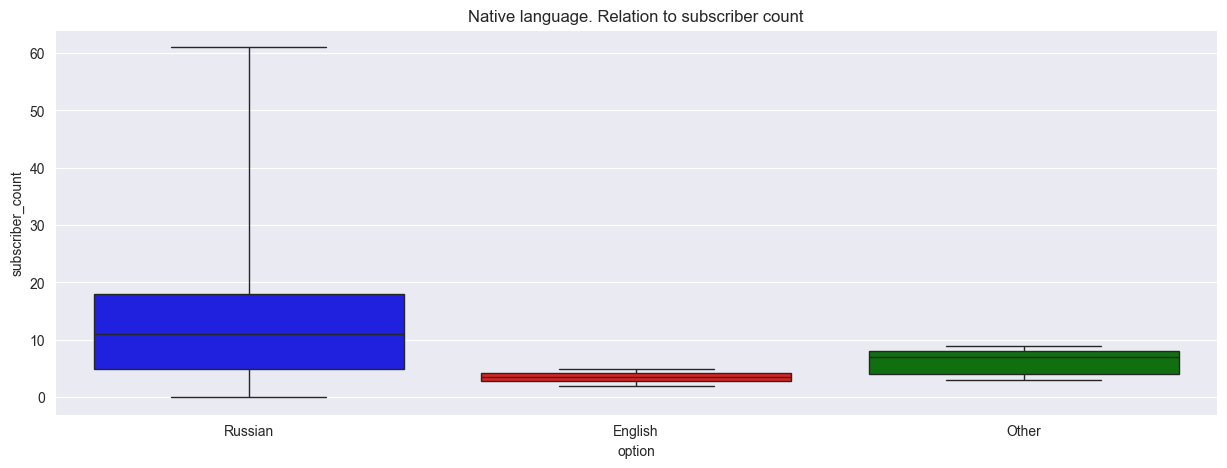

In [49]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='option', y='subscriber_count', data=answers_q6, whis=np.inf,
            palette={'0': 'blue', '1': 'red', '2': 'green'})
plt.gca().set_xticklabels(options)
plt.title("Native language. Relation to subscriber count")

plt.show()

Носителей русского языка значительно больше, чем остальных языковых групп. В сумме, иностранцев на потоке всего-лишь 7. Логично, что владельцы одного и тоже языка будут предпочитать селиться друг с другом. Русскоговорящих студентов очень много, чтобы оценивать каждого, однако мы можем проанализировать, получилось ли владельцам других языков жить вместе.

In [50]:
participants[participants.id.isin(option_1_ids) | participants.id.isin(option_2_ids)]

,id,created_at,gender,subscriber_count,subscriber_ids,subscription_count,subscription_ids,viewed_count,viewed_ids,views,roommate_ids
51,52,12,male,9,"[199, 183, 190, 65, 147, 160, 93, 109]",3,"[183, 199, 190]",68,"[203, 120, 204, 25, 207, 118, 1, 27, 43, 51, 1...",74,"[183, 190, 199]"
72,73,4,male,2,"[65, 109]",7,"[120, 204, 25, 109, 207]",12,"[203, 120, 204, 25, 65, 109, 207, 118]",17,"[87, 96, 146]"
82,83,3,male,4,"[109, 14, 27, 145]",14,"[203, 120, 204, 25, 27, 51, 104, 179, 189, 187...",31,"[203, 120, 204, 25, 207, 118, 1, 27, 43, 51, 1...",16,"[1, 132, 14]"
90,91,7,male,5,"[65, 145, 109, 50, 169]",46,"[203, 204, 25, 207, 118, 1, 27, 43, 51, 104, 1...",47,"[203, 120, 204, 25, 207, 118, 1, 27, 43, 51, 1...",36,"[131, 185, 99]"
92,93,12,male,8,"[65, 27, 66, 14, 68, 128, 46, 109]",78,"[65, 27, 66, 203, 120, 204, 25, 207, 118, 1, 4...",79,"[65, 27, 66, 203, 120, 204, 25, 207, 118, 1, 4...",69,"[212, 205, 116]"
143,144,12,female,7,"[67, 11, 29, 181, 166]",10,"[158, 102, 82, 74, 22, 164, 181, 75, 135]",55,"[215, 35, 85, 67, 62, 32, 155, 158, 102, 219, ...",47,"[22, 148, 135]"
174,175,12,male,3,"[65, 66, 109]",14,"[120, 204, 25, 207, 1, 27, 65, 66, 43, 51, 104...",22,"[203, 120, 204, 25, 207, 118, 1, 27, 65, 66, 4...",53,"[125, 57, 37]"


Как видно из таблицы выше, абсолютно все иностранные студенты живут вперемешку с носителями русского языка. 

p.s: является ли позиция расселения студентов разных языковых групп хорошей идеей? Особенно на первом курсе каждый проходит социализацию, а так как иностранных студентов подавляющее меньшинство, то проблема социализации может стать для некоторых особо актуальной. Действительно, всех иностранных студентов невозможно распределить одинаково, но было бы неплохо, если бы хотя бы 2 таких человека жили вместе. Возможно, данный аспект требует консультации с психологом.

## 7. How do you feel about sharing things and food?

In [51]:
answers_q7 = answers[answers.id == 7]
answers_q7 = answers_q7[~answers_q7.respondent_id.isin(lst)]

answers_q7

,id,question,options,respondent_id,option,gender,subscriber_count,views
6,7,How do you feel about sharing things and food?,"['Negative, I will only cook for myself', 'Pos...",1,1,male,30,175
6,7,How do you feel about sharing things and food?,"['Negative, I will only cook for myself', 'Pos...",2,2,male,20,116
6,7,How do you feel about sharing things and food?,"['Negative, I will only cook for myself', 'Pos...",3,2,female,15,54
6,7,How do you feel about sharing things and food?,"['Negative, I will only cook for myself', 'Pos...",4,1,female,7,36
6,7,How do you feel about sharing things and food?,"['Negative, I will only cook for myself', 'Pos...",5,1,male,2,9
...,...,...,...,...,...,...,...,...
6,7,How do you feel about sharing things and food?,"['Negative, I will only cook for myself', 'Pos...",216,1,male,6,56
6,7,How do you feel about sharing things and food?,"['Negative, I will only cook for myself', 'Pos...",217,1,male,5,39
6,7,How do you feel about sharing things and food?,"['Negative, I will only cook for myself', 'Pos...",218,2,male,12,33
6,7,How do you feel about sharing things and food?,"['Negative, I will only cook for myself', 'Pos...",219,2,female,26,77


In [52]:
options = literal_eval(answers_q7['options'].iloc[0])

options

['Negative, I will only cook for myself',
 'Positive, ready to buy food and cook together',
 "Doesn't matter, negotiable"]

In [53]:
answers_q7['option'].value_counts().sort_index()

option
0      8
1    123
2     70
Name: count, dtype: int64

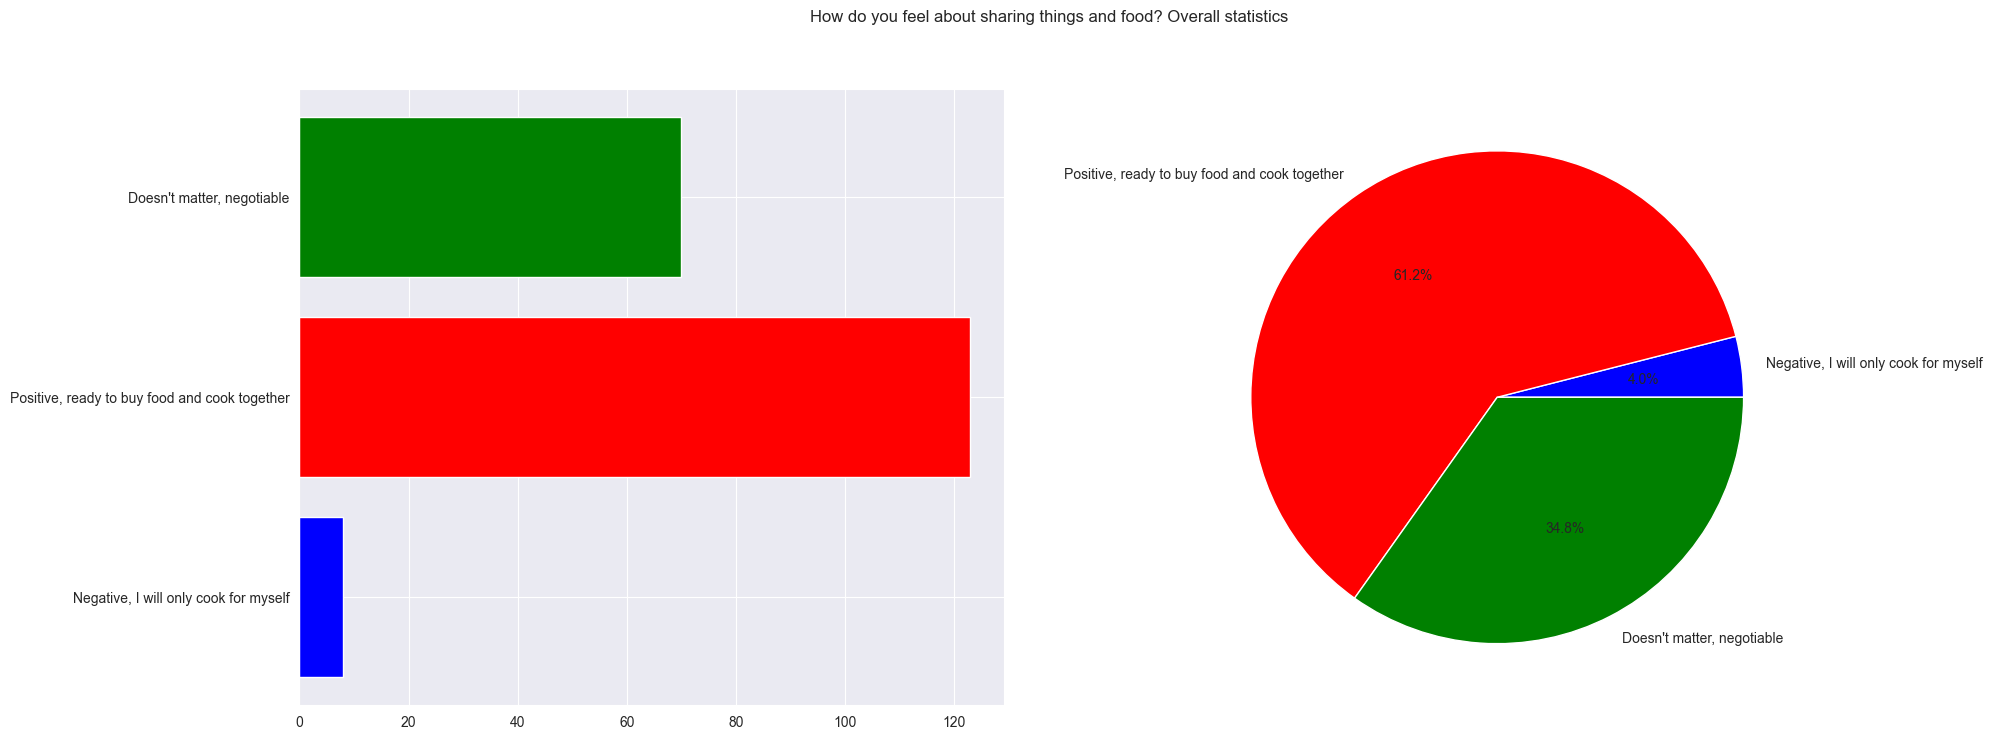

In [54]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.barh(options, answers_q7['option'].value_counts().sort_index(), color=['blue', 'red', 'green'])
plt.suptitle("How do you feel about sharing things and food? Overall statistics")

plt.subplot(122)
plt.pie(answers_q7['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'red', 'green'])

plt.show()

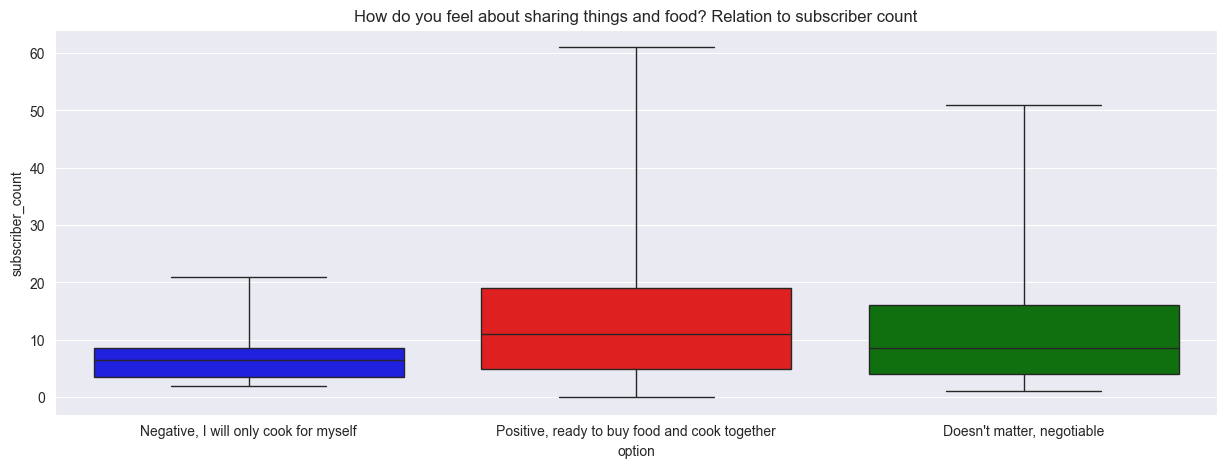

In [55]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='option', y='subscriber_count', data=answers_q7, whis=np.inf,
            palette={'0': 'blue', '1': 'red', '2': 'green'})
plt.gca().set_xticklabels(options)
plt.title("How do you feel about sharing things and food? Relation to subscriber count")

plt.show()

Вполне логично было предположить, что студентов, которые не против делится едой, будет больше. Они и популярны у других также

## 8. Sociability

In [56]:
answers_q8 = answers[answers.id == 8]

answers_q8

,id,question,options,respondent_id,option,gender,subscriber_count,views
7,8,Sociability,"['Talking all the time', 'Depends on the mood'...",1,1,male,30,175
7,8,Sociability,"['Talking all the time', 'Depends on the mood'...",2,1,male,20,116
7,8,Sociability,"['Talking all the time', 'Depends on the mood'...",3,0,female,15,54
7,8,Sociability,"['Talking all the time', 'Depends on the mood'...",4,1,female,7,36
7,8,Sociability,"['Talking all the time', 'Depends on the mood'...",5,0,male,2,9
...,...,...,...,...,...,...,...,...
7,8,Sociability,"['Talking all the time', 'Depends on the mood'...",216,1,male,6,56
7,8,Sociability,"['Talking all the time', 'Depends on the mood'...",217,1,male,5,39
7,8,Sociability,"['Talking all the time', 'Depends on the mood'...",218,0,male,12,33
7,8,Sociability,"['Talking all the time', 'Depends on the mood'...",219,1,female,26,77


In [57]:
options = literal_eval(answers_q8['options'].iloc[0])

options

['Talking all the time', 'Depends on the mood', 'Talking is not for me']

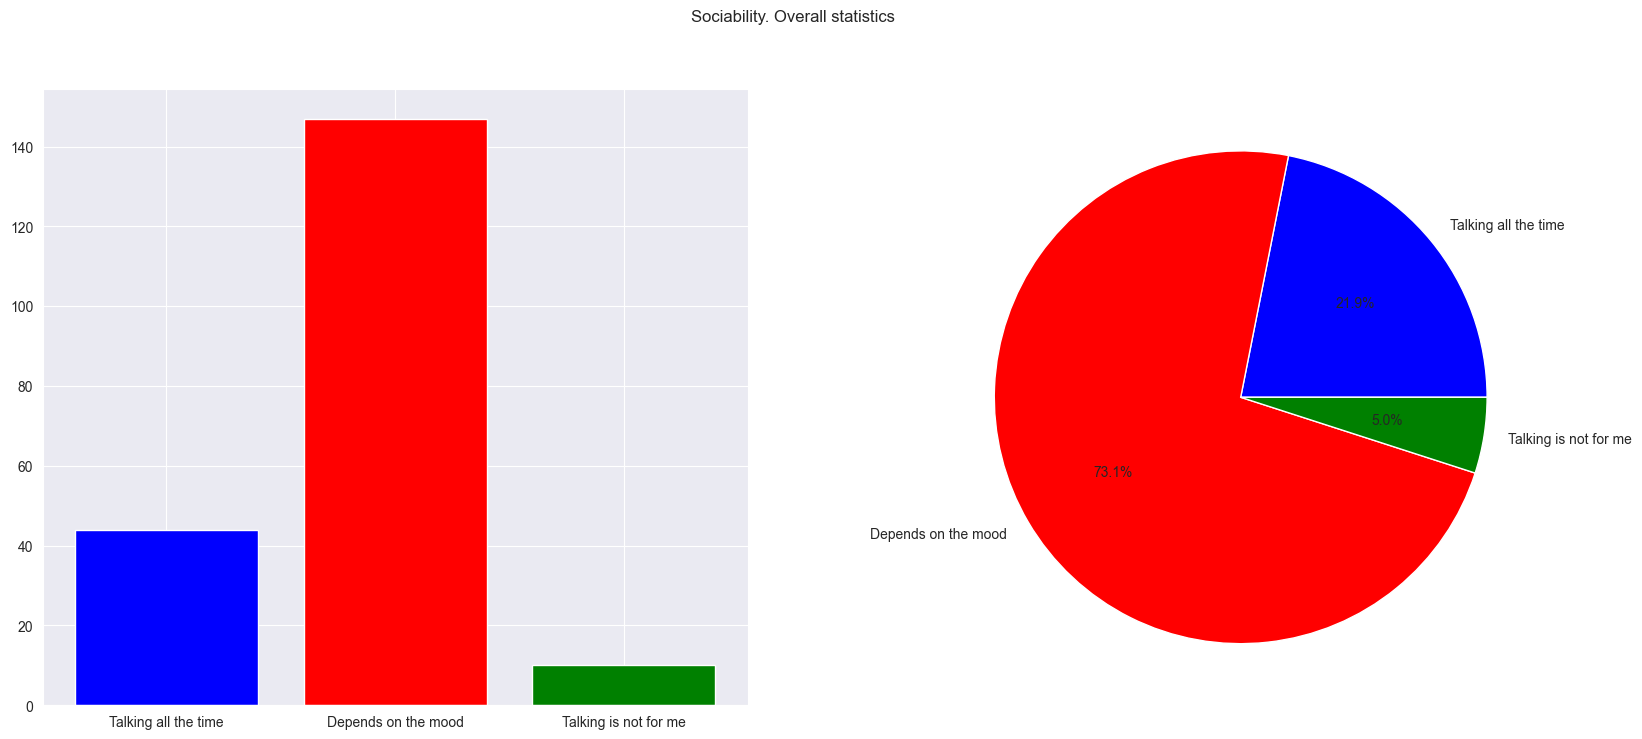

In [58]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.bar(options, answers_q8['option'].value_counts().sort_index(), color=['blue', 'red', 'green'])
plt.suptitle("Sociability. Overall statistics")

plt.subplot(122)
plt.pie(answers_q8['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'red', 'green'])

plt.show()

Еще одно подтверждение, что "амбивертов" среди студентов гораздо больше, чем других. 

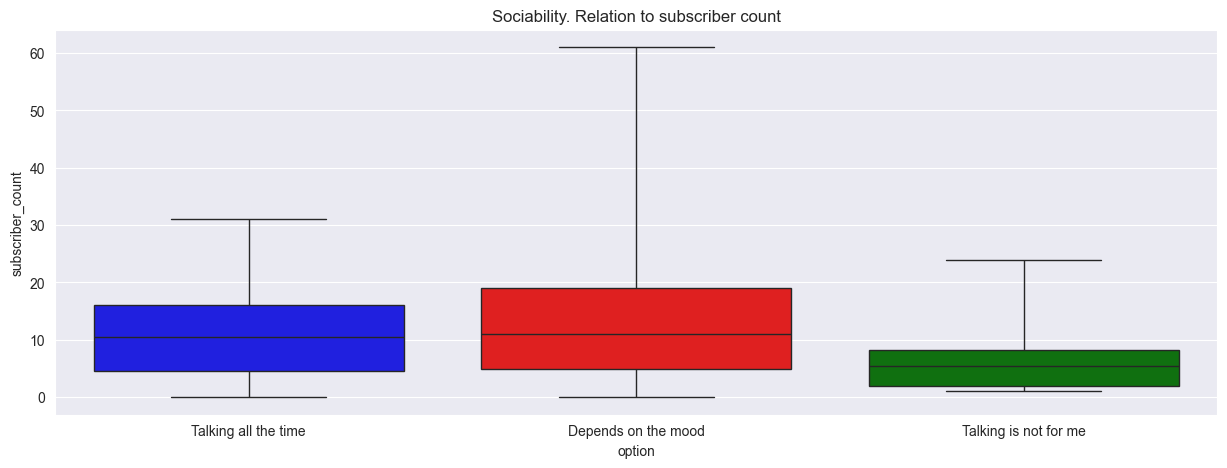

In [59]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='option', y='subscriber_count', data=answers_q8, whis=np.inf,
            palette={'0': 'blue', '1': 'red', '2': 'green'})
plt.gca().set_xticklabels(options)
plt.title("Sociability. Relation to subscriber count")

plt.show()

Хотя студентов, предпочитающих опцию 1 (Depends on the mood) больше 70%, судя по количеству подписчиков, на ребят, которые выбрали опцию 0 (Talking all the time), в среднем подписано примерно такое же число подписчиков. Студенты, выбравшие опцию 2 (Talking is not for me), не особо популярны. 

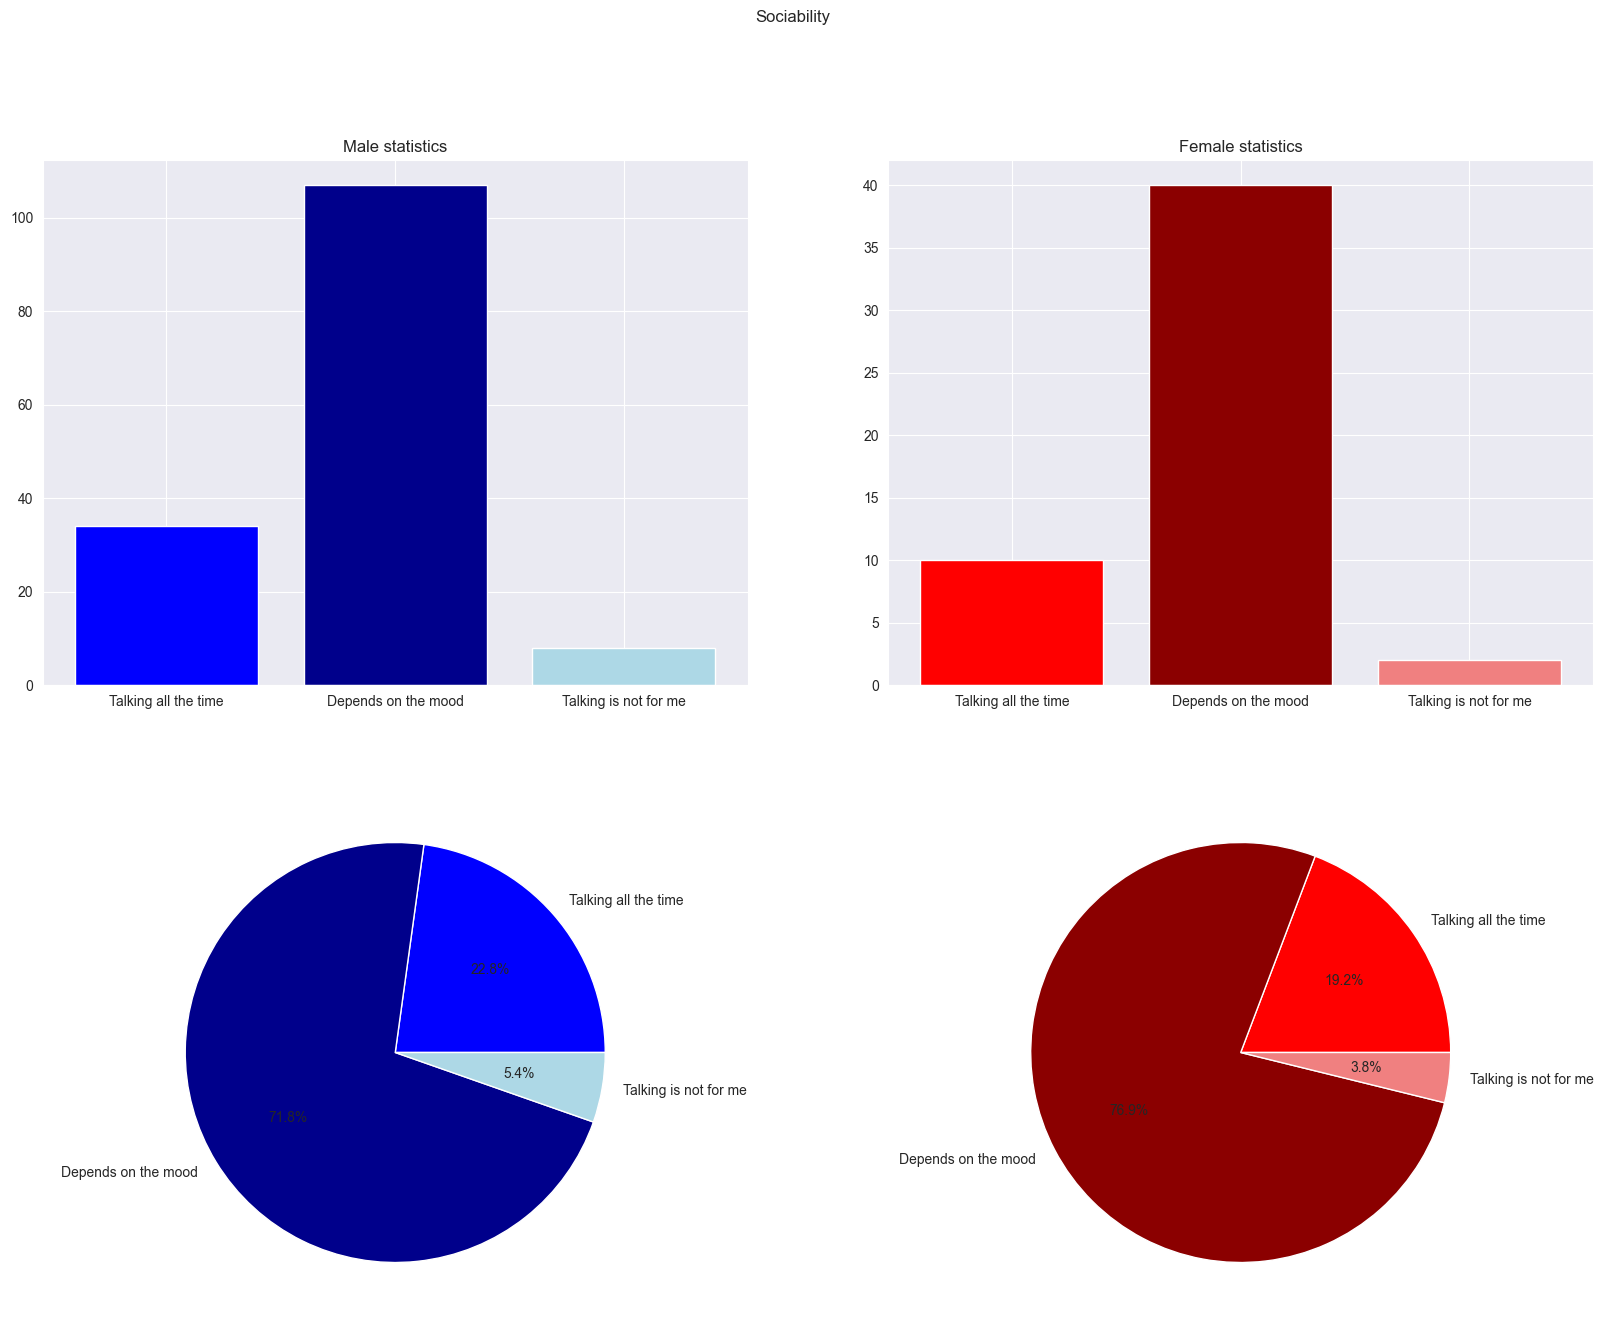

In [60]:
plt.figure(figsize=(20, 15))
plt.suptitle("Sociability")
plt.subplot(221)
plt.bar(options,
        answers_q8['option'][answers_q8.gender == 'male'].value_counts().sort_index(),
        color=['blue', 'darkblue', 'lightblue'])
plt.title('Male statistics')

plt.subplot(222)
plt.bar(options,
        answers_q8['option'][answers_q8.gender == 'female'].value_counts().sort_index(),
        color=['red', 'darkred', 'lightcoral'])
plt.title('Female statistics')

plt.subplot(223)
plt.pie(answers_q8['option'][answers_q8.gender == 'male'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['blue', 'darkblue', 'lightblue'])

plt.subplot(224)
plt.pie(answers_q8['option'][answers_q8.gender == 'female'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['red', 'darkred', 'lightcoral'])

plt.show()

Статистика как для парней, так и для девушек, почти что идентичная. 

## 9. Lark or owl?

In [61]:
answers_q9 = answers[answers.id == 9]
answers_q9 = answers_q9[~answers_q9.respondent_id.isin(lst)]

answers_q9

,id,question,options,respondent_id,option,gender,subscriber_count,views
8,9,Lark or owl?,"['Lark', 'Owl']",1,0,male,30,175
8,9,Lark or owl?,"['Lark', 'Owl']",2,0,male,20,116
8,9,Lark or owl?,"['Lark', 'Owl']",3,0,female,15,54
8,9,Lark or owl?,"['Lark', 'Owl']",4,0,female,7,36
8,9,Lark or owl?,"['Lark', 'Owl']",5,1,male,2,9
...,...,...,...,...,...,...,...,...
8,9,Lark or owl?,"['Lark', 'Owl']",216,1,male,6,56
8,9,Lark or owl?,"['Lark', 'Owl']",217,1,male,5,39
8,9,Lark or owl?,"['Lark', 'Owl']",218,1,male,12,33
8,9,Lark or owl?,"['Lark', 'Owl']",219,0,female,26,77


In [62]:
options = literal_eval(answers_q9['options'].iloc[0])

options

['Lark', 'Owl']

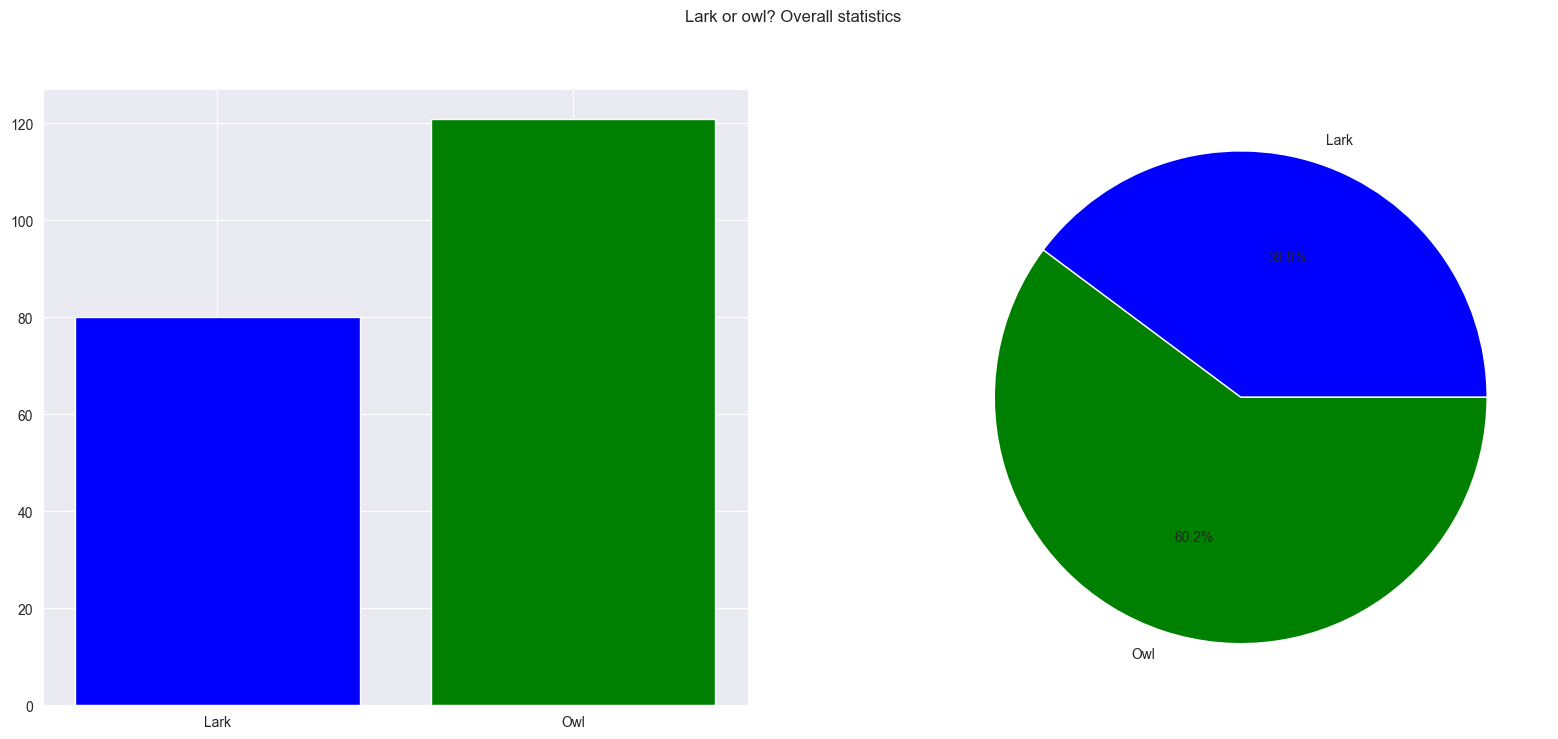

In [63]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.bar(options, answers_q9['option'].value_counts().sort_index(), color=['blue', 'green'])
plt.suptitle("Lark or owl? Overall statistics")

plt.subplot(122)
plt.pie(answers_q9['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'green'])

plt.show()

Больше половины студентов являются "совами".

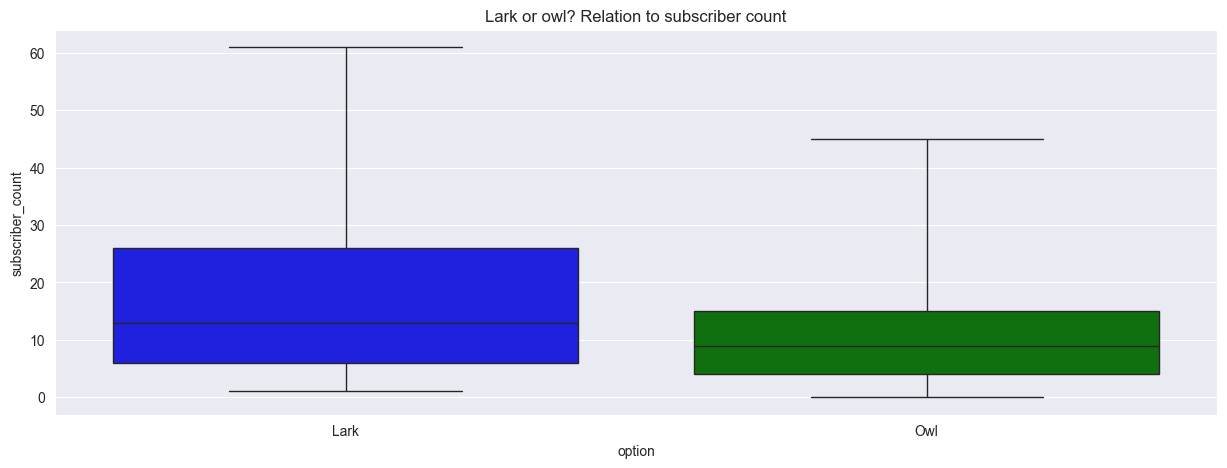

In [64]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='option', y='subscriber_count', data=answers_q9, whis=np.inf,
            palette={'0': 'blue', '1': 'green'})
plt.gca().set_xticklabels(options)
plt.title("Lark or owl? Relation to subscriber count")

plt.show()

Интересно, что, хотя количество "сов" больше, чем жаворонков, медианное значение подписчиков у жаворонков больше, чем у "сов". 


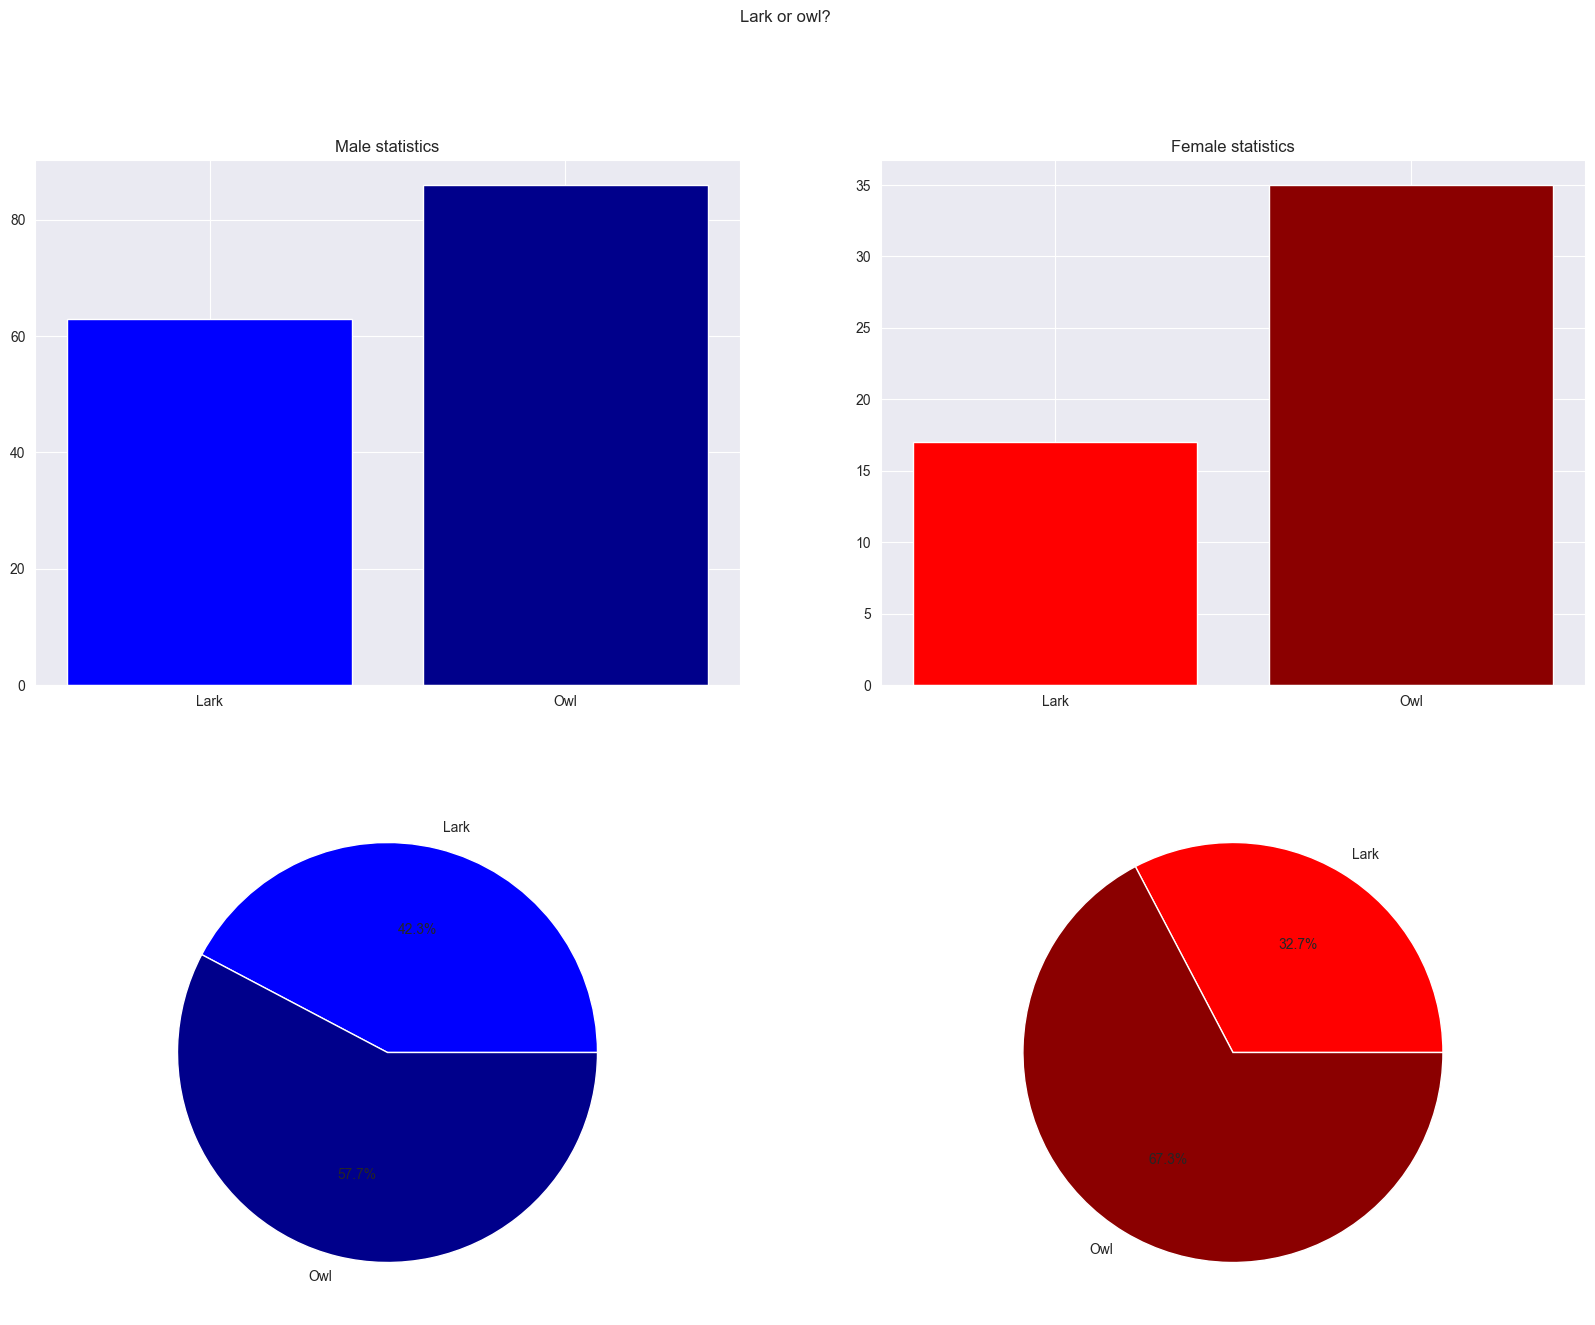

In [65]:
plt.figure(figsize=(20, 15))
plt.suptitle("Lark or owl?")
plt.subplot(221)
plt.bar(options,
        answers_q9['option'][answers_q9.gender == 'male'].value_counts().sort_index(),
        color=['blue', 'darkblue', 'lightblue'])
plt.title('Male statistics')

plt.subplot(222)
plt.bar(options,
        answers_q9['option'][answers_q9.gender == 'female'].value_counts().sort_index(),
        color=['red', 'darkred', 'lightcoral'])
plt.title('Female statistics')

plt.subplot(223)
plt.pie(answers_q9['option'][answers_q9.gender == 'male'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['blue', 'darkblue', 'lightblue'])

plt.subplot(224)
plt.pie(answers_q9['option'][answers_q9.gender == 'female'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['red', 'darkred', 'lightcoral'])

plt.show()

Среди парней, как и в целом, больше "сов". Пропорциональность "сов" и "жаворонок" среди девушек лишь немного отличается.

## 10. Do you smoke?

In [66]:
answers_q10 = answers[answers.id == 10]

answers_q10

,id,question,options,respondent_id,option,gender,subscriber_count,views
9,10,Do you smoke?,"['Yes', 'Rarely', 'No']",1,2,male,30,175
9,10,Do you smoke?,"['Yes', 'Rarely', 'No']",2,2,male,20,116
9,10,Do you smoke?,"['Yes', 'Rarely', 'No']",3,2,female,15,54
9,10,Do you smoke?,"['Yes', 'Rarely', 'No']",4,2,female,7,36
9,10,Do you smoke?,"['Yes', 'Rarely', 'No']",5,1,male,2,9
...,...,...,...,...,...,...,...,...
9,10,Do you smoke?,"['Yes', 'Rarely', 'No']",216,0,male,6,56
9,10,Do you smoke?,"['Yes', 'Rarely', 'No']",217,2,male,5,39
9,10,Do you smoke?,"['Yes', 'Rarely', 'No']",218,2,male,12,33
9,10,Do you smoke?,"['Yes', 'Rarely', 'No']",219,2,female,26,77


In [67]:
options = literal_eval(answers_q10['options'].iloc[0])

options

['Yes', 'Rarely', 'No']

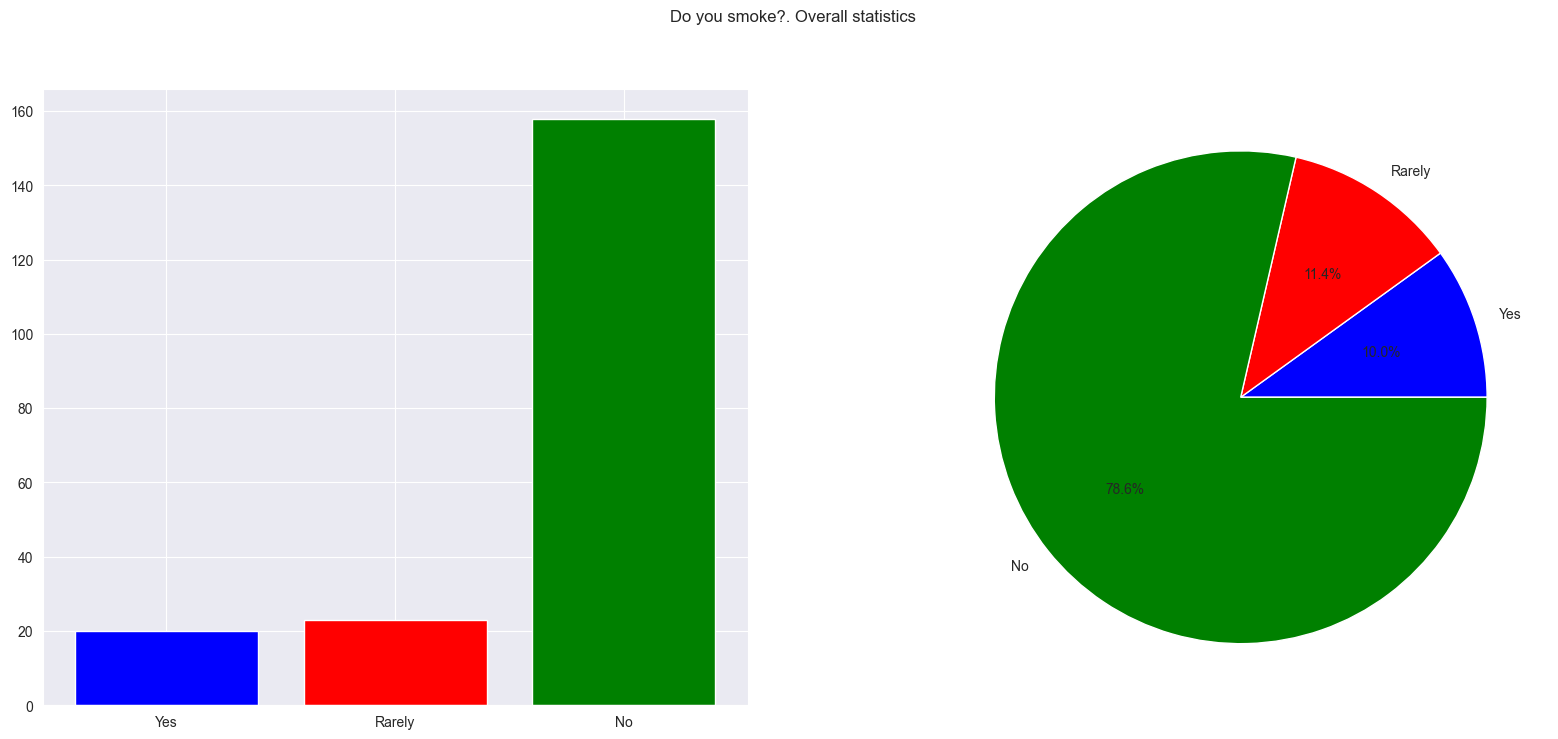

In [68]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.bar(options, answers_q10['option'].value_counts().sort_index(), color=['blue', 'red', 'green'])
plt.suptitle("Do you smoke?. Overall statistics")

plt.subplot(122)
plt.pie(answers_q10['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'red', 'green'])

plt.show()

Как видно из графиков, большинство студентов не курит. Вспоминая статистику, связанную с употреблением алкоголя, можно сделать вывод, что студенты в целом заботятся о своём здоровье.

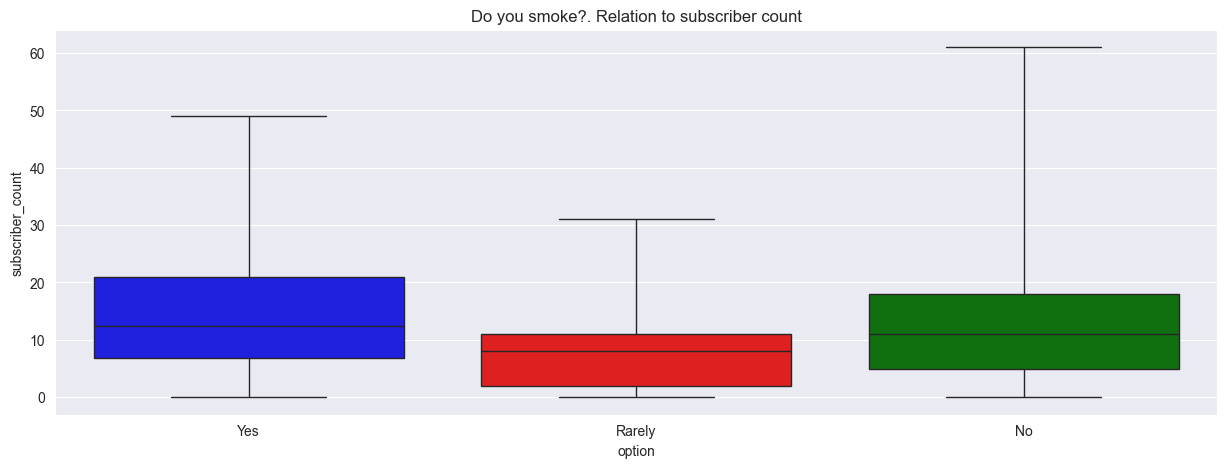

In [69]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='option', y='subscriber_count', data=answers_q10, whis=np.inf,
            palette={'0': 'blue', '1': 'red', '2': 'green'})
plt.gca().set_xticklabels(options)
plt.title("Do you smoke?. Relation to subscriber count")

plt.show()

Среди студентов, которые <b>курят</b>, медианное значение подписчиков чуточку больше, чем у тех, кто не курит. Довольно странный момент, но, так как курение не единственный фактор, влияющий на популярность, выводы будут сделаны позже.

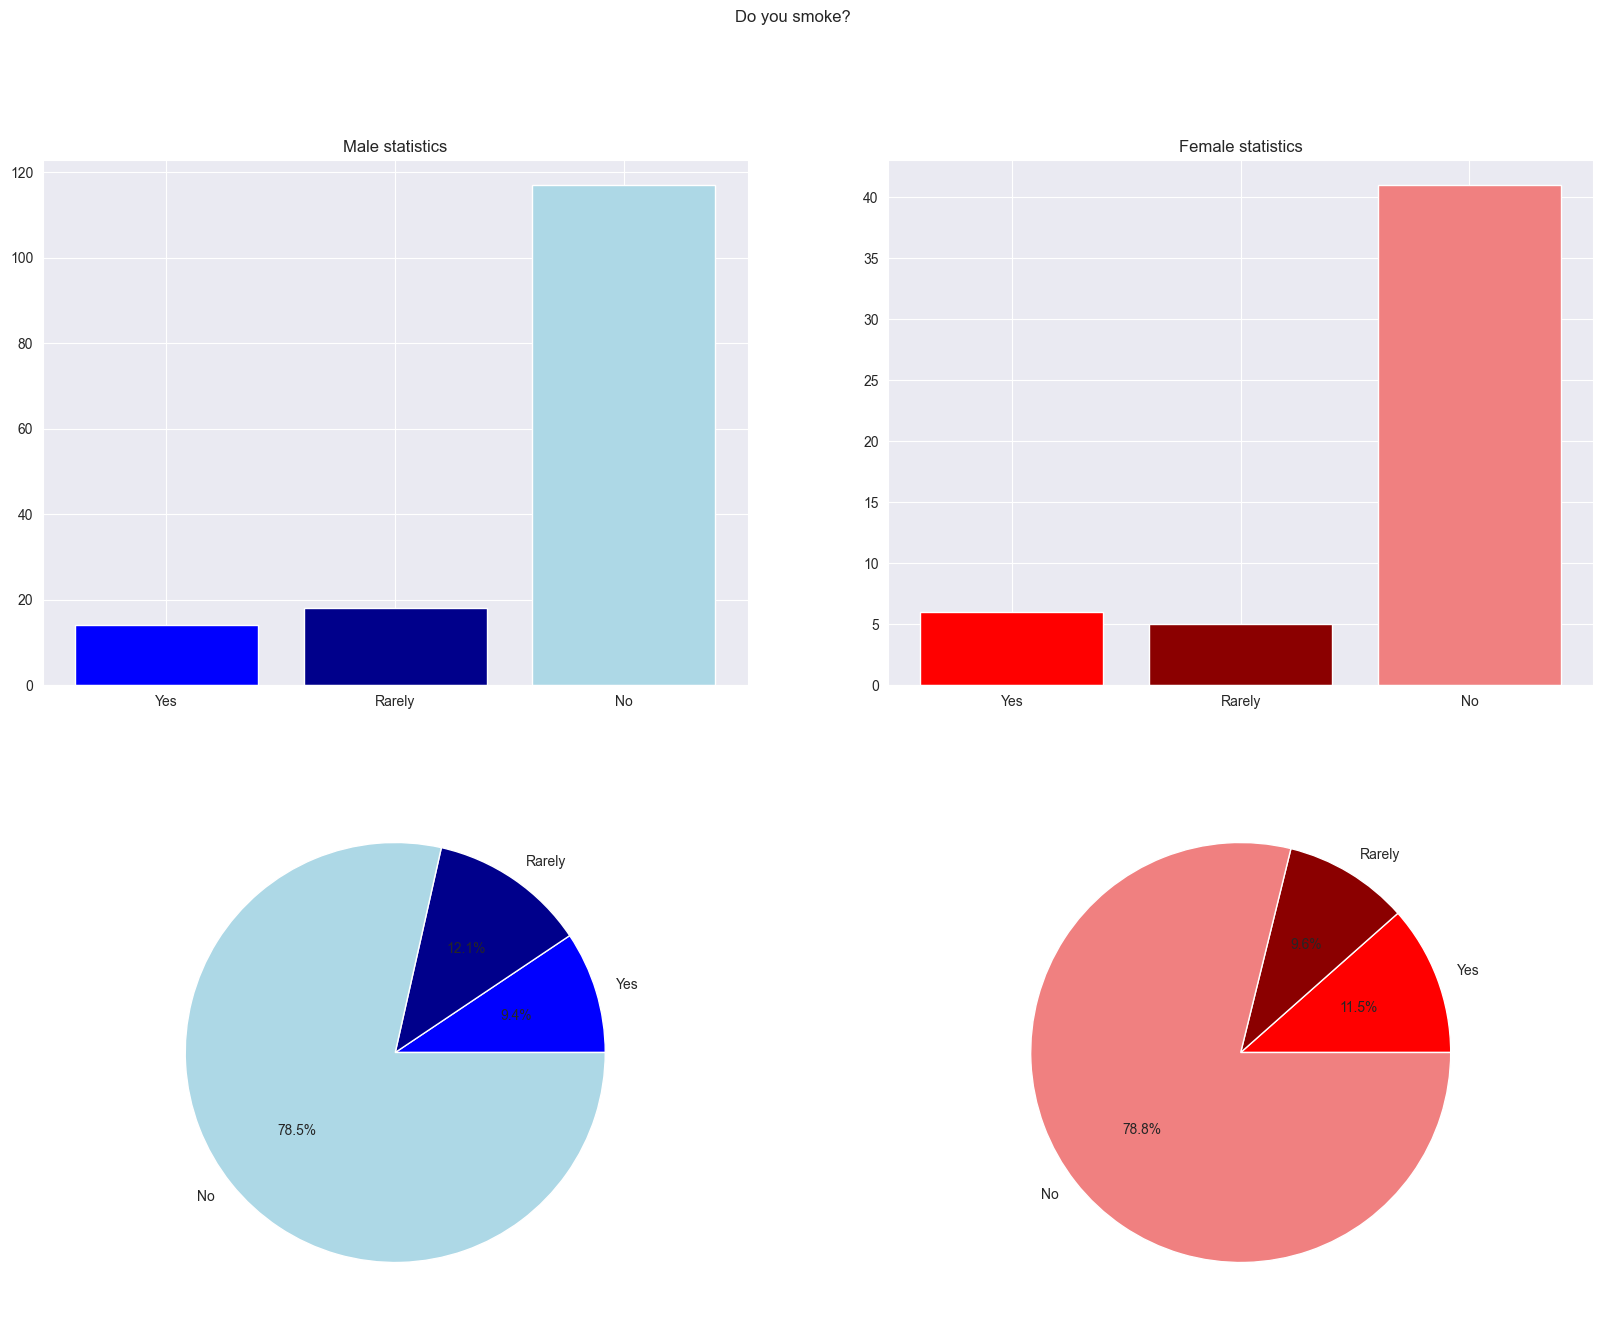

In [70]:
plt.figure(figsize=(20, 15))
plt.suptitle("Do you smoke?")
plt.subplot(221)
plt.bar(options,
        answers_q10['option'][answers_q10.gender == 'male'].value_counts().sort_index(),
        color=['blue', 'darkblue', 'lightblue'])
plt.title('Male statistics')

plt.subplot(222)
plt.bar(options,
        answers_q10['option'][answers_q10.gender == 'female'].value_counts().sort_index(),
        color=['red', 'darkred', 'lightcoral'])
plt.title('Female statistics')

plt.subplot(223)
plt.pie(answers_q10['option'][answers_q10.gender == 'male'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['blue', 'darkblue', 'lightblue'])

plt.subplot(224)
plt.pie(answers_q10['option'][answers_q10.gender == 'female'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['red', 'darkred', 'lightcoral'])

plt.show()

Заметим, что статистика как для парней, так и для девушек, почти что одинакова. 

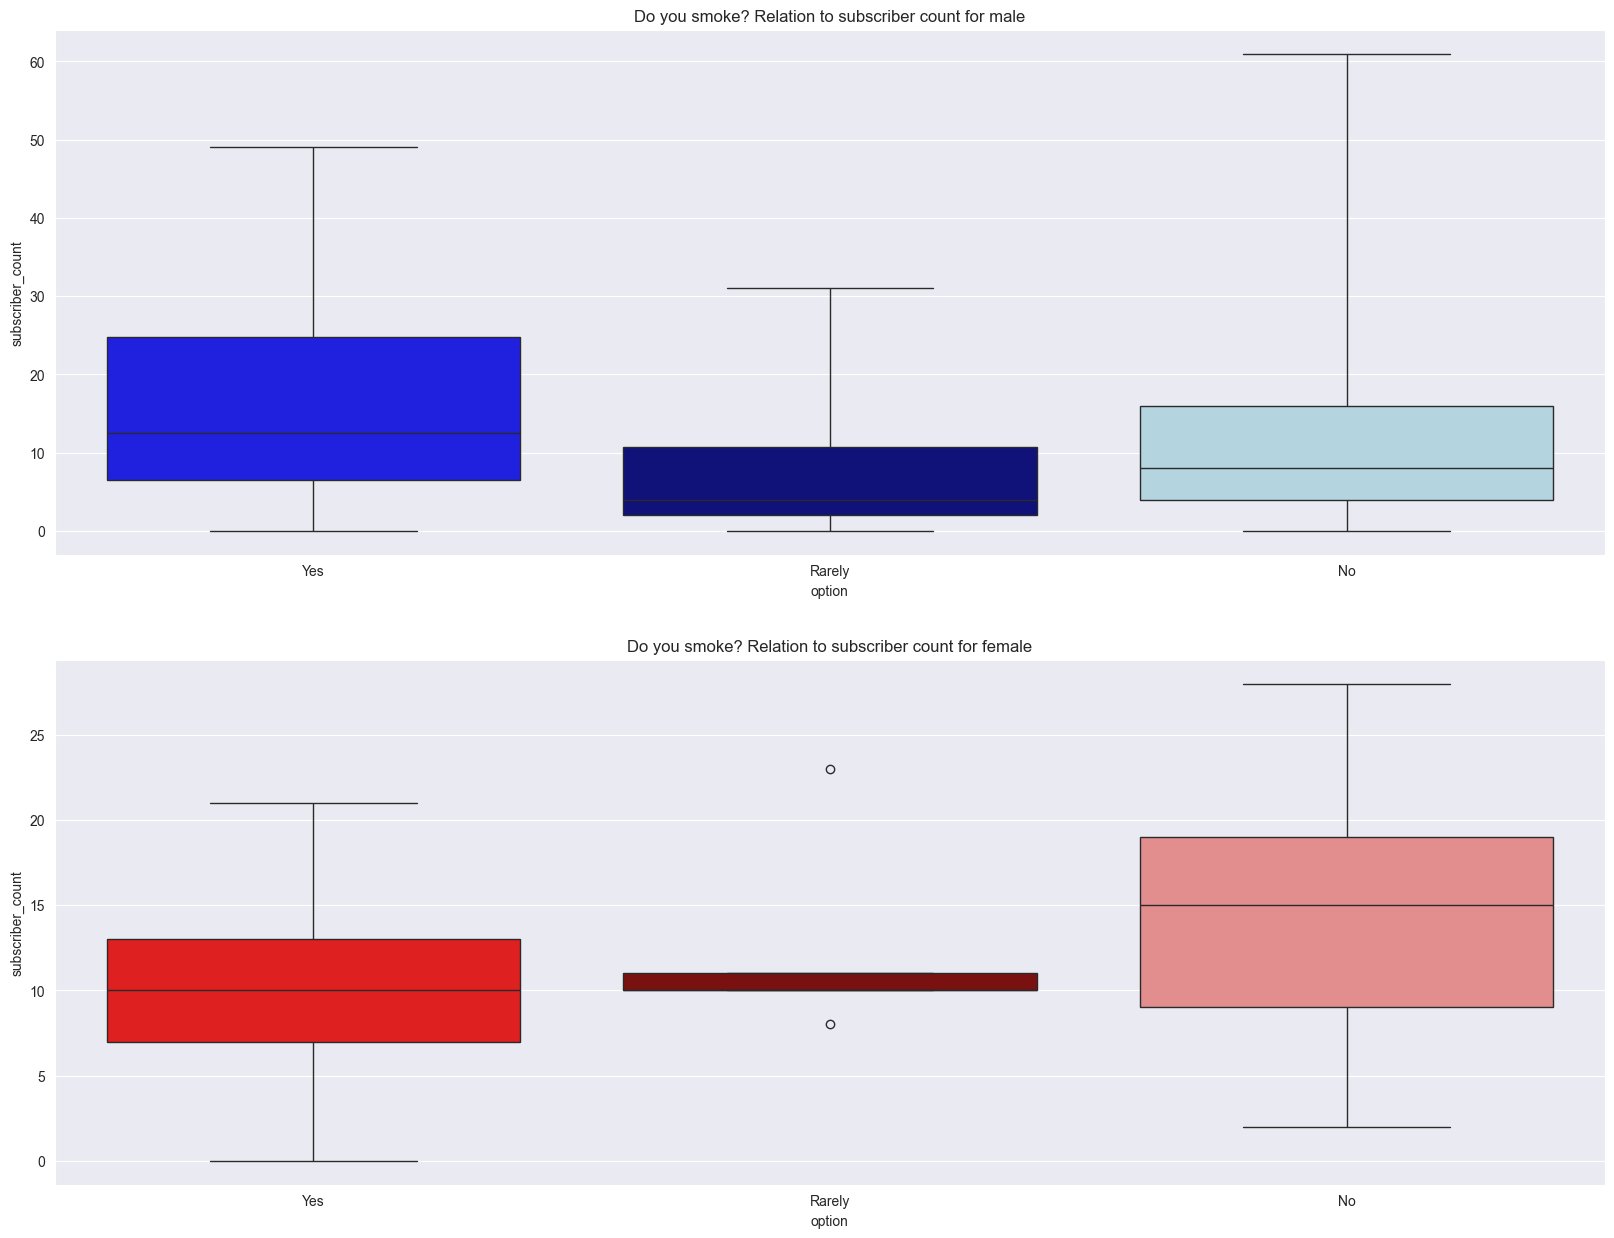

In [71]:
plt.figure(figsize=(20, 15))
plt.subplot(211)
sns.boxplot(x='option', y='subscriber_count', whis=np.inf,
            data=answers_q10[answers_q10.gender == 'male'],
            palette={'0': 'blue', '1': 'darkblue', '2': 'lightblue'})
plt.gca().set_xticklabels(options)
plt.title('Do you smoke? Relation to subscriber count for male')

plt.subplot(212)
sns.boxplot(x='option', y='subscriber_count',
            data=answers_q10[answers_q10.gender == 'female'],
            palette={'0': 'red', '1': 'darkred', '2': 'lightcoral'})
plt.gca().set_xticklabels(options)
plt.title('Do you smoke? Relation to subscriber count for female')

plt.show()

В общем, медианное значение подписчиков у курящих мальчиков больше, чем у некурящих. У девушек же ситуация обратная. Кроме того, сразу выделяется женская диаграмма для опции 1 (Rarely). Посмотрим, что скрывается за этими данными.


In [72]:
ids = answers_q10[(answers_q10.option == 1) & (answers_q10.gender == 'female')].respondent_id.tolist()

participants[participants.id.isin(ids)]

,id,created_at,gender,subscriber_count,subscriber_ids,subscription_count,subscription_ids,viewed_count,viewed_ids,views,roommate_ids
54,55,11,female,10,"[102, 85, 67, 24, 177, 11, 90, 29, 166]",24,"[215, 85, 67, 62, 32, 155, 158, 102, 90, 12, 8...",45,"[215, 35, 85, 67, 62, 32, 155, 158, 102, 219, ...",41,"[211, 177, 123]"
66,67,12,female,23,"[35, 85, 215, 102, 155, 12, 16, 164, 48, 181, ...",37,"[215, 35, 85, 155, 219, 108, 82, 123, 186, 16,...",57,"[215, 35, 85, 62, 32, 155, 158, 102, 219, 12, ...",82,"[164, 29, 48]"
105,106,12,female,11,"[74, 67, 11, 85, 48, 90, 29, 166, 123]",15,"[215, 85, 67, 62, 155, 158, 82, 15, 74, 123, 1...",35,"[215, 35, 85, 67, 62, 32, 155, 158, 102, 219, ...",49,"[154, 186, 74]"
141,142,11,female,8,"[22, 67, 29, 166, 21, 48]",14,"[215, 35, 85, 62, 32, 158, 102, 219, 82, 15, 7...",27,"[215, 35, 85, 67, 62, 32, 155, 158, 102, 219, ...",50,"[209, 90, 21]"
147,148,12,female,10,"[67, 22, 208, 29, 166, 164, 48]",8,"[215, 35, 67, 62, 90, 22, 108, 186]",20,"[215, 35, 85, 67, 62, 32, 155, 158, 102, 219, ...",45,"[22, 144, 135]"


Интересно, что среди подписчиков и подписок взаимодействуют между собой все. Например, девушка с id = 67 подписана на всех остальных студенток, которые курят. Однако никто из пятерых не живёт вместе, судя по итоговому распределению.

## 11. How do you feel about noise?

In [73]:
answers_q11 = answers[answers.id == 11]
answers_q11 = answers_q11[~answers_q11.respondent_id.isin(lst)]

answers_q11

,id,question,options,respondent_id,option,gender,subscriber_count,views
10,11,How do you feel about noise?,"['Good, I like to listen to loud music and tal...",1,1,male,30,175
10,11,How do you feel about noise?,"['Good, I like to listen to loud music and tal...",2,2,male,20,116
10,11,How do you feel about noise?,"['Good, I like to listen to loud music and tal...",3,2,female,15,54
10,11,How do you feel about noise?,"['Good, I like to listen to loud music and tal...",4,2,female,7,36
10,11,How do you feel about noise?,"['Good, I like to listen to loud music and tal...",5,1,male,2,9
...,...,...,...,...,...,...,...,...
10,11,How do you feel about noise?,"['Good, I like to listen to loud music and tal...",216,0,male,6,56
10,11,How do you feel about noise?,"['Good, I like to listen to loud music and tal...",217,0,male,5,39
10,11,How do you feel about noise?,"['Good, I like to listen to loud music and tal...",218,1,male,12,33
10,11,How do you feel about noise?,"['Good, I like to listen to loud music and tal...",219,1,female,26,77


In [74]:
options = literal_eval(answers_q11['options'].iloc[0])

options

['Good, I like to listen to loud music and talk loudly',
 'Neutral, I can live in any conditions',
 "I don't like noise, I try to be in quiet most of the time"]

In [75]:
answers_q11['option'].value_counts().sort_index()

option
0     15
1    109
2     77
Name: count, dtype: int64

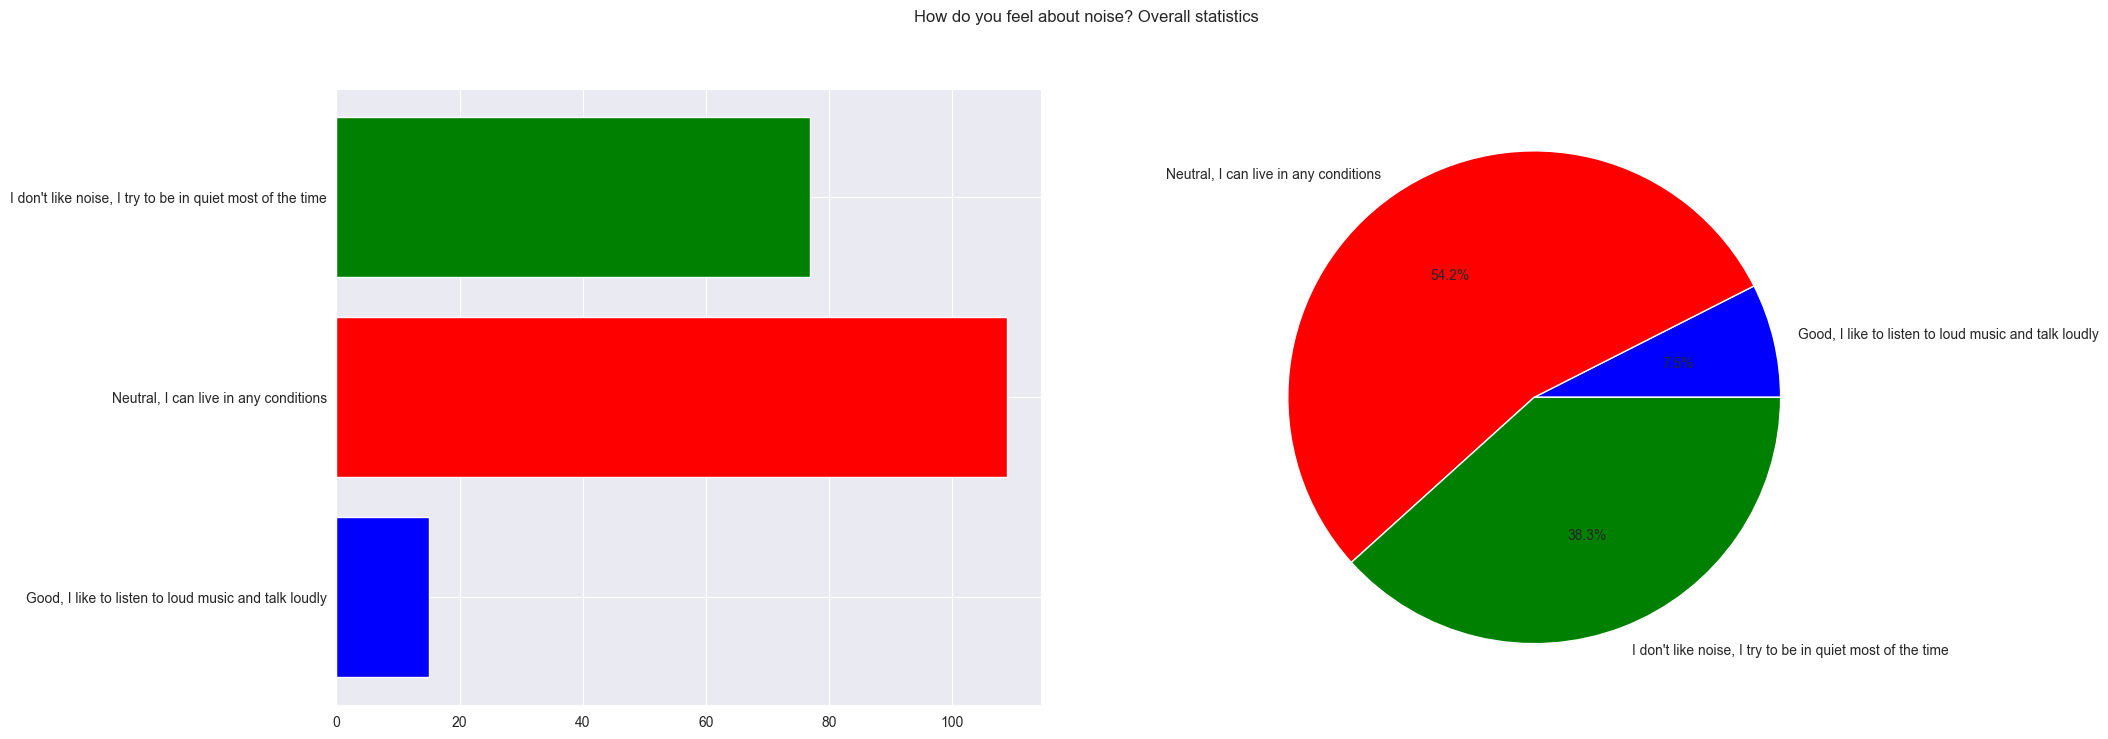

In [76]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.barh(options, answers_q11['option'].value_counts().sort_index(), color=['blue', 'red', 'green'])
plt.suptitle("How do you feel about noise? Overall statistics")

plt.subplot(122)
plt.pie(answers_q11['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'red', 'green'])

plt.show()

Значительную часть студентов составляют те, кто-либо умеет адаптироваться, либо не переносит шум.

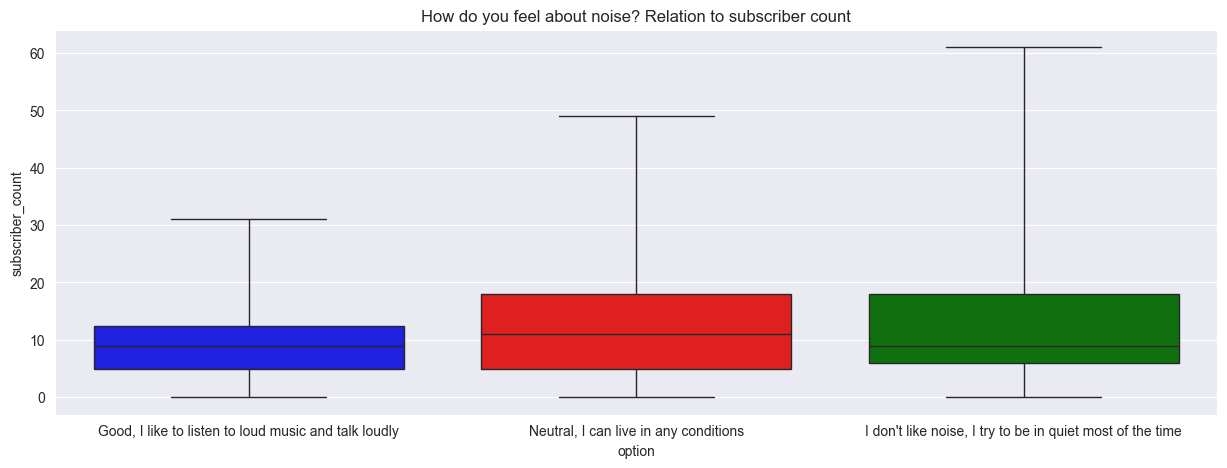

In [77]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='option', y='subscriber_count', data=answers_q11, whis=np.inf,
            palette={'0': 'blue', '1': 'red', '2': 'green'})
plt.gca().set_xticklabels(options)
plt.title("How do you feel about noise? Relation to subscriber count")

plt.show()

Здесь видно, что медианные значения примерно равны.

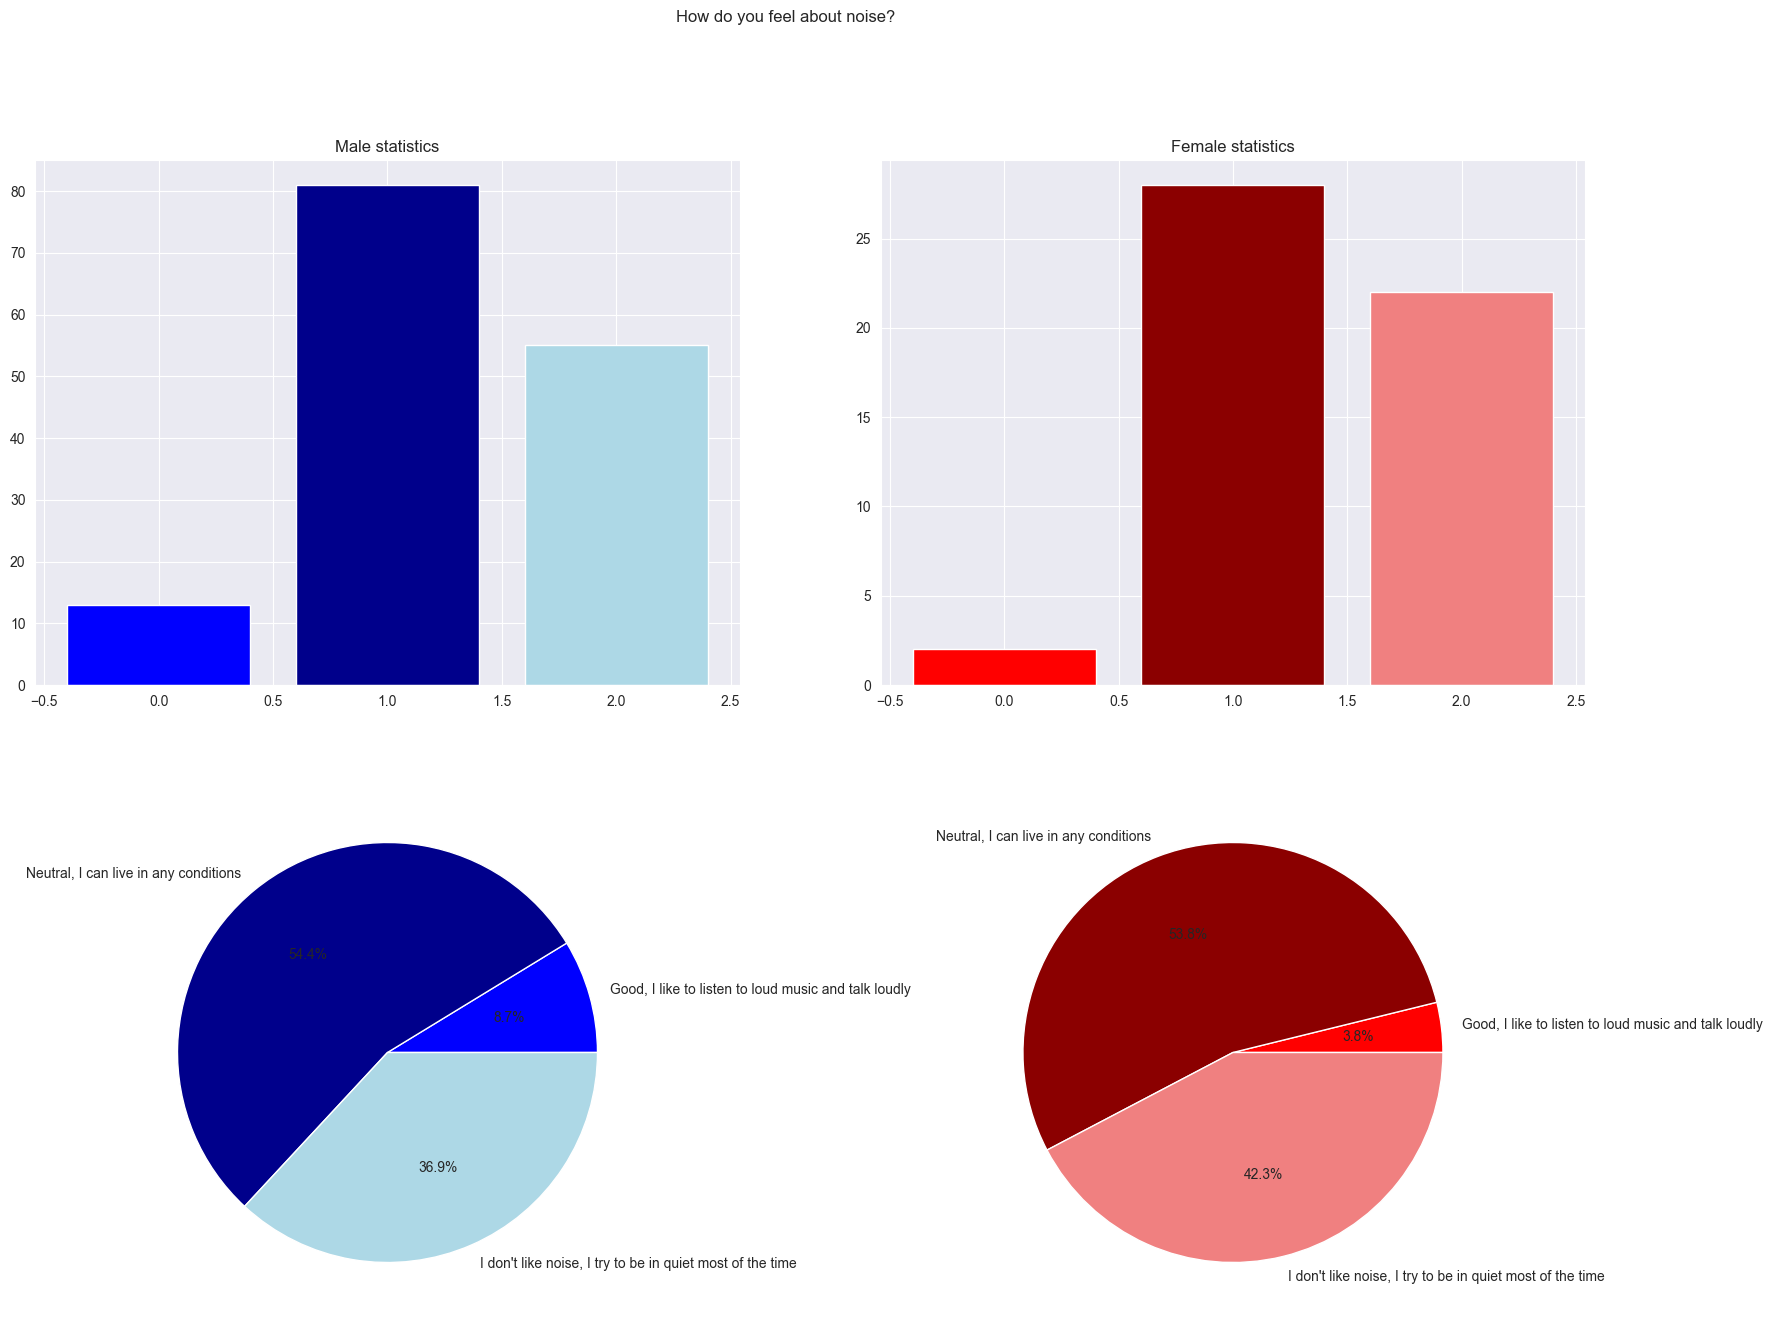

In [78]:
plt.figure(figsize=(20, 15))
plt.suptitle("How do you feel about noise?")
plt.subplot(221)
plt.bar(answers_q11['option'][answers_q11.gender == 'male'].value_counts().sort_index().index,
        answers_q11['option'][answers_q11.gender == 'male'].value_counts().sort_index(),
        color=['blue', 'darkblue', 'lightblue'])
plt.title('Male statistics')

plt.subplot(222)
plt.bar(answers_q11['option'][answers_q11.gender == 'female'].value_counts().sort_index().index,
        answers_q11['option'][answers_q11.gender == 'female'].value_counts().sort_index(),
        color=['red', 'darkred', 'lightcoral'])
plt.title('Female statistics')

plt.subplot(223)
plt.pie(answers_q11['option'][answers_q11.gender == 'male'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['blue', 'darkblue', 'lightblue'])

plt.subplot(224)
plt.pie(answers_q11['option'][answers_q11.gender == 'female'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['red', 'darkred', 'lightcoral'])

plt.show()

Среди парней и девушек примерно одинаковое распределение по ответам.

## 12. I'd like a roommate...

In [79]:
answers_q12 = answers[answers.id == 12]

answers_q12

,id,question,options,respondent_id,option,gender,subscriber_count,views
11,12,I'd like to have a roommate...,"['Who speaks russian', 'A foreigner speaker']",1,0,male,30,175
11,12,I'd like to have a roommate...,"['Who speaks russian', 'A foreigner speaker']",2,0,male,20,116
11,12,I'd like to have a roommate...,"['Who speaks russian', 'A foreigner speaker']",3,0,female,15,54
11,12,I'd like to have a roommate...,"['Who speaks russian', 'A foreigner speaker']",4,0,female,7,36
11,12,I'd like to have a roommate...,"['Who speaks russian', 'A foreigner speaker']",5,0,male,2,9
...,...,...,...,...,...,...,...,...
11,12,I'd like to have a roommate...,"['Who speaks russian', 'A foreigner speaker']",216,0,male,6,56
11,12,I'd like to have a roommate...,"['Who speaks russian', 'A foreigner speaker']",217,0,male,5,39
11,12,I'd like to have a roommate...,"['Who speaks russian', 'A foreigner speaker']",218,0,male,12,33
11,12,I'd like to have a roommate...,"['Who speaks russian', 'A foreigner speaker']",219,0,female,26,77


In [80]:
options = literal_eval(answers_q12['options'].iloc[0])

options

['Who speaks russian', 'A foreigner speaker']

In [81]:
len(answers_q12.respondent_id.unique())

201

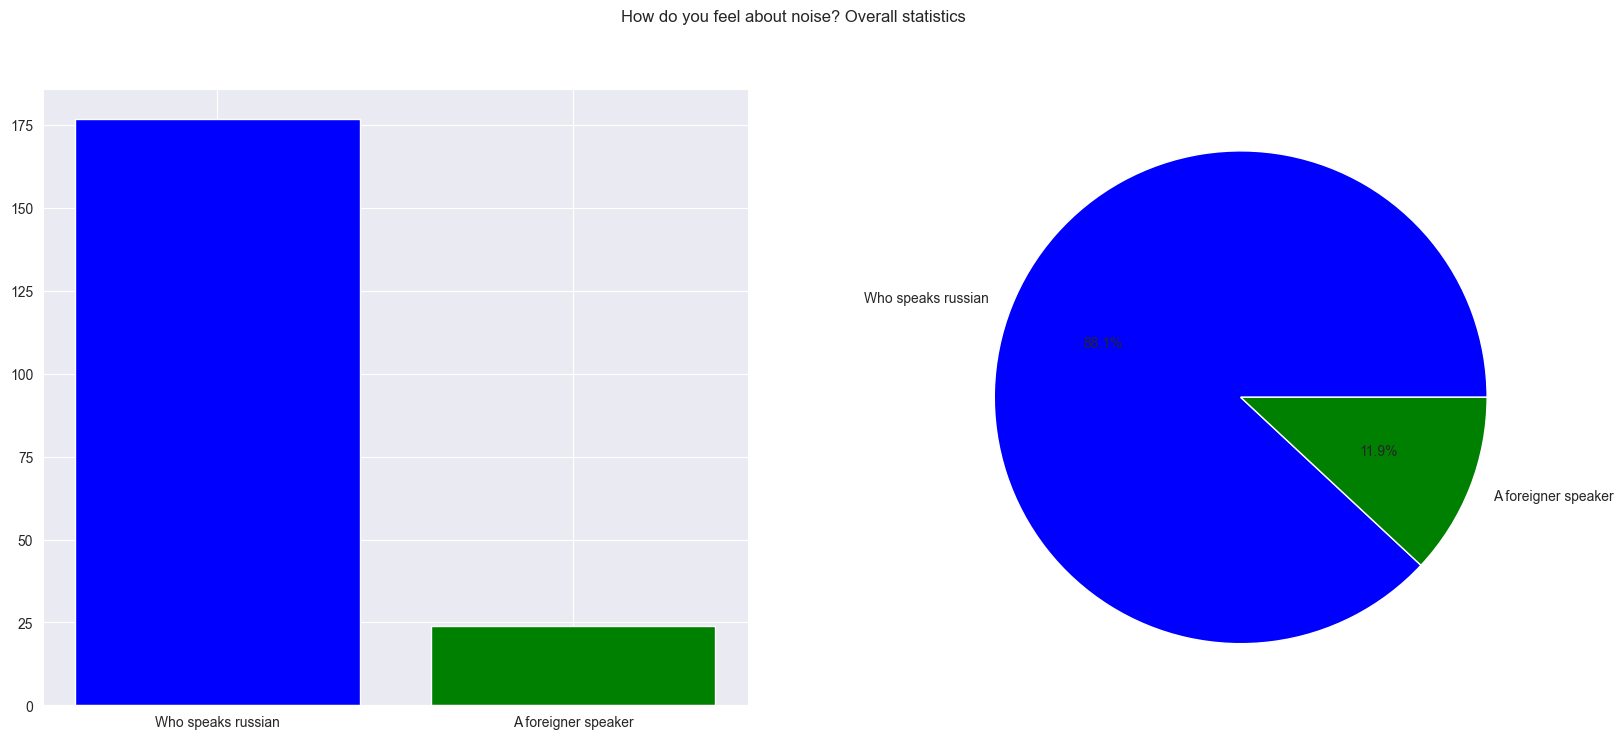

In [82]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.bar(options, answers_q12['option'].value_counts().sort_index(), color=['blue', 'green'])
plt.suptitle("How do you feel about noise? Overall statistics")

plt.subplot(122)
plt.pie(answers_q12['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'green'])

plt.show()

Вопрос 6 уже дал достаточно подробный анализ по данной теме. Однако тут встаёт немного другой вопрос: а хочет ли студен жить с иностранно говорящим.

In [83]:
option_0_ids_12 = answers_q12[answers_q12.option == 0].respondent_id.tolist()
option_1_ids_12 = answers_q12[answers_q12.option == 1].respondent_id.tolist()

print(
    f'Number of Russian speaker students who wants to have Russian speaker roommates: {len(participants[participants.id.isin(option_0_ids_12) & participants.id.isin(option_0_ids)])}')
print(
    f'Number of Russian speaker students who wants to have English or other language speaker roommates: {len(participants[participants.id.isin(option_1_ids_12) & participants.id.isin(option_0_ids)])}')
print(
    f'Number of English or other language speaker students who wants Russian speaker roommates: {len(participants[participants.id.isin(option_0_ids_12) & participants.id.isin(option_1_ids)]) + len(participants[participants.id.isin(option_0_ids_12) & participants.id.isin(option_2_ids)])}')
print(
    f'Number of English or other language speaker students who wants also English speaker roommates: {len(participants[participants.id.isin(option_1_ids_12) & participants.id.isin(option_1_ids)]) + len(participants[participants.id.isin(option_1_ids_12) & participants.id.isin(option_2_ids)])}')

Number of Russian speaker students who wants to have Russian speaker roommates: 173
Number of Russian speaker students who wants to have English or other language speaker roommates: 21
Number of English or other language speaker students who wants Russian speaker roommates: 4
Number of English or other language speaker students who wants also English speaker roommates: 3


Проанализировав данный вопрос, мы уже можем сделать более чёткие выводы насчёт гипотезы, что иностранных студентов следует селить вместе. Как видно из чисел выше, 4/7 иностранных студентов хотят жить с носителями русского языка. 

p.s: на мой чисто субъективный взгляд, вопросы про язык должны быть ведущими при распределении по комнатам. С другими странностями соседей можно свыкнуться, однако не все хотят жить с иностранными студентами.

## 13. Comfortable temperature

In [84]:
answers_q13 = answers[answers.id == 13]
answers_q13 = answers_q13[~answers_q13.respondent_id.isin(lst)]

answers_q13

,id,question,options,respondent_id,option,gender,subscriber_count,views
12,13,Comfortable temperature,"['I like it cool, air it out a lot', 'I like t...",1,1,male,30,175
12,13,Comfortable temperature,"['I like it cool, air it out a lot', 'I like t...",2,1,male,20,116
12,13,Comfortable temperature,"['I like it cool, air it out a lot', 'I like t...",3,0,female,15,54
12,13,Comfortable temperature,"['I like it cool, air it out a lot', 'I like t...",4,0,female,7,36
12,13,Comfortable temperature,"['I like it cool, air it out a lot', 'I like t...",5,1,male,2,9
...,...,...,...,...,...,...,...,...
12,13,Comfortable temperature,"['I like it cool, air it out a lot', 'I like t...",216,0,male,6,56
12,13,Comfortable temperature,"['I like it cool, air it out a lot', 'I like t...",217,0,male,5,39
12,13,Comfortable temperature,"['I like it cool, air it out a lot', 'I like t...",218,0,male,12,33
12,13,Comfortable temperature,"['I like it cool, air it out a lot', 'I like t...",219,1,female,26,77


In [85]:
options = literal_eval(answers_q13['options'].iloc[0])

options

['I like it cool, air it out a lot',
 'I like the warmth and fresh air',
 'The warmer the better']

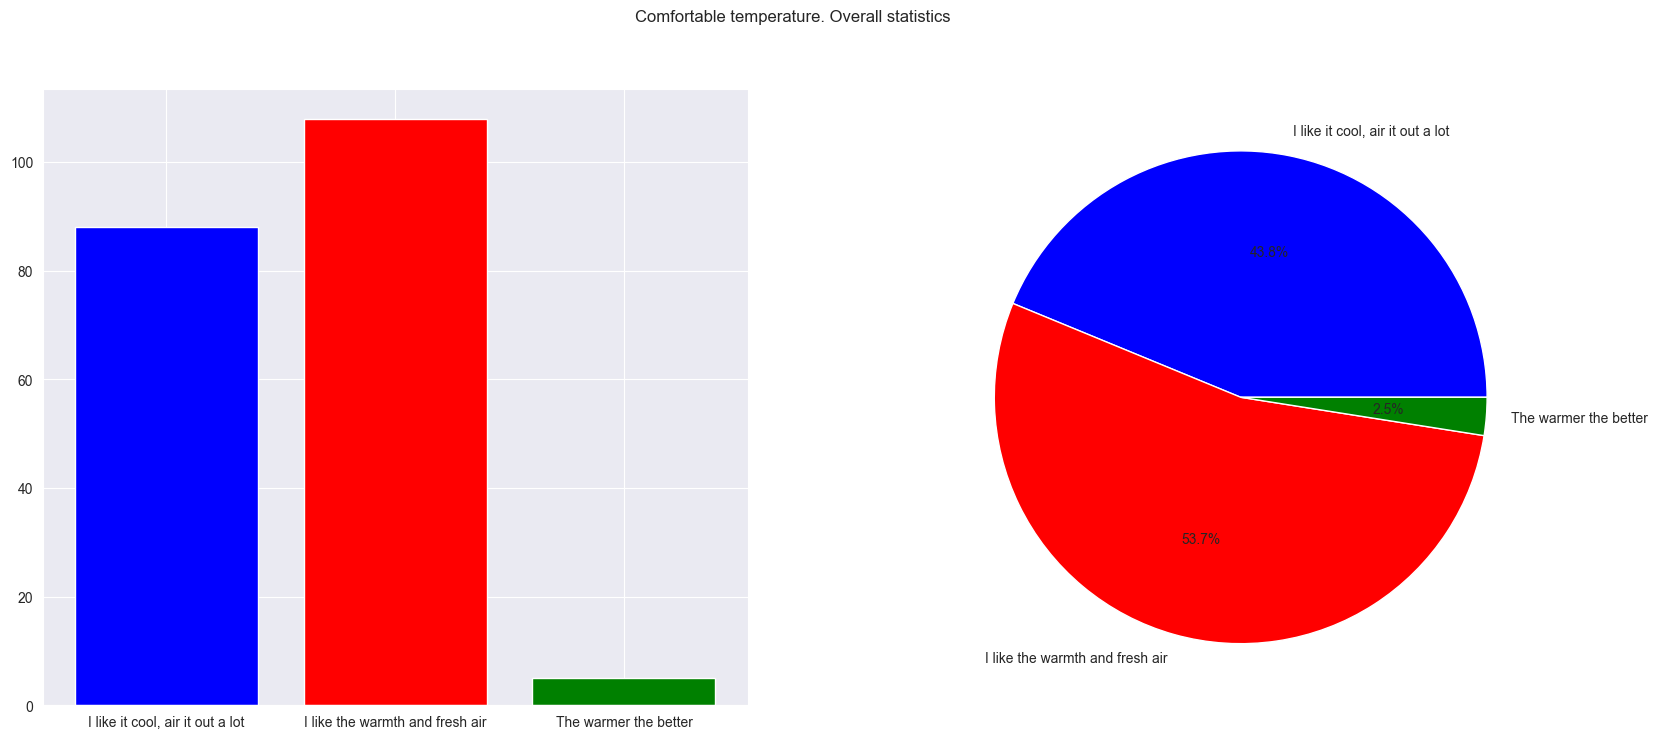

In [86]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.bar(options, answers_q13['option'].value_counts().sort_index(), color=['blue', 'red', 'green'])
plt.suptitle("Comfortable temperature. Overall statistics")

plt.subplot(122)
plt.pie(answers_q13['option'].value_counts().sort_index(), labels=options, autopct='%1.1f%%',
        colors=['blue', 'red', 'green'])

plt.show()

Почти половина студентов предпочитает, когда в комнате тепло и свежо. Еще одна существенная часть предпочитает, когда в комнате прохладно. Меньшинство составляют студенты, любящие тепло.

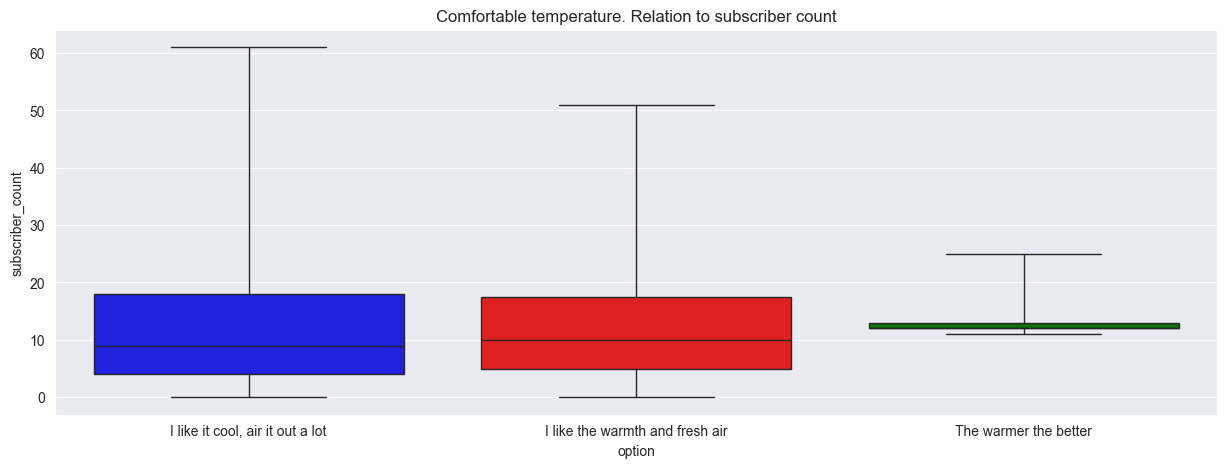

In [87]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='option', y='subscriber_count', data=answers_q13, whis=np.inf,
            palette={'0': 'blue', '1': 'red', '2': 'green'})
plt.gca().set_xticklabels(options)
plt.title("Comfortable temperature. Relation to subscriber count")

plt.show()

Судя по графику, медианные значения примерно равны. Выделяются лишь люди, которые любят тепло (опция 2). Однако вспомним, что их очень мало, поэтому размах у диаграммы небольшой. 

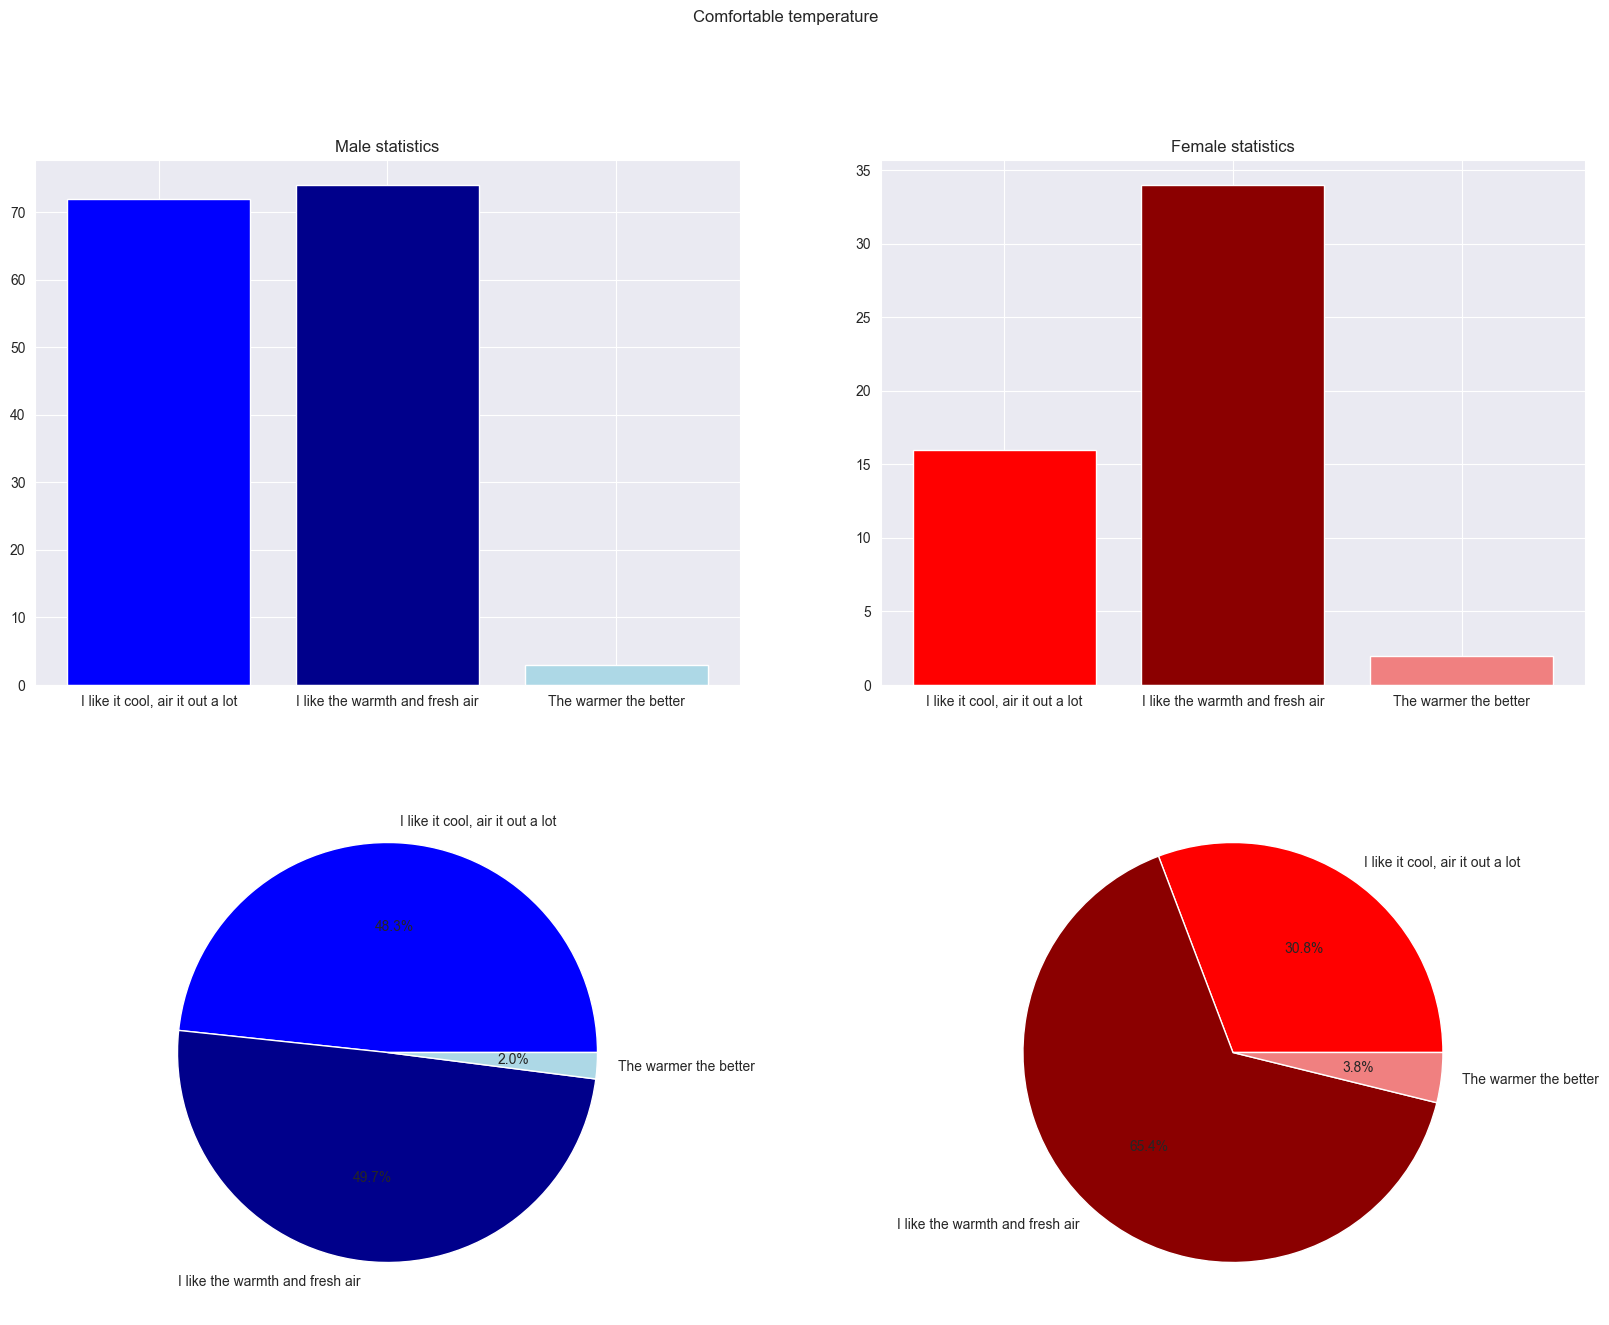

In [88]:
plt.figure(figsize=(20, 15))
plt.suptitle("Comfortable temperature")
plt.subplot(221)
plt.bar(options,
        answers_q13['option'][answers_q13.gender == 'male'].value_counts().sort_index(),
        color=['blue', 'darkblue', 'lightblue'])
plt.title('Male statistics')

plt.subplot(222)
plt.bar(options,
        answers_q13['option'][answers_q13.gender == 'female'].value_counts().sort_index(),
        color=['red', 'darkred', 'lightcoral'])
plt.title('Female statistics')

plt.subplot(223)
plt.pie(answers_q13['option'][answers_q13.gender == 'male'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['blue', 'darkblue', 'lightblue'])

plt.subplot(224)
plt.pie(answers_q13['option'][answers_q13.gender == 'female'].value_counts().sort_index(), labels=options,
        autopct='%1.1f%%', colors=['red', 'darkred', 'lightcoral'])

plt.show()

Распределения по полу довольно разные. Парни предпочитают либо холод, либо просто нормальную температуру. Девушки же в основном не любят холод так же как парни. Тепло же не особо предпочитают оба пола.

# На какие ответы в вопросах студенты обращают большее внимание при выборе соседа?

Для ответа на данный вопрос я возьму топ-25% студентов по количеству подписчиков для каждого пола и посмотрю, какие ответы они дали в анкете. Такой метод поможет оценить, есть ли вопросы, на которые обращают внимание особенно тщательно, и какие в основном студенты популярны среди сверстников. 

In [89]:
# всего мальчиков
len(participants[participants.gender == 'male'])

165

In [90]:
# всего девочек
len(participants[participants.gender == 'female'])

55

In [91]:
participants[participants.gender == 'male'].describe()

,id,created_at,subscriber_count,subscription_count,viewed_count,views
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,114.612121,8.981818,11.412121,10.903030,44.872727,60.830303
std,61.977532,3.951648,12.356981,21.672232,53.301394,51.243991
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,7.000000,2.000000,0.000000,2.000000,21.000000
50%,116.000000,12.000000,8.000000,3.000000,23.000000,46.000000
75%,169.000000,12.000000,15.000000,13.000000,70.000000,92.000000
max,220.000000,12.000000,61.000000,163.000000,178.000000,218.000000


In [92]:
male_top_participants = participants[participants.gender == 'male'].sort_values(by='subscriber_count', ascending=False)[
                        :int(0.25 * len(participants[participants.gender == 'male']))].id.to_list()

female_top_participants = participants[participants.gender == 'female'].sort_values(by='subscriber_count',
                                                                                    ascending=False)[
                          :int(0.25 * len(participants[participants.gender == 'female']))].id.to_list()

print(len(male_top_participants))
print(len(female_top_participants))

41
13


## Мужская статистика

In [93]:
answers[answers.respondent_id.isin(male_top_participants)].describe()

,id,respondent_id,option,subscriber_count,views
count,533.000000,533.000000,533.000000,533.000000,533.000000
mean,7.000000,106.439024,0.831144,29.414634,131.780488
std,3.745172,66.599878,0.812037,10.949076,33.777893
min,1.000000,1.000000,0.000000,16.000000,49.000000
25%,4.000000,53.000000,0.000000,20.000000,108.000000
50%,7.000000,104.000000,1.000000,28.000000,129.000000
75%,10.000000,169.000000,2.000000,33.000000,152.000000
max,13.000000,214.000000,2.000000,61.000000,218.000000


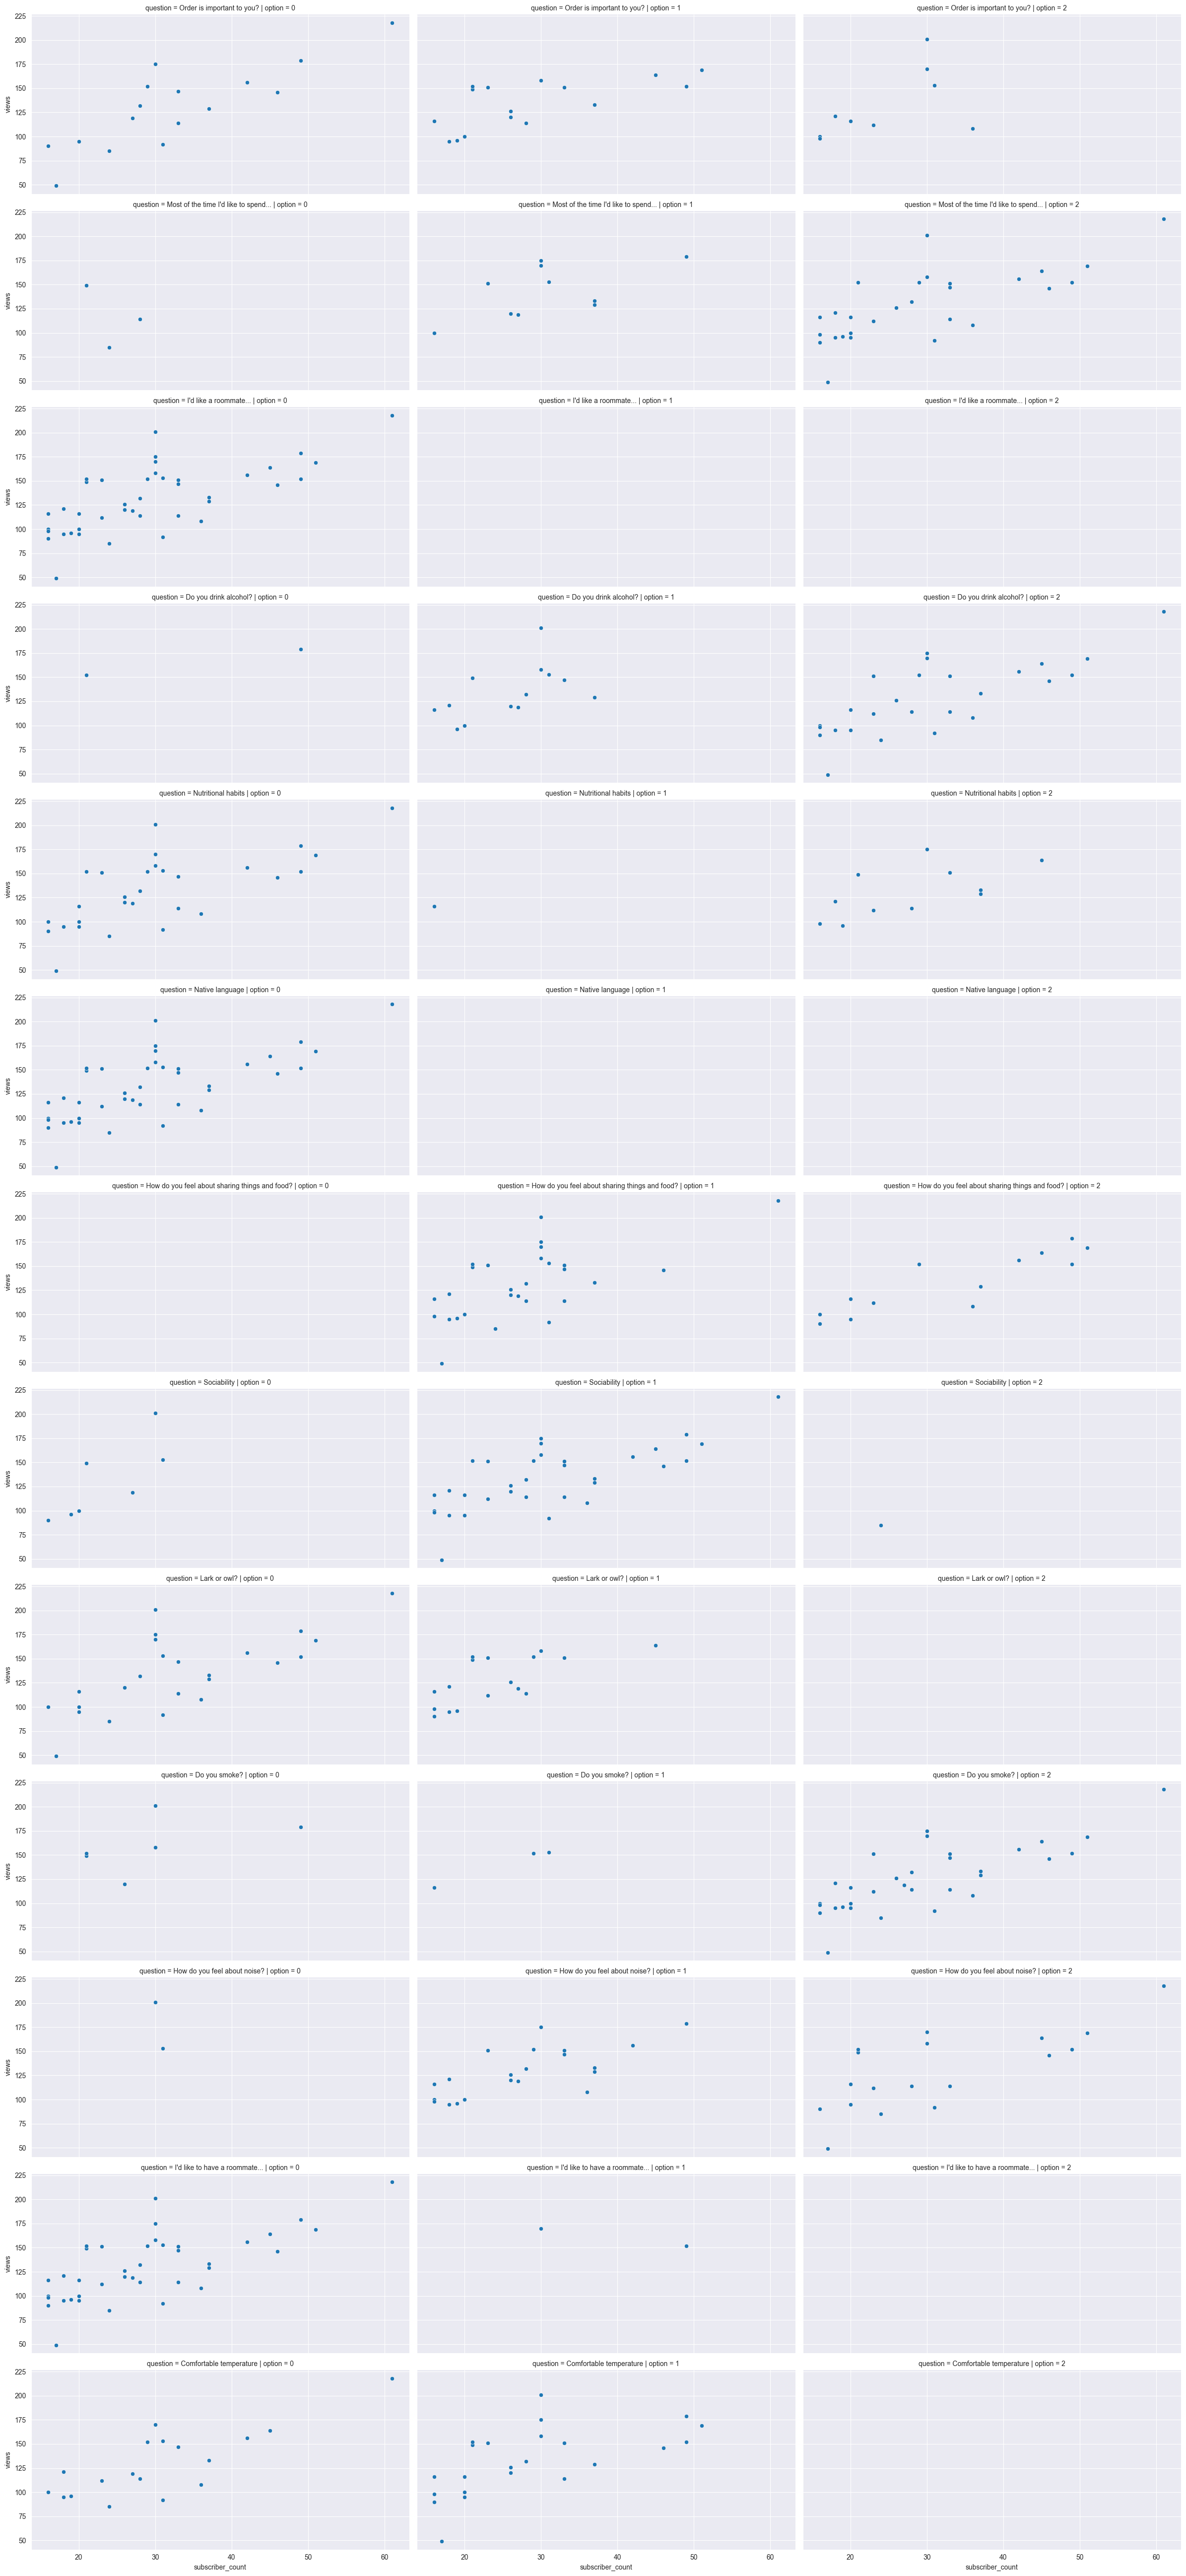

In [94]:
g = sns.FacetGrid(answers[answers.respondent_id.isin(male_top_participants)], col="option", row="question", height=4,
                  aspect=2)
g.map(sns.scatterplot, "subscriber_count", "views")
plt.show()

Благодаря графикам выше, можно провести точный анализ, какие ответы на конкретные вопросы самые популярные.
На графиках опции представлены в виде индексов, поэтому в дальнейших пояснениях я буду напоминать, что они обозначают. Напомню, что для анализа были выбраны 41 студентов, которые набрали самое большое количество подписчиков. Значение количества подписчиков (subscriber_count) линейно зависимо от значения количества просмотров (views), однако пользователи могут несколько раз просматривать анкету, следовательно, оценивать анкеты на основе показателя views было бы неправильным.
    Для анализа я буду рассматривать каждый вопрос отдельно, подчеркивая лишь основную информацию, которую можно выделить из графиков.



1. <b> Order is important to you? </b>
    Основная масса среди популярных студентов всё же выбрала варианты 0 или 1 (Order is a saint thing, Order isn't the most important thing in life). Однако есть и такие, кто выбрал вариант 2 (I can adapt to any conditions). Однако даже в сумме их количество подписчиков будет меньше, чем  двух других категорий. 


2. <b> Most of the time I'd like to spend... </b>
    Здесь значительно популярны студенты, которые выбрали опцию 2 (Depends on mood, I like to be alone and in company). Стоит заметить, что студенты, выбравшие ответ 0 (In privacy, I value personal space where no one is disturbing me) в данной выборке не особо популярны.

3. <b> I’d like a roommate… </b>
    В данном вопросы было лишь два варианта ответа: Similar to my preferences, Opposite to my preferences. Подавляющее большинство студентов выбрало ребят, которые указали ответ 0 (Similar to my preferences), что является логичным.

4. <b> Do you drink alcohol? </b>
    Основываясь на общей статистике, мы сделали вывод, что студенты ведут здоровый образ жизни. Графики выше это подтверждают снова. Количество подписчиков у ребят, которые выбрали опцию 2 (No), намного больше в сумме, чем у тех, кто выбрал другие опции 0 и 1 (Yes, Rarely).

5. <b> Nutritional habits </b>
    Подавляющее большинство выбрало студентов с опциями 0 и 2 (I cook by myself', I'll be ordering take-outs, I'll go to the canteen). Стоит вспомнить, что почти все студенты выбрали в своих анкетах данные ответы тоже.

6. <b> Native language </b>
    Из-за того, что почти 90% студентов - носители руского языка, соответственно они являтся самыми популярными среди всей выборки участников.


7. <b> How do you feel about sharing things and food? </b>
    Суммарно, у студентов, которые выбрали опцию 1 (Positive, ready to buy food and cook together), подписчиков больше, чем у тех, кто выбрал опцию 2 (Doesn't matter, negotiable"). Опцию 0 (Negative, I will only cook for myself) не выбрал никто из людей в рейтинге.

8. <b> Sociability </b>
    Здесь сильно отличаются ребята, которые выбрали опцию 1 (Depends on the mood). По общей статистике, "амбивертов" было довольно много по сравнению с другими двумя категориями (Talking all the time, Talking is not for me'), поэтому такое распределение выглядит весьма естественно.

9. <b> Lark or owl? </b>
    Здесь было всего два варианта ответа (Lark, Owl). Если судить по графику, студенты, у которых больше 40 подписчиков, в основном выбрали опцию 0 (Lark), хотя "сов", по общей статистике, среди участников больше. Вероятней всего, на подписку повлиял один из других одиннадцати вопросов. 

10. <b> Do you smoke? </b>
    Как было сказано ранее, студенты поддерживают здоровый образ жизни (основываясь на конкретных данных). Поэтому не удивительно, что осноная масса популярных студентов выбрала опцию 2 (No). Скорее всего, на студентов, выбравших опцию 0 и 1 (Yes, Rarely), подписывались ребята, которым либо всё равно, либо тоже выбрали данные опции.

11. <b> How do you feel about noise? </b>
    Примерно одинаковое распределение вышло между студентами, которые выбрали опции 1 и 2 (Neutral, I can live in any conditions,
 I don't like noise, I try to be in quiet most of the time). 

12. <b> I'd like a roommate.. </b>
    В целом, ситуация схожая с вопросом 6 про языки. Основная масса студентов предпочитает ребят, которые говорят на русском (опция 0).

13. <b> Comfortable temperature </b>
    Тут те же закономерности, как и в основной статистике: студенты предпочитают опцию 0 или 1 (I like it cool, air it out a lot;
 I like the warmth and fresh air). Ребята ищут похожих людей, поэтому логично, что участники, выбравшие 0 или 1, будут фаворитами.


## Женская статистика 

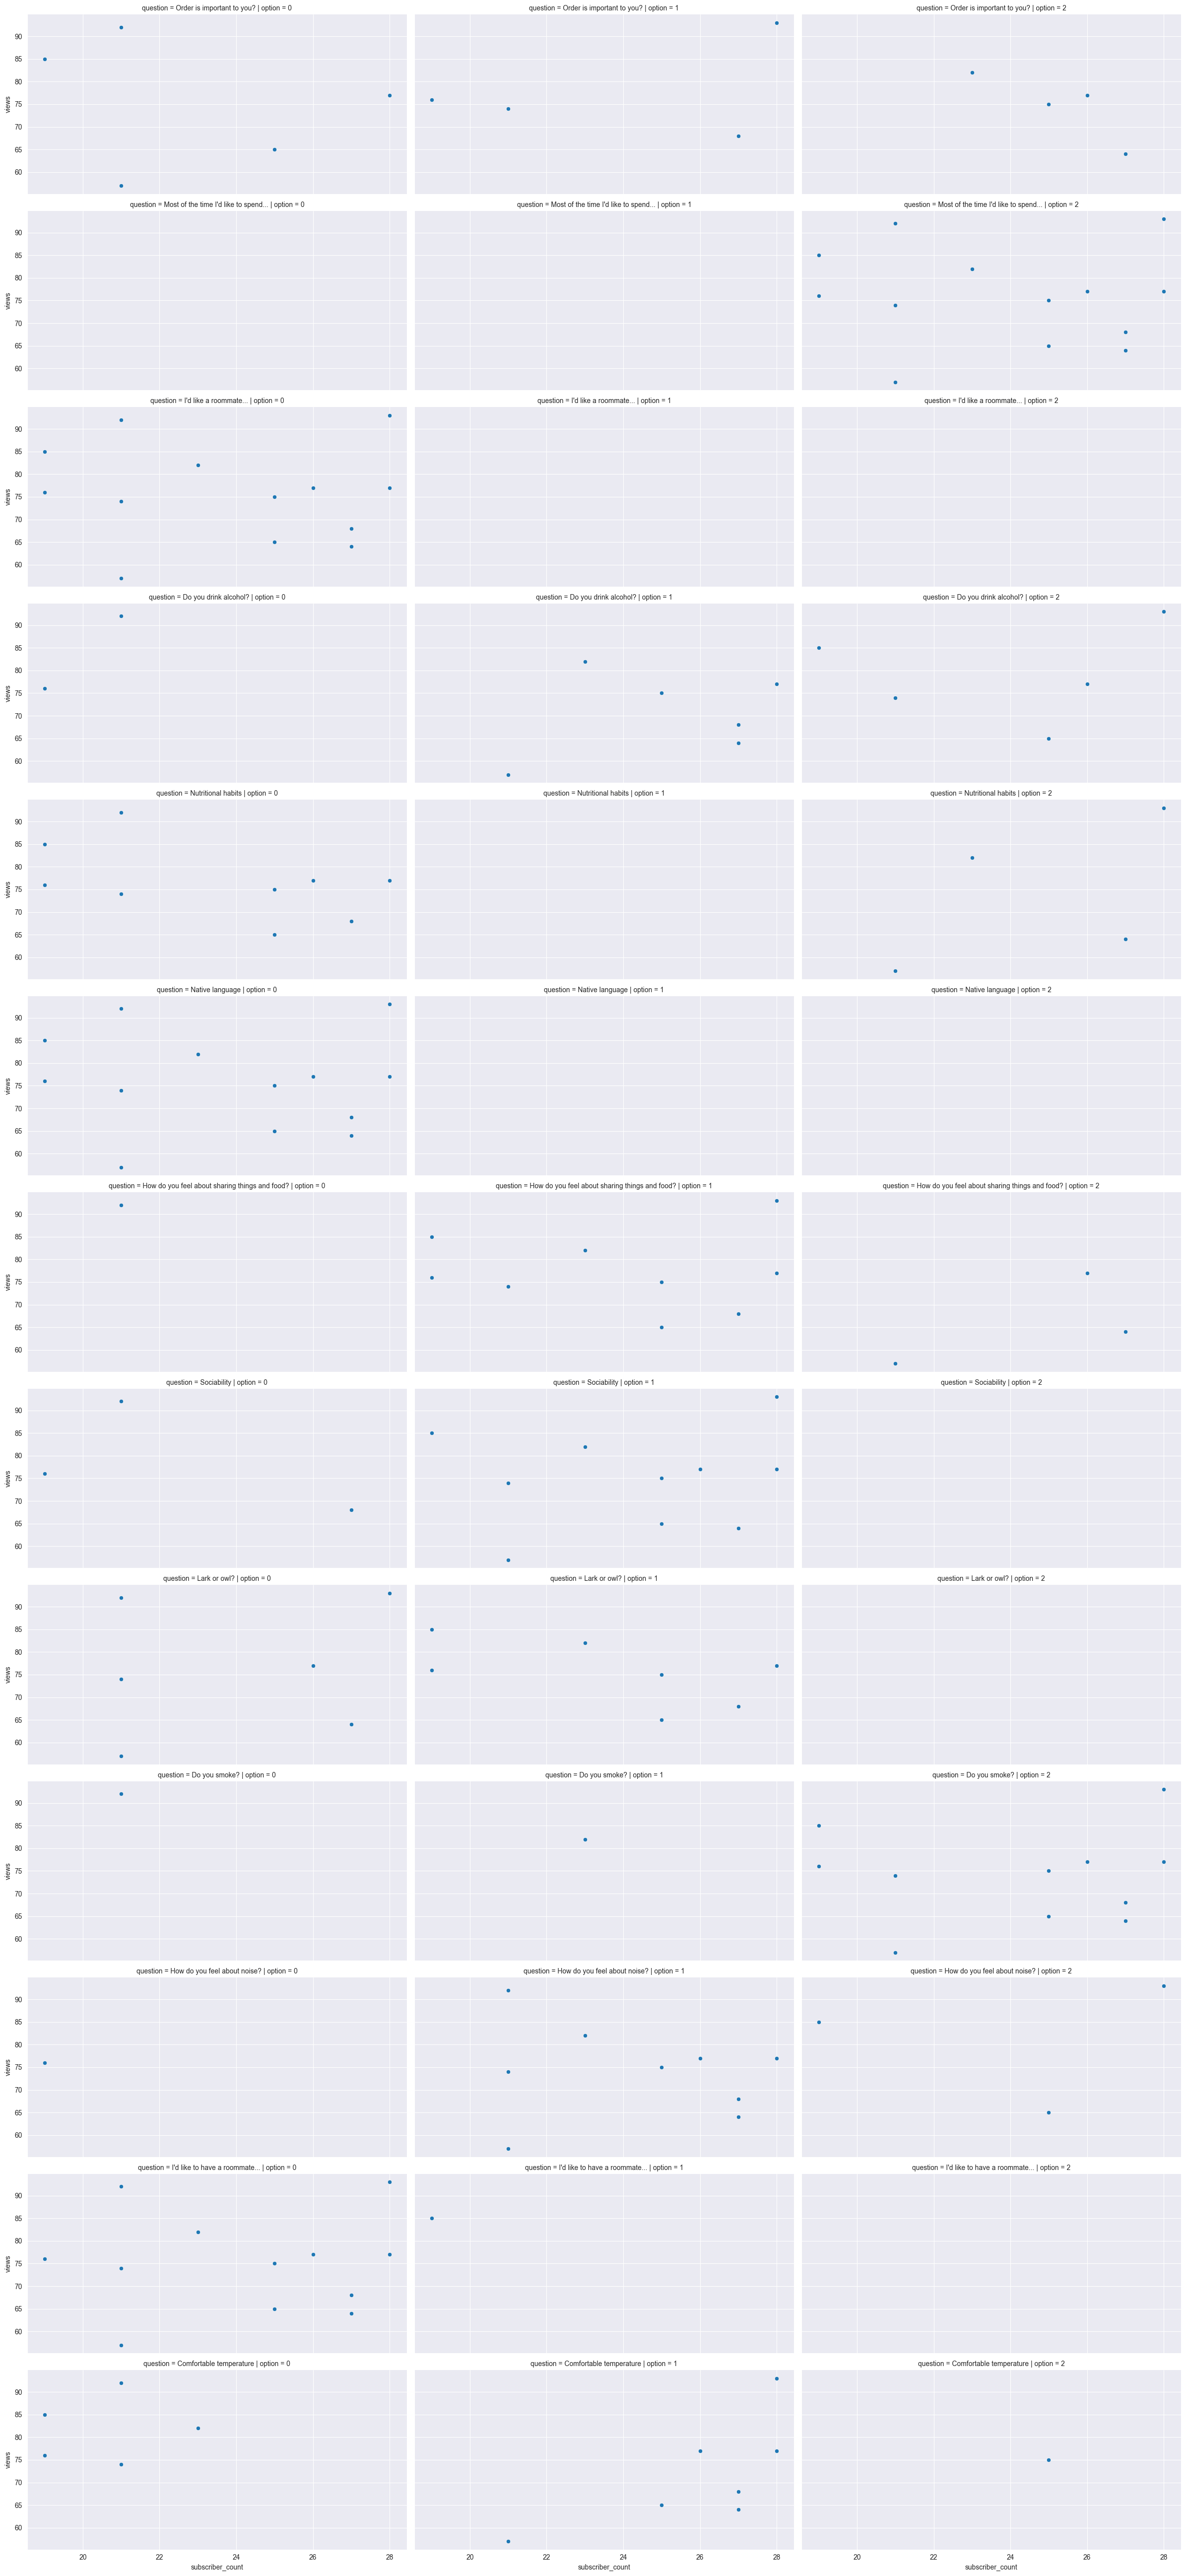

In [95]:
g = sns.FacetGrid(answers[answers.respondent_id.isin(female_top_participants)], col="option", row="question", height=4,
                  aspect=2)
g.map(sns.scatterplot, "subscriber_count", "views")
plt.show()

Если сравнивать графики парней и девушек, то они примерно похожи вплане популярности студентов, которые выбрали те или иные ответы. Однако, весьма странно, что зависимость между подписчиками и просмотрами не линейна. Вероятно, такое происходит, так как девушек значительно меньше, следовательно, выбор тоже меньше, а значит понравившиеся анкеты легко запомнить.

Всего несколько отличий от мужской статистики можно выделить. Во-первых, Среди популярных девушек количество "жаворонок" и "сов" почти что одинаковое. У парней же "жаворонки" преобладали. Во-вторых, если у парней было примерно одинаковое распределение между 1 и 2 опцией для вопроса про шум (How do you feel about noise?), то у девушек значительно выделяются представительницы, которым всё равно, шумят соседи или нет (опция 1. Neutral, I can live in any conditions).

## Выводы о данном разделе

Подводя итог анализа этого вопроса, стоит сказать, что изучение студентов, набравших больше всего подписчиков, даёт возможность узнать, каких именно соседей в основном ищут ребята. Данный анализ отличается от первого раздела, так как там мы рассматривали всех участников и усредняли их количество подписчиков. Здесь же целью было выяснить, студенты с какими характеристиками привлекают ровесников. Само собой, каждый выбор основан на индивидуальных предпочтениях, но выявить основные паттерны было так же необходимо, потому что студенты живут не одни, а в комнатах по четыре человека. 

# Влияние даты присоединения на количество подписчиков
Проводя предыдущие анализы, я выдвинула для себя гипотезу, что студенты, которые создали анкету раньше, имеют большее число подписчиков. Эта гипотеза очень важна, так как может произойти неправильная интерпретация данных. В данном разделе я попробую подтвердить или опровергнуть данную гипотезу. 

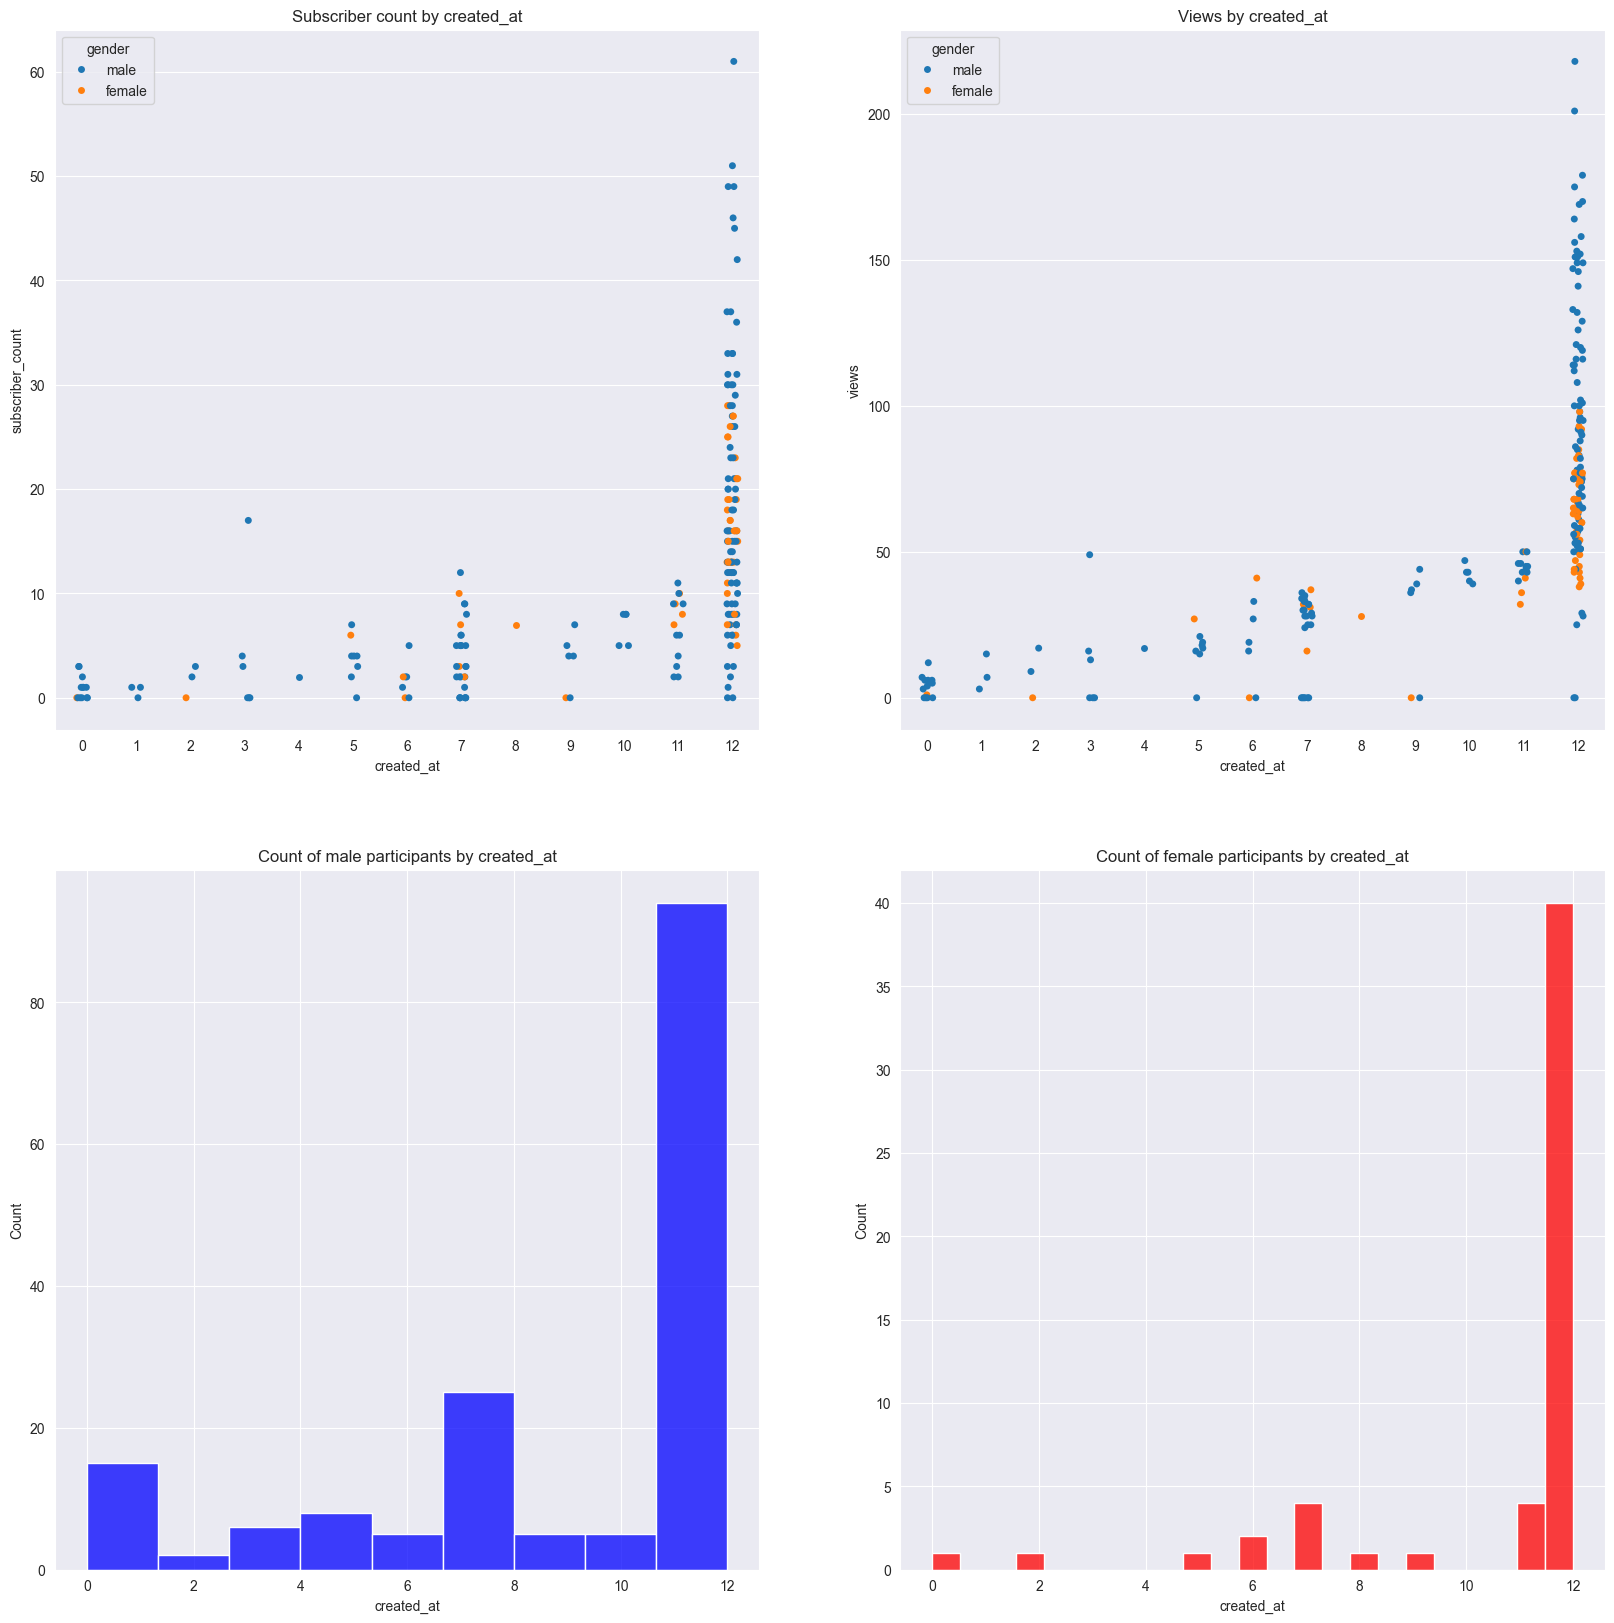

In [96]:
plt.figure(figsize=(20, 20))

plt.subplot(221)
sns.stripplot(data=participants, x='created_at', y='subscriber_count', hue='gender')
plt.title('Subscriber count by created_at')

plt.subplot(222)
sns.stripplot(data=participants, x='created_at', y='views', hue='gender')
plt.title('Views by created_at')

plt.subplot(223)
sns.histplot(data=participants[participants.gender == 'male'], x='created_at', color='blue')
plt.title('Count of male participants by created_at')

plt.subplot(224)
sns.histplot(data=participants[participants.gender == 'female'], x='created_at', color='red')
plt.title('Count of female participants by created_at')

plt.show()

In [97]:
check = participants[participants.id.isin(male_top_participants)]
check.created_at.unique().tolist()

[12, 3]

In [98]:
check = participants[participants.id.isin(female_top_participants)]
check.created_at.unique().tolist()

[12]

Из графиков выше видно, что основная масса анкет была создана за 12 дней до дедлайна. Особенно это заметно по женскому графику: почти все девушки создали свои анкеты в первый день.

Говорить о том, что из-за даты добавления могут быть ложные представления о статистике, довольно сложно. Основная масса "популярных" студентов действительно зарегистрировалась раньше остальных, но это не отменяет того факта, что дата прямо влияет на статистику. В предыдущей главе мы оценивали, какие ответы выбирали топ-25% студентов. Все ответы были адекватные и в рамках общей статистики, поэтому дата конкретно здесь не играет роли.

Скорее всего, в реальности дата присоединения не особо влияла, так как распределения строились на основе подписок и предпочтений. Однако факт того, что те, кто зарегистрировался раньше, имеют больше просмотров и подписок, стоит держать в голове.

# Влияют ли подписчики на итоговое распределение? 

Хотя сама идея алгоритма подразумевает, что подписанные студенты должны быть вместе в одной комнате, я всё равно считаю, что необходимо проверить, действительно ли в итоговом расселении фигурирует хотя бы (1) 1-2 человека из списка подписчиков, (2) 1-2 человека из списка, на которых студент подписался

## 1. Анализ списка подписчиков

In [99]:
comparison_df = participants[['id', 'subscriber_ids', 'subscription_ids', 'roommate_ids', 'created_at']]

comparison_df.head()

,id,subscriber_ids,subscription_ids,roommate_ids,created_at
0,1,"[150, 122, 214, 198, 14, 19, 66, 175, 99, 160,...","[150, 122, 14, 19, 124]","[83, 132, 14]",12
1,2,"[150, 65, 99, 76, 194, 93, 153, 94, 145, 218, ...","[104, 147, 189, 13]","[8, 173, 38]",12
2,3,"[82, 62, 15, 11, 67, 115, 211, 142, 55, 85, 90...","[62, 15, 115]","[62, 115, 15]",12
3,4,"[22, 11, 29, 211, 181, 166, 98]","[215, 85, 67, 62, 22, 130]","[208, 191]",11
4,5,"[145, 169]","[145, 152, 214, 53]","[53, 152, 214]",2


In [100]:
comparison_df['subscribers_len'] = comparison_df['subscriber_ids'].apply(lambda x: len(literal_eval(x)))
comparison_df.head()

,id,subscriber_ids,subscription_ids,roommate_ids,created_at,subscribers_len
0,1,"[150, 122, 214, 198, 14, 19, 66, 175, 99, 160,...","[150, 122, 14, 19, 124]","[83, 132, 14]",12,21
1,2,"[150, 65, 99, 76, 194, 93, 153, 94, 145, 218, ...","[104, 147, 189, 13]","[8, 173, 38]",12,15
2,3,"[82, 62, 15, 11, 67, 115, 211, 142, 55, 85, 90...","[62, 15, 115]","[62, 115, 15]",12,13
3,4,"[22, 11, 29, 211, 181, 166, 98]","[215, 85, 67, 62, 22, 130]","[208, 191]",11,7
4,5,"[145, 169]","[145, 152, 214, 53]","[53, 152, 214]",2,2


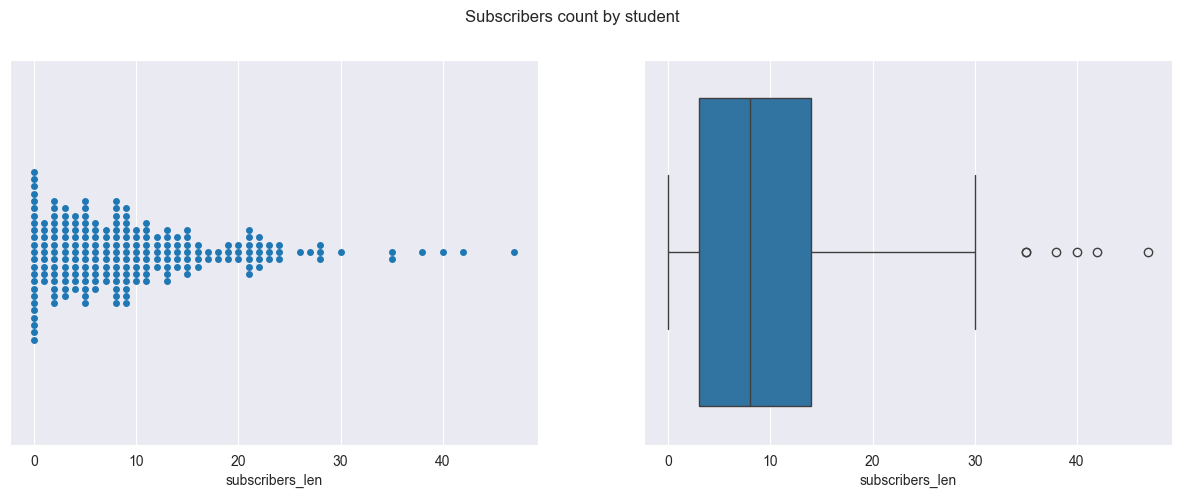

In [101]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.swarmplot(data=comparison_df, x='subscribers_len')
plt.suptitle('Subscribers count by student')

plt.subplot(122)
sns.boxplot(x=comparison_df['subscribers_len'])
plt.show()

Медианное значение количества подписчиков у студента примерно около 8. Только 25% студентов имеют по 14-15 подписчиков.

In [102]:
comparison_df['count_in'] = comparison_df.apply(
    lambda x: sum(sub_id in literal_eval(x['roommate_ids']) for sub_id in literal_eval(x['subscriber_ids'])), axis=1)

comparison_df['count_more_1'] = comparison_df.apply(lambda x: 1 if any(
    sub_id in literal_eval(x['roommate_ids']) for sub_id in literal_eval(x['subscriber_ids'])) else 0, axis=1)

comparison_df

,id,subscriber_ids,subscription_ids,roommate_ids,created_at,subscribers_len,count_in,count_more_1
0,1,"[150, 122, 214, 198, 14, 19, 66, 175, 99, 160,...","[150, 122, 14, 19, 124]","[83, 132, 14]",12,21,2,1
1,2,"[150, 65, 99, 76, 194, 93, 153, 94, 145, 218, ...","[104, 147, 189, 13]","[8, 173, 38]",12,15,0,0
2,3,"[82, 62, 15, 11, 67, 115, 211, 142, 55, 85, 90...","[62, 15, 115]","[62, 115, 15]",12,13,3,1
3,4,"[22, 11, 29, 211, 181, 166, 98]","[215, 85, 67, 62, 22, 130]","[208, 191]",11,7,0,0
4,5,"[145, 169]","[145, 152, 214, 53]","[53, 152, 214]",2,2,0,0
...,...,...,...,...,...,...,...,...
215,216,"[147, 65, 150, 114, 109, 50]","[203, 118, 27, 147, 51, 104, 77]","[162, 220, 114]",12,6,1,1
216,217,"[94, 65, 109, 169]","[203, 207, 147, 179, 151, 189, 152]","[94, 213, 136]",10,4,1,1
217,218,"[27, 149, 46, 151, 150, 65, 109, 145, 14, 50, ...","[25, 27, 104, 179, 151, 187, 134, 183, 214, 21...","[201, 51, 202]",7,12,0,0
218,219,"[67, 85, 215, 74, 108, 82, 31, 48, 16, 11, 181...","[215, 85, 102, 74, 108, 82, 31, 32, 155, 158, ...","[85, 16, 166]",12,21,3,1


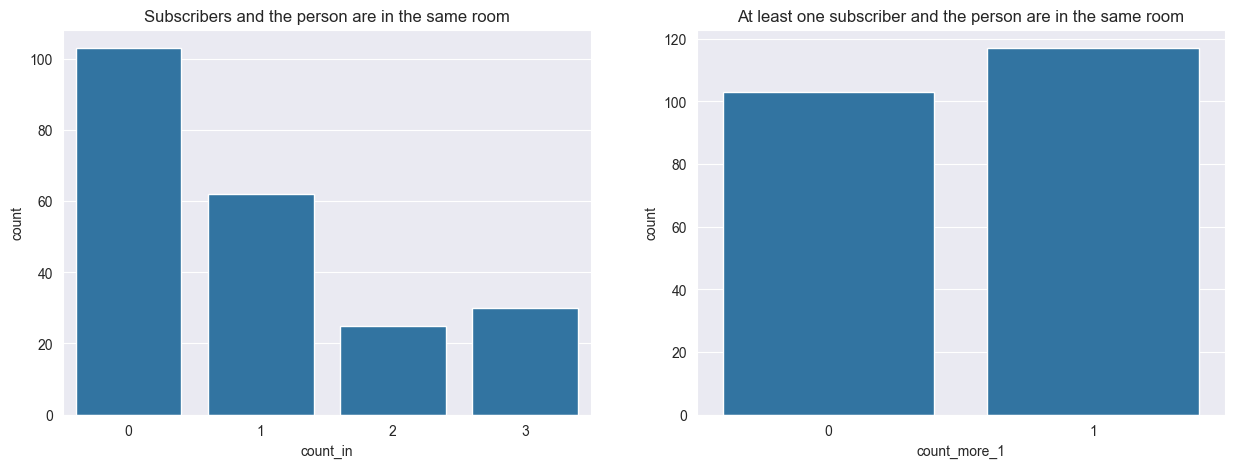

In [103]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.countplot(data=comparison_df, x='count_in')
plt.title('Subscribers and the person are in the same room')

plt.subplot(122)
sns.countplot(data=comparison_df, x='count_more_1')
plt.title('At least one subscriber and the person are in the same room')
plt.show()

Судя по графикам, лишь чуть больше 50% людей, которые подписались на студента, смогли заполучить его в качестве соседа. Это неплохой результат, однако с другой стороны многие студенты были выбраны на основе каких-то общих предпочтений либо случайно.

## 2. Анализ списка студентов, на которых подписался человек

In [104]:
comparison_df['subscription_len'] = comparison_df['subscription_ids'].apply(lambda x: len(literal_eval(x)))
comparison_df.head()

,id,subscriber_ids,subscription_ids,roommate_ids,created_at,subscribers_len,count_in,count_more_1,subscription_len
0,1,"[150, 122, 214, 198, 14, 19, 66, 175, 99, 160,...","[150, 122, 14, 19, 124]","[83, 132, 14]",12,21,2,1,5
1,2,"[150, 65, 99, 76, 194, 93, 153, 94, 145, 218, ...","[104, 147, 189, 13]","[8, 173, 38]",12,15,0,0,4
2,3,"[82, 62, 15, 11, 67, 115, 211, 142, 55, 85, 90...","[62, 15, 115]","[62, 115, 15]",12,13,3,1,3
3,4,"[22, 11, 29, 211, 181, 166, 98]","[215, 85, 67, 62, 22, 130]","[208, 191]",11,7,0,0,6
4,5,"[145, 169]","[145, 152, 214, 53]","[53, 152, 214]",2,2,0,0,4


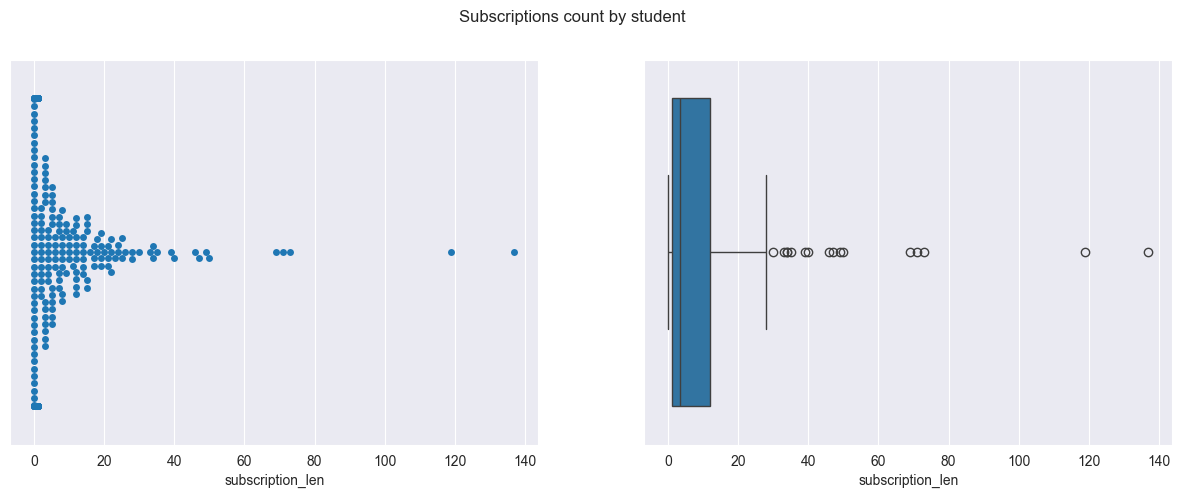

In [105]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.swarmplot(data=comparison_df, x='subscription_len')
plt.suptitle('Subscriptions count by student')

plt.subplot(122)
sns.boxplot(x=comparison_df['subscription_len'])
plt.show()

Как видно из графиков, студенты не подписывались на всех подряд. Медианное значение количества подписок у студента примерно около 8. И хотя есть люди, у которых значения намного больше, их значения являются явными выбросами.

In [106]:
comparison_df['count_in_subscription'] = comparison_df.apply(
    lambda x: sum(sub_id in literal_eval(x['roommate_ids']) for sub_id in literal_eval(x['subscription_ids'])), axis=1)

comparison_df['count_more_1_subscription'] = comparison_df.apply(lambda x: 1 if any(
    sub_id in literal_eval(x['roommate_ids']) for sub_id in literal_eval(x['subscription_ids'])) else 0, axis=1)


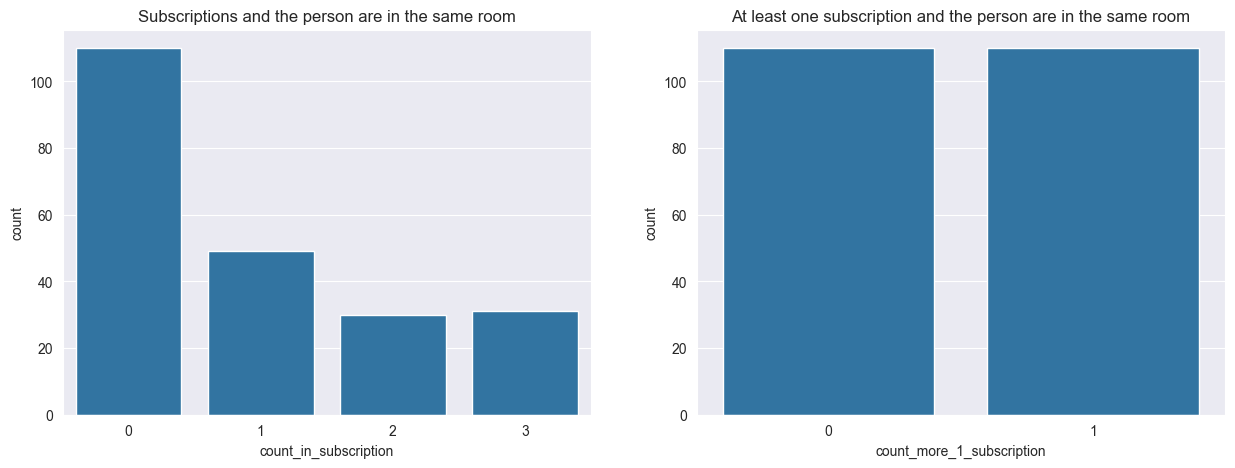

In [107]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.countplot(data=comparison_df, x='count_in_subscription')
plt.title('Subscriptions and the person are in the same room')

plt.subplot(122)
sns.countplot(data=comparison_df, x='count_more_1_subscription')
plt.title('At least one subscription and the person are in the same room')
plt.show()

Здесь правый график выглядит уже получше, чем график, связывающий студента и его подписчиков. Если же объединить информацию, полученную из двух анализов, можно сделать вывод, что алгоритм действительно опирается на подписки.

# Количество совпавших ответов среди соседей

In [108]:
questions_with_eq_answers = {}
for student in answers.respondent_id.unique().tolist():
    st_1 = answers[['option']][answers.respondent_id == student].values.tolist()
    print(literal_eval(comparison_df[comparison_df.id == student].roommate_ids.iloc[0]))
    for i in literal_eval(comparison_df[comparison_df.id == student].roommate_ids.iloc[0]):
        count = 0
        if len(answers[['option']][answers.respondent_id == student].values.tolist()) == 13 and len(
                answers[['option']][answers.respondent_id == int(i)].values.tolist()) == 13:
            for j in range(13):
                if st_1[j][0] == answers[['option']][answers.respondent_id == int(i)].values.tolist()[j][0]:
                    count += 1

        print(f"Student {student} has {count} equal answers with student {i}")
        if f'{student}-{i}' not in questions_with_eq_answers.keys() and f'{i}-{student}' not in questions_with_eq_answers.keys():
            questions_with_eq_answers[f'{student}-{i}'] = count

        print(answers[['option']][answers.respondent_id == int(i)].values.tolist())

    print('------------------------------------------')

print(questions_with_eq_answers)

[83, 132, 14]
Student 1 has 7 equal answers with student 83
[[0], [0], [0], [2], [0], [2], [2], [1], [1], [2], [2], [0], [1]]
Student 1 has 7 equal answers with student 132
[[2], [2], [0], [2], [0], [0], [1], [0], [1], [2], [1], [0], [0]]
Student 1 has 9 equal answers with student 14
[[0], [2], [0], [2], [2], [0], [2], [1], [0], [2], [2], [0], [0]]
------------------------------------------
[8, 173, 38]
Student 2 has 10 equal answers with student 8
[[2], [2], [0], [2], [0], [0], [2], [1], [1], [2], [1], [0], [0]]
Student 2 has 8 equal answers with student 173
[[2], [2], [0], [1], [2], [0], [2], [1], [1], [2], [1], [0], [0]]
Student 2 has 8 equal answers with student 38
[[1], [2], [0], [2], [2], [0], [2], [0], [1], [2], [1], [0], [1]]
------------------------------------------
[62, 115, 15]
Student 3 has 9 equal answers with student 62
[[0], [2], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0]]
Student 3 has 9 equal answers with student 115
[[0], [2], [0], [1], [2], [0], [2], [1],

Алгоритм выше работает следующим образом: в словарь без повторений добавляется число, которое означает, сколько совпадений в ответах на вопросы было у <b> двух </b> соседей в комнате. Напомню, что всего вопросов 13.

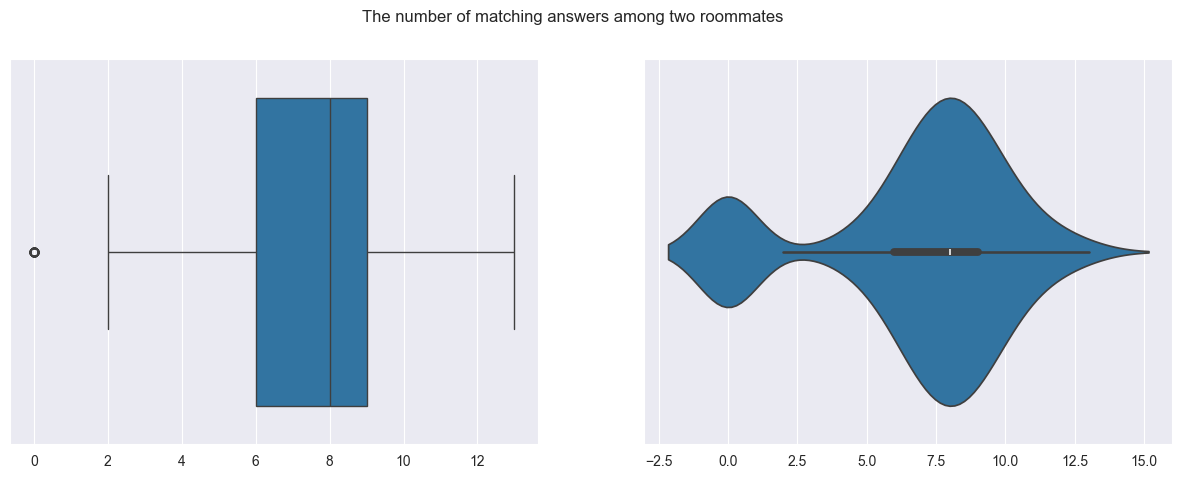

In [109]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.boxplot(x=questions_with_eq_answers.values())
plt.suptitle('The number of matching answers among two roommates')

plt.subplot(122)
sns.violinplot(x=questions_with_eq_answers.values())

plt.show()

Из графиков выше видно, что в среднем у двух студентов 6-7 совпадений в ответах на вопросы. Получается, можно гарантировать точно, что в одной комнате, как минимум, 2 человека будут с почти одинаковыми предпочтениями. Все люди в любом случае разные, так что иметь хотя бы 5-8 общих предпочтений уже довольно неплохо.

# Выводы

На основе анализа, который я сделала, можно выделить несколько тезисов.

Во-первых, алгоритм подбора студентов работает довольно-таки неплохо. Почти 50% ребят так или иначе распределены на основе подписок. Оставшиеся студенты разбивались на комнаты исходя из предпочтений. Судя по анализу, можно сказать, что группы действительно формировались не случайно. Медианное значение совпавших вопросов в комнате равно примерно 7-10 из 13 вопросов. 

Во-вторых, следовало бы решить проблему с влиянием количества подписчиков и просмотров на дату присоединения. Кто-то из участников присоединился раньше, поэтому его анкету просматривало больше людей, чем у того, кто присоединился позже. 

В-третьих, есть группа вопросов, которые надо учитывать первыми при распределении. Например, вопросы под номерами 4, 6, 10, 12. Вопросы 4 и 12 связаны с образом жизни человека. Люди, которые не переносят запах сигарет, например, не смогут жить вместе с курильщиком, даже если все остальные ценности у них совпадают. Насчёт вопросов 6 и 12, следовало бы поговорить со специалистом. Знакомство с новыми людьми из других стран - очень хороший жизненный опыт, но не все хотят жить с людьми совсем других ценностей.


